### Phase-Four Project Submission

* Student Name: Wes Swager
* Student Pace: Full Time
* Instructor Name: Claude Fried
* Scheduled Project Review Date/Time
    * Technical - 1: Tuesday, May 18, 2021, 4:00pm CST
    * None-Technical: Thursday, May 20, 2021, 2:45pm CST
    * Technical - 2: Friday, May 21, 2021, 9:30am CST

<a id = 'overview'></a>
# Overview

Analyze monthly median housing sales values data for Lake County, IL and Kenosha and Racine Counties, WI, between 1997 and 2017 and forecast real estate prices using time series modeling.

<a id = 'business_problem'></a>
# Business Problem

**The Chiwaukee Group** are a startup real estate development firm looking to capitalize on growth and business development in the geographic area between Chicago, Illinois and Milwaukee, Wisconsin, through investment in new residential projects. 

The Chiwaukee Group are specifically looking to target the counties located between Cook County, IL (Chicago) and Milwaukee County, WI:
* Lake County, IL
* Kenosha County, WI
* Racine County, WI

The Chiwaukee Group have requested a recommendation of the top-five zipcodes within which to invest.

<a id = 'background'></a>
### Background

**Business Development**

The area has experienced significant recent business development:
* Amazon - 2015 - New Distribution Center
* Uline - 2010 - New Headquarters, 2018 - New Distribution Center
* Foxxconn - 2020 - New Manufacturing Plant, New Network Operations Center
* Meijer Inc. - 2014 - New Distribution Center
* Rust-Oleum Corp. - 2014 - New Distribution Center
* Gordon Food Service - 2010 - New Distribution Center

**Future Development**

Marquette University Law School in Milwaukee has projected that the two metro areas will continue to merge into a single megaregion.  They are currently conducting a [running project](https://law.marquette.edu/facultyblog/2012/07/milwaukees-future-in-the-chicago-megacity/) mapping the interconnection of the two geographic and economic entities while working with policymakers to encourage and facilitate the process going forward.

**Connection**

The two cities are connected by a major interstate, I-94, as well as a train route, the Hiawatha Service, operated by Amtrak, which includes a stop in the city of Sturtevant in Racine County. 

<a id = 'parameters'></a>
### Parameters

**Risk**

Evaluated through Coefficient of Variance, ratio of the standard deviation to the mean, with an upper-limit set at 50%

**Historic Return on Investment**

Areas with prove return on investment, with a threshold of top 25% across the existing data’s timeframe

**Expected Future Returns**

Final recommendations will be provided based on future returns forecasted using Time Series modeling

# Contents

* **[Overview](#overview)**
* **[Business Problem](#business_problem)**
    * **[Background](#background)**
    * **[Parameters](#parameters)**
* **[Packages](#packages)**
* **[Data](#data)**
    * **[Preprocessing](#preprocessing)**
        * **[Isolating Target Counties](#isolate_counties)**
        * **[Historical Parameters](#historical_parameters)**
        * **[Convert Datetime Data](#convert_datetime_data)**
        * **[Reshape Datetime Data](#reshape_datetime_data)**
        * **[Assess NA Values](#assessing_na_values)**
        * **[Additional Data Cleaning](#additional_data_cleaning)**
    * **[Working Data](#working_data)**
    * **[Visualize Data](#visualize_data)**
* **[Stationarity](#stationarity)**
    * **[60047](#stationarity_60047)**
    * **[53142](#stationarity_53142)**
    * **[53144](#stationarity_53144)**
    * **[53158](#stationarity_53158)**
    * **[53181](#stationarity_53181)**
    * **[53108](#stationarity_53108)**
    * **[53139](#stationarity_53139)**
    * **[53404](#stationarity_53404)**
    * **[53405](#stationarity_53405)**
    * **[53185](#stationarity_53185)**
* **[Modeling](#modeling)**
    * **[60047](#model_60047)**
    * **[53142](#model_53142)**
    * **[53144](#model_53144)**
    * **[53158](#model_53158)**
    * **[53181](#model_53181)**
    * **[53108](#model_53108)**
    * **[53139](#model_53139)**
    * **[53404](#model_53404)**
    * **[53405](#model_53405)**
    * **[53185](#model_53185)**
* **[Conclusions](#conclusions)**
    * **[Parameters and Evaluation Metrics - Review](#parameters_evaluation_metrics)**
    * **[Top-Five Zipcodes](#top_5_zipcodes)**
    * **[Recommendations](#recommendations)**
    * **[Detailed Observations](#detailed_observations)**
* **[Next Steps](#next_steps)**

<a id = 'packages'></a>
# Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Pandas for Dataframes

import pandas as pd
from IPython.display import display

# Import Numpy and Math for mathematical functions

import numpy as np

import math
from math import sqrt

# Import statsmodels and Scipy Stats for statistical functions
# Import statsmodels and pmdarima for modeling

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

import scipy.stats as stats

import pmdarima
from pmdarima.arima.stationarity import ADFTest
from pmdarima.arima.utils import ndiffs
from pmdarima.arima.utils import nsdiffs

# Import Matplotlib and Seaborn for visualizations

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import seaborn as sns
sns.set(style = 'darkgrid', context = 'talk')

# Import Scikit-learn for modeling

import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

<a id = 'data'></a>
# Data

Monthly median housing sales values between April, 1996 and April, 2018 downloaded from [Zillow](https://www.zillow.com/research/data/), an American online real estate marketplace.

In [2]:
# Import Zillow data

zillow = pd.read_csv(r'C:\Users\westi\Documents\GitHub\the_chiwaukee_group\data\zillow_data.csv')
zillow.head()

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
0         1  334200.0  335400.0  336500.0  ...  1005500  1007500  1007800   
1         2  235700.0  236900.0  236700.0  ...   308000   310000   312500   
2         3  210400.0  212200.0  212200.0  ...   321000   320600   320200   
3         4  498100.0  500900.0  503100.0  ...  1289800  1287700  1287400   
4         5   77300.0   77300.0   77300.0  ...   119100   119400   120000   

   2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
0  1009600  1013300  1018700  1024400  1030700  1033800  1030600  
1   314100   315000   316600   318100   319600   321100   321800  
2   320400   320800   321200   321200   323000   326900   329900  
3  1291500  1296600  1299000  1302700  1306400  1308500  1307000  
4   120300   120300   120300   120300   120500   121000   121500  

[5 rows x 272 columns]

In [3]:
# Rename RegionName column as Zipcode
# Rename CountyName column as County

zillow.rename(columns = {'RegionName' : 'Zipcode',
                          'CountyName' : 'County'},
               inplace = True)

<a id = 'preprocessing'></a>
## Preprocessing

<a id = 'isolate_counties'></a>
### Isolate Target Counties

In [4]:
# Isolate Lake County, IL, Kenosha County, WI, and Racine County, WI from Zillow data

il_wi = zillow.loc[zillow['State'].isin(['IL',
                                         'WI'])]

chi_mke = il_wi.loc[il_wi['County'].isin(['Lake',
                                              'Kenosha',
                                              'Racine'])]

<a id = 'historical_parameters'></a>
### Historical Parameters

In [5]:
# Calculate Return on Investment
chi_mke['ROI'] = ((chi_mke['2018-04'] /
                   chi_mke['1996-04'])
                  - 1)

# Calculate Standard Deviation of monthly values
chi_mke['STD'] = (chi_mke.loc[:,'1996-04' : '2018-04']
                  .std(skipna = True, axis = 1))

# Calculate historical mean
chi_mke['Mean'] = (chi_mke.loc[:,'1996-04' : '2018-04']
                   .mean(skipna = True, axis = 1))

#Calculate Coefficient of Variance
chi_mke['CV'] = (chi_mke['STD'] /
                 chi_mke['Mean'])

In [6]:
# Create a dataframe with the mean, standard deviation, 
# and five-point statistics for the STD, Mean, ROI, and CV

chi_mke_stats = pd.DataFrame(chi_mke['STD'].describe())

chi_mke_mean = pd.DataFrame(chi_mke['Mean'].describe())
chi_mke_stats['Mean'] = chi_mke_mean['Mean']

chi_mke_roi = pd.DataFrame(chi_mke['ROI'].describe())
chi_mke_stats['ROI'] = chi_mke_roi['ROI']

chi_mke_cv = pd.DataFrame(chi_mke['CV'].describe())
chi_mke_stats['CV'] = chi_mke_cv['CV']

chi_mke_stats

STD           Mean        ROI         CV
count      45.000000      45.000000  43.000000  45.000000
mean    37894.606224  221654.111897   0.558992   0.168266
std     23780.884001  125799.403250   0.265906   0.033581
min     12648.176777  107846.792453   0.176633   0.081532
25%     24769.906710  152288.679245   0.338697   0.155018
50%     29899.075176  177518.125000   0.472995   0.169319
75%     39204.031167  221526.792453   0.728271   0.184721
max    130617.350600  770952.075472   1.155488   0.276589

In [7]:
# Define the 50%, upper limit for Coefficient of Variance

chi_mke_upper50_cv = chi_mke['CV'].quantile(0.5)
chi_mke_upper50_cv

0.16931919318097513

In [8]:
# Drop zipcodes outside of defined risk profile

chi_mke = (chi_mke[chi_mke['CV'] < chi_mke_upper50_cv])

In [9]:
# Define the 25%, highest Return on Investment

chi_mke_upper25_roi = chi_mke['ROI'].quantile(0.50)
chi_mke_upper25_roi

0.44741147501659906

In [10]:
# Drop zipcodes outside defined historical 
# return on investment parameters

chi_mke = chi_mke[chi_mke['ROI'] > chi_mke_upper25_roi]

<a id = 'convert_datetime_data'></a>
### Convert Datetime Data

In [11]:
# Define datetime columns v none datetime columns for chi_mke

datetime_col = []
none_datetime_col = []

for c in chi_mke.columns:
    if c[0].isnumeric():
        datetime_col.append(c)
    else:
        none_datetime_col.append(c)

In [12]:
# Convert datetime columns to datetime data type for chi_mke

datetimes = list(pd.to_datetime(datetime_col,
                                format = '%Y-%m'))
    
chi_mke.columns = none_datetime_col + datetimes

<a id = 'reshape_datetime_data'></a>
### Reshape Datetime Data

In [13]:
# Reshape datetime columns from wide to 
# long format for chi_mke

chi_mke = pd.melt(chi_mke,
                  id_vars = none_datetime_col,
                  var_name = 'Date',
                  value_name = 'Price')

<a id = 'assess_na_values'></a>
### Assess NA Values

In [14]:
# Check chi_mke for NA values

pd.DataFrame(chi_mke.isna().sum())

0
RegionID  0
Zipcode   0
City      0
State     0
Metro     0
County    0
SizeRank  0
ROI       0
STD       0
Mean      0
CV        0
Date      0
Price     0

In [15]:
# Calculate percentage of rows with NA values

(((chi_mke['Price'].isna().sum())
 / (chi_mke['Price'].sum()))
 * 100)

0.0

In [16]:
# Drop NA values from chi_mke

chi_mke.dropna(inplace = True)

<a id = 'additional_data_cleaning'></a>
### Additional Data Cleaning

In [17]:
# Drop RegionID and Metro columns as they no longer contribute to
# the description of the geographic areas after isolating the
# target counties2
# Drop SizeRank column as it does not contribute to evaluation metrics

chi_mke.drop(['RegionID',
              'Metro',
              'SizeRank',
              'ROI',
              'STD',
              'Mean',
              'CV'],
             axis = 1,
             inplace = True)

In [18]:
# Rearrange and sort columns by descending geographic area

chi_mke = chi_mke.reindex(columns = ['State',
                                     'County',
                                     'City',
                                     'Zipcode',
                                     'Date',
                                     'Price'])

chi_mke.sort_values(by = ['State',
                          'County',
                          'City',
                          'Zipcode',
                          'Date'],
                    inplace = True)

In [19]:
# Drop dates in 1996 and 2018 due to incomplete data

chi_mke = (chi_mke[~ chi_mke['Date']
                  .isin(pd.date_range(start = '2018-01-01 00:00:00', 
                                      end = '2018-04-01 00:00:00'))])

chi_mke = (chi_mke[~ chi_mke['Date']
                  .isin(pd.date_range(start = '1996-04-01 00:00:00', 
                                      end = '1996-12-01 00:00:00'))])

<a id = 'working_data'></a>
## Working Data

In [20]:
chi_mke.head()

State County         City  Zipcode       Date     Price
90     IL   Lake  Lake Zurich    60047 1997-01-01  257700.0
100    IL   Lake  Lake Zurich    60047 1997-02-01  254900.0
110    IL   Lake  Lake Zurich    60047 1997-03-01  252500.0
120    IL   Lake  Lake Zurich    60047 1997-04-01  250700.0
130    IL   Lake  Lake Zurich    60047 1997-05-01  249700.0

In [21]:
chi_mke.to_csv(r'C:\Users\westi\Documents\GitHub\the_chiwaukee_group\data\chi_mke.csv', index = False)

In [22]:
# Display unique zipcodes for chi_mke with State, 
# County, and City

zipcodes = chi_mke['Zipcode'].unique()

working_zipcodes = chi_mke.loc[chi_mke['Zipcode'].isin(zipcodes)]
working_zipcodes = (working_zipcodes[working_zipcodes['Date']
                                     == pd.to_datetime('1997-04-01 00:00:00')])
working_zipcodes.drop(['Date', 'Price'],
                    axis = 1,
                    inplace = True)

working_zipcodes

State   County              City  Zipcode
120    IL     Lake       Lake Zurich    60047
121    WI  Kenosha           Kenosha    53142
123    WI  Kenosha           Kenosha    53144
125    WI  Kenosha  Pleasant Prairie    53158
127    WI  Kenosha        Twin Lakes    53181
128    WI   Racine         Caledonia    53108
129    WI   Racine        Eagle Lake    53139
126    WI   Racine            Racine    53404
122    WI   Racine            Racine    53405
124    WI   Racine         Waterford    53185

Zipcodes to be modeled following initial filtering by:
* **Location**: located in Lake County, IL, Kenosha County, IL, or Racine County IL
* **Risk**: Below the 50% coefficient of variance upper-limit
* **Historic Return on Investment**: Above the top-25% threshold

In [23]:
# Create individual dataframes with timeseries
# for each zipcode

z60047 = chi_mke.loc[chi_mke.Zipcode == 60047]
z53142 = chi_mke.loc[chi_mke.Zipcode == 53142]
z53144 = chi_mke.loc[chi_mke.Zipcode == 53144]
z53158 = chi_mke.loc[chi_mke.Zipcode == 53158]
z53181 = chi_mke.loc[chi_mke.Zipcode == 53181]
z53108 = chi_mke.loc[chi_mke.Zipcode == 53108]
z53139 = chi_mke.loc[chi_mke.Zipcode == 53139]
z53404 = chi_mke.loc[chi_mke.Zipcode == 53404]
z53405 = chi_mke.loc[chi_mke.Zipcode == 53405]
z53185 = chi_mke.loc[chi_mke.Zipcode == 53185]

<a id = 'visualize_data'></a>
## Visualize Data

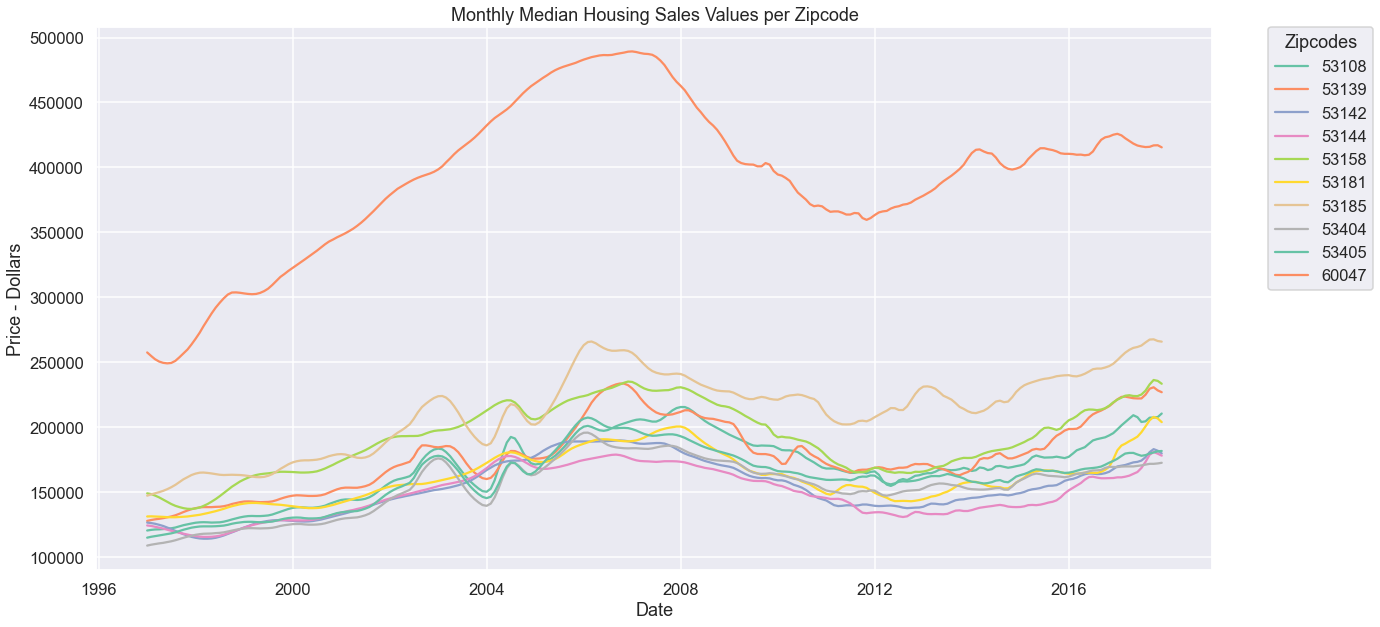

In [24]:
# Visualize monthly median housing sales values per zipcode

f, ax = plt.subplots(figsize = (20, 10))
pal = sns.color_palette('Set2', 10)
sns.lineplot(data = chi_mke,
             ax = ax,
             x = 'Date',
             y = 'Price',
             hue = 'Zipcode',
             palette = pal)
ax.set_ylabel('Price - Dollars')
ax.legend(title = 'Zipcodes',
          bbox_to_anchor = (1.05, 1),
          loc = 2,
          borderaxespad = 0)
ax.set_title('Monthly Median Housing Sales Values per Zipcode');

An upward trend is visible for all of the zipcodes beginning following the timeperiod in which the recent business development began, 2010-2014.

<a id = 'stationarity'></a>
# Stationarity

### Functions

In [25]:
def should_diff(z):
    
    price = z['Price'].dropna()
    
    # Use pmdarima ADF Test to determine if zipcode should be differenced
    
    adf_test = ADFTest(alpha = 0.05)
    p_val, should_diff = adf_test.should_diff(price)
    
    print('Should Difference:', should_diff)

In [26]:
def n_diffs(z):
    
    price = z['Price'].dropna()
    
    # Use pmdarima to calculate number of differences
    
    n_diffs = ndiffs(price, test = 'adf')
    
    print('Number of Differences:', n_diffs)

In [27]:
def n_seasonal_diffs(z):
    
    price = z['Price'].dropna()
    
    # Use pmdarima to calculate number of differences
    
    n_diffs = nsdiffs(price,
                     m = 12,
                     max_D = 12,
                     test = 'ch')
    
    print('Number of Seasonal Differences:', n_diffs)

In [28]:
def adf(z):
    
    price = z['Price'].dropna()
    
    # Perform Dickey-Fuller test with a confidence level of 95%
    
    results = adfuller(price)
    
    output = pd.Series(results[0 : 4], 
                       index = ['Test Statistic',
                                'P-value',
                                'Lags Used',
                                'Number of Observations'])
    
    for key,value in results[4].items():
        output['Critical Value (%s)'%key] = value
    
    display(pd.DataFrame(output))

In [29]:
def plot_rolling(z):
    
    price = z['Price'].dropna()
    
    # Calculate rolling price mean
    
    rolling_mean = (price.rolling(window = 12, 
                                      center = False)
                    .mean())
    
    # Calculate rolling price standard deviation
    
    rolling_std = (price.rolling(window = 12, 
                                      center = False)
                    .std())
    
    f, ax = plt.subplots(figsize = (20, 10))
    
    # Visualize Price v Date
    
    ax = sns.lineplot(data = z,
                     label = 'Price',
                     x = 'Date',
                     y = 'Price')
    
    # Visualize Rolling Price Mean
    
    ax = sns.lineplot(data = z,
                 label = 'Rolling Price Mean',
                 x = 'Date',
                 y = rolling_mean)
    
    # Visualize Rolling Price Mean
                      
    ax = sns.lineplot(data = z,
                 label = 'Rolling Price STD',
                 x = 'Date',
                 y = rolling_std + rolling_mean)
    
    ax.legend(title = 'Zipcodes',
              bbox_to_anchor = (1.05, 1),
              loc = 2,
              borderaxespad = 0)
    ax.set_title('Monthly Price v Rolling Price Mean v Rolling Standard Deviation');

<a id = 'stationarity_60047'></a>
## 60047

In [30]:
should_diff(z60047)

n_diffs(z60047)

n_seasonal_diffs(z60047)

Should Difference: True
Number of Differences: 1
Number of Seasonal Differences: 0


In [31]:
z60047['Price'] = z60047['Price'].diff(periods = 1)

should_diff(z60047)

Should Difference: False


0
Test Statistic           -1.804858
P-value                   0.378053
Lags Used                15.000000
Number of Observations  235.000000
Critical Value (1%)      -3.458487
Critical Value (5%)      -2.873919
Critical Value (10%)     -2.573367

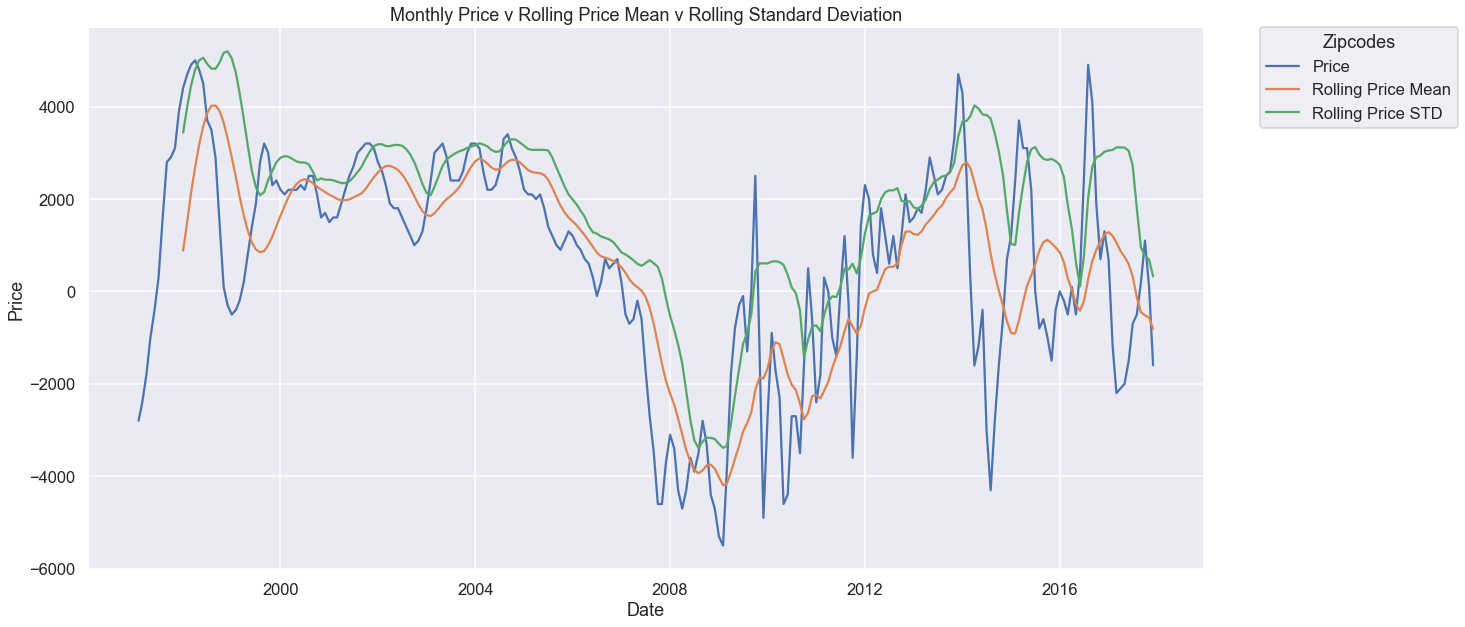

In [32]:
adf(z60047)

plot_rolling(z60047)

<a id = 'stationarity_53142'></a>
## 53142

In [33]:
should_diff(z53142)

n_diffs(z53142)

n_seasonal_diffs(z60047)

Should Difference: True
Number of Differences: 2
Number of Seasonal Differences: 0


In [34]:
z53142['Price'] = z53142['Price'].diff(periods = 2)

should_diff(z53142)

Should Difference: True


0
Test Statistic           -1.987602
P-value                   0.292035
Lags Used                16.000000
Number of Observations  233.000000
Critical Value (1%)      -3.458731
Critical Value (5%)      -2.874026
Critical Value (10%)     -2.573424

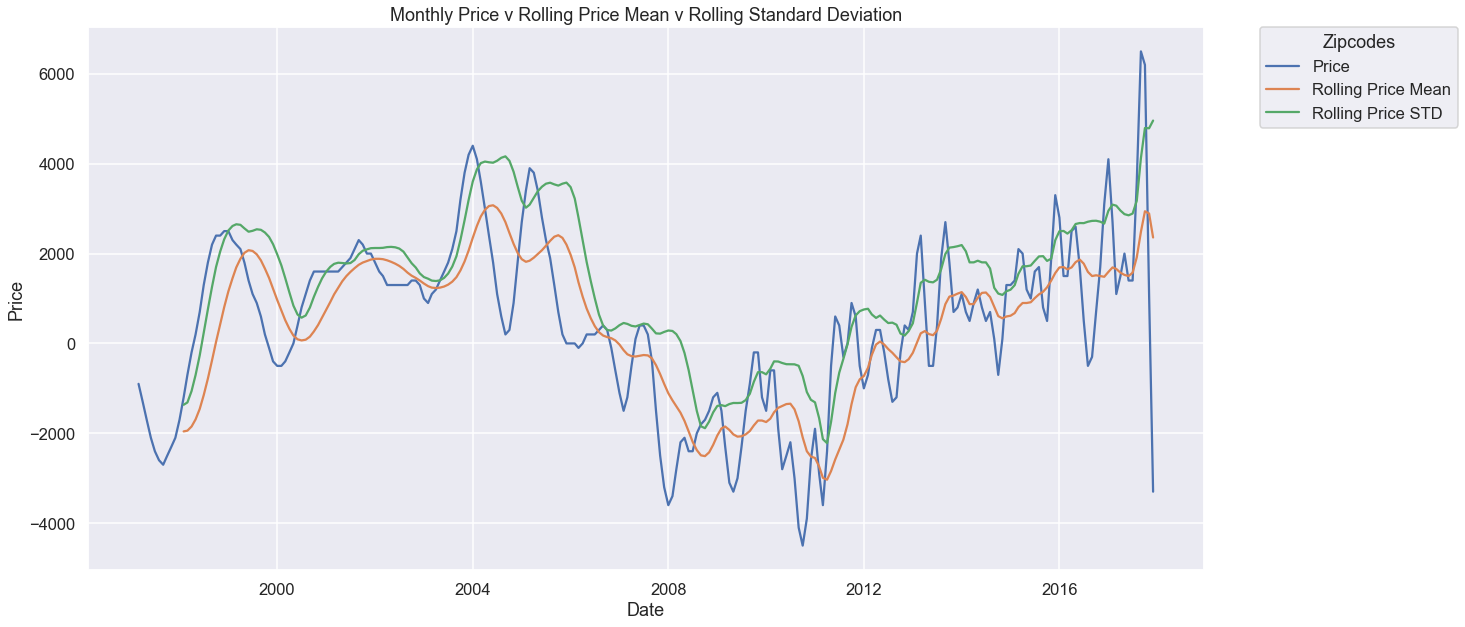

In [35]:
adf(z53142)

plot_rolling(z53142)

<a id = 'stationarity_53144'></a>
## 53144

In [36]:
should_diff(z53144)

n_diffs(z53144)

n_seasonal_diffs(z60047)

Should Difference: True
Number of Differences: 1
Number of Seasonal Differences: 0


In [37]:
z53144['Price'] = z53144['Price'].diff(periods = 1)

should_diff(z53144)

Should Difference: False


0
Test Statistic           -2.146548
P-value                   0.226214
Lags Used                13.000000
Number of Observations  237.000000
Critical Value (1%)      -3.458247
Critical Value (5%)      -2.873814
Critical Value (10%)     -2.573311

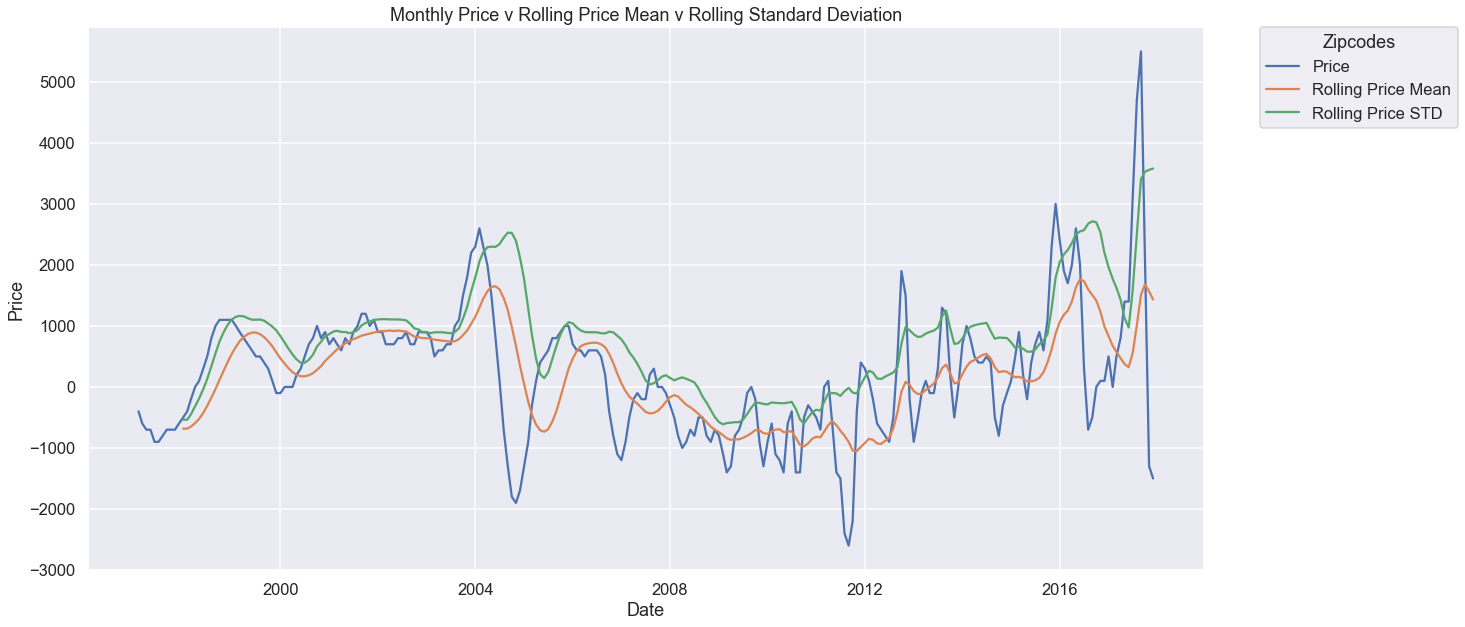

In [38]:
adf(z53144)

plot_rolling(z53144)

<a id = 'stationarity_53158'></a>
## 53158

In [39]:
should_diff(z53158)

n_diffs(z53158)

n_seasonal_diffs(z60047)

Should Difference: True
Number of Differences: 1
Number of Seasonal Differences: 0


In [40]:
z53158['Price'] = z53158['Price'].diff(periods = 1)

should_diff(z53158)

Should Difference: False


0
Test Statistic           -2.488558
P-value                   0.118283
Lags Used                12.000000
Number of Observations  238.000000
Critical Value (1%)      -3.458128
Critical Value (5%)      -2.873762
Critical Value (10%)     -2.573283

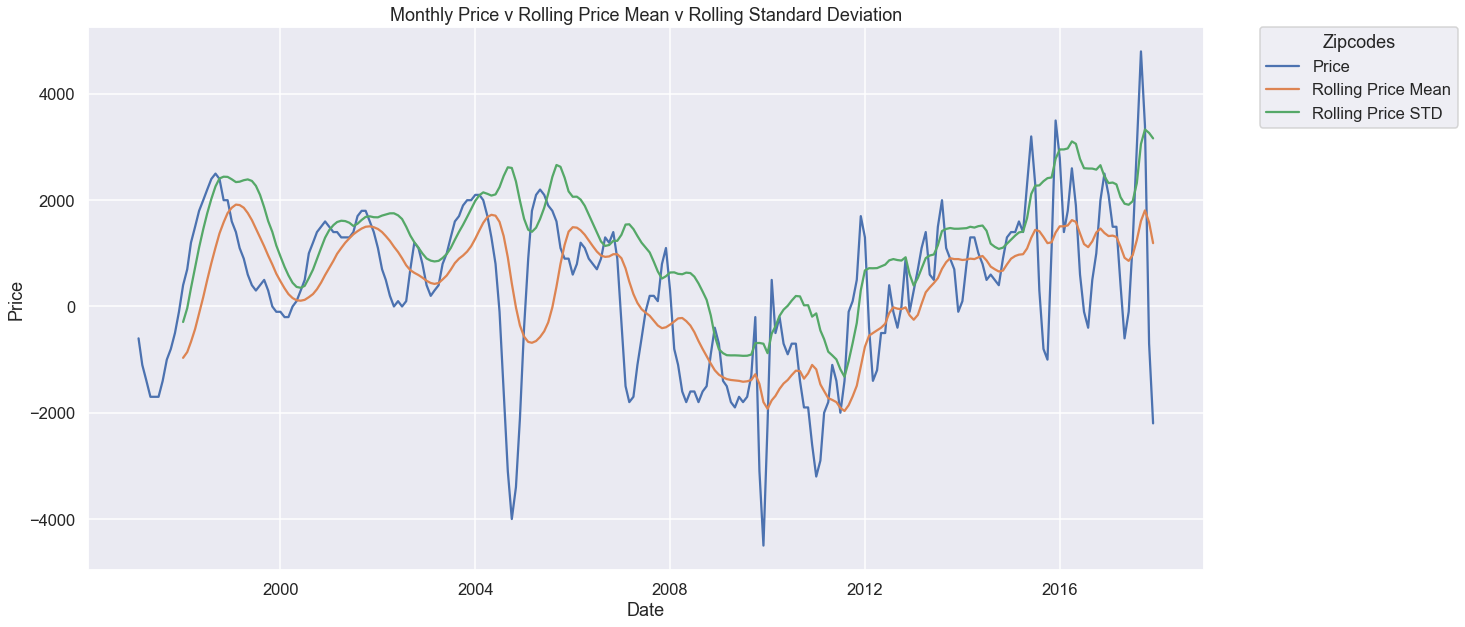

In [41]:
adf(z53158)

plot_rolling(z53158)

<a id = 'stationarity_53181'></a>
## 53181

In [42]:
should_diff(z53181)

n_diffs(z53181)

n_seasonal_diffs(z60047)

Should Difference: True
Number of Differences: 1
Number of Seasonal Differences: 0


In [43]:
z53181['Price'] = z53181['Price'].diff(periods = 1)

should_diff(z53181)

Should Difference: False


0
Test Statistic           -2.488558
P-value                   0.118283
Lags Used                12.000000
Number of Observations  238.000000
Critical Value (1%)      -3.458128
Critical Value (5%)      -2.873762
Critical Value (10%)     -2.573283

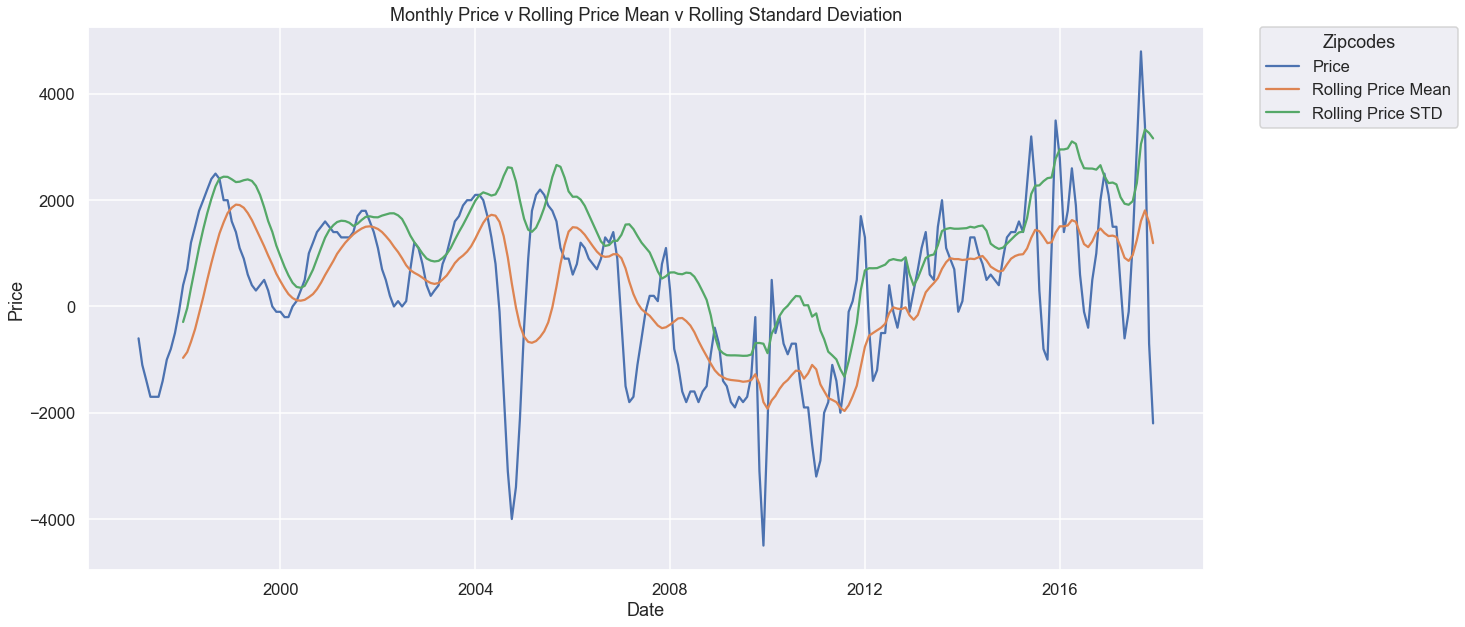

In [44]:
adf(z53158)

plot_rolling(z53158)

<a id = 'stationarity_53108'></a>
## 53108

In [45]:
should_diff(z53108)

n_diffs(z53108)

n_seasonal_diffs(z60047)

Should Difference: True
Number of Differences: 1
Number of Seasonal Differences: 0


In [46]:
z53108['Price'] = z53108['Price'].diff(periods = 1)

should_diff(z53108)

Should Difference: False


0
Test Statistic           -2.488558
P-value                   0.118283
Lags Used                12.000000
Number of Observations  238.000000
Critical Value (1%)      -3.458128
Critical Value (5%)      -2.873762
Critical Value (10%)     -2.573283

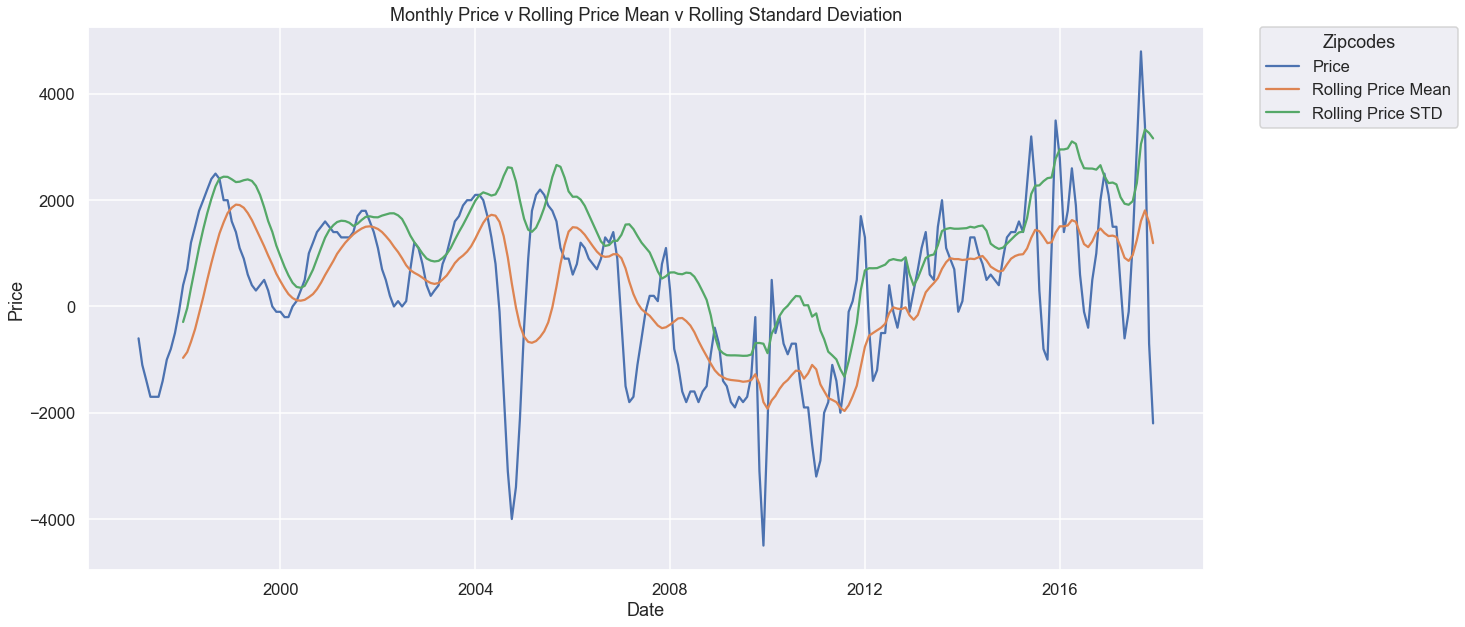

In [47]:
adf(z53158)

plot_rolling(z53158)

<a id = 'stationarity_53139'></a>
## 53139

In [48]:
should_diff(z53139)

n_diffs(z53139)

n_seasonal_diffs(z60047)

Should Difference: True
Number of Differences: 1
Number of Seasonal Differences: 0


In [49]:
z53139['Price'] = z53139['Price'].diff(periods = 1)

should_diff(z53139)

Should Difference: False


0
Test Statistic           -2.488558
P-value                   0.118283
Lags Used                12.000000
Number of Observations  238.000000
Critical Value (1%)      -3.458128
Critical Value (5%)      -2.873762
Critical Value (10%)     -2.573283

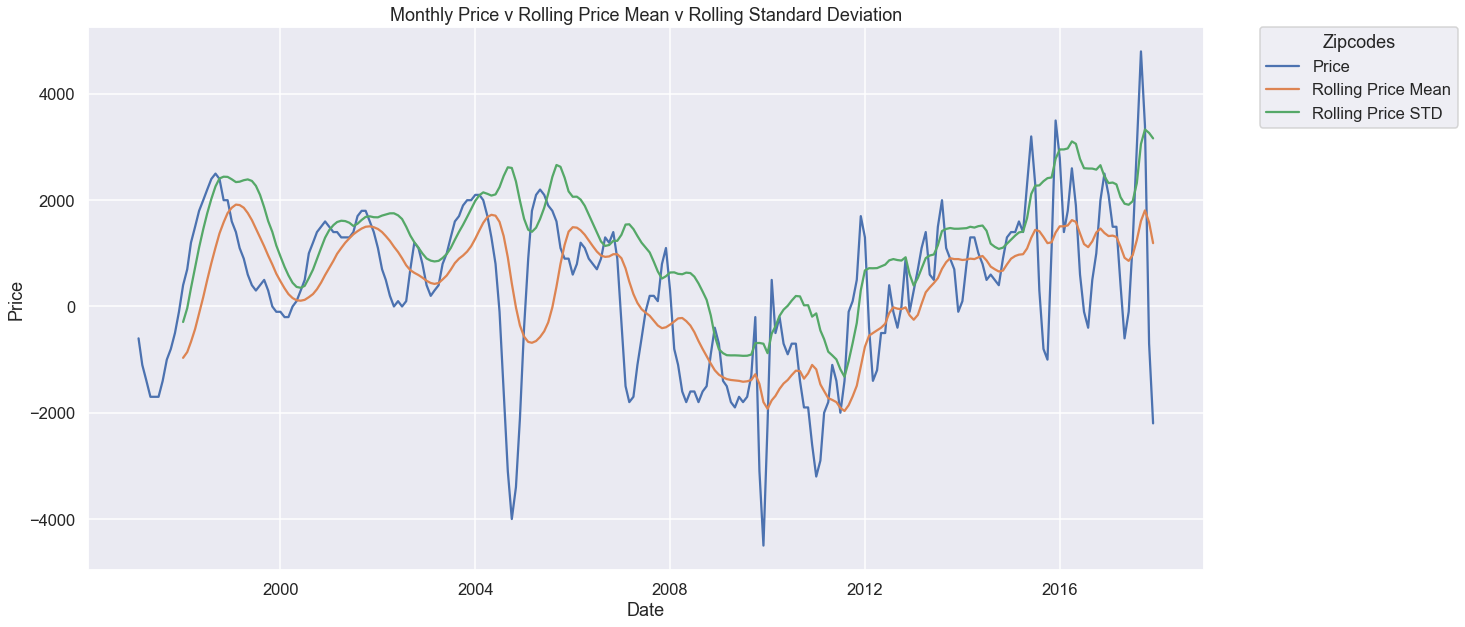

In [50]:
adf(z53158)

plot_rolling(z53158)

<a id = 'stationarity_53144'></a>
## 53404

In [51]:
should_diff(z53404)

n_diffs(z53404)

n_seasonal_diffs(z60047)

Should Difference: True
Number of Differences: 1
Number of Seasonal Differences: 0


In [52]:
z53404['Price'] = z53404['Price'].diff(periods = 1)

should_diff(z53404)

Should Difference: False


0
Test Statistic           -2.488558
P-value                   0.118283
Lags Used                12.000000
Number of Observations  238.000000
Critical Value (1%)      -3.458128
Critical Value (5%)      -2.873762
Critical Value (10%)     -2.573283

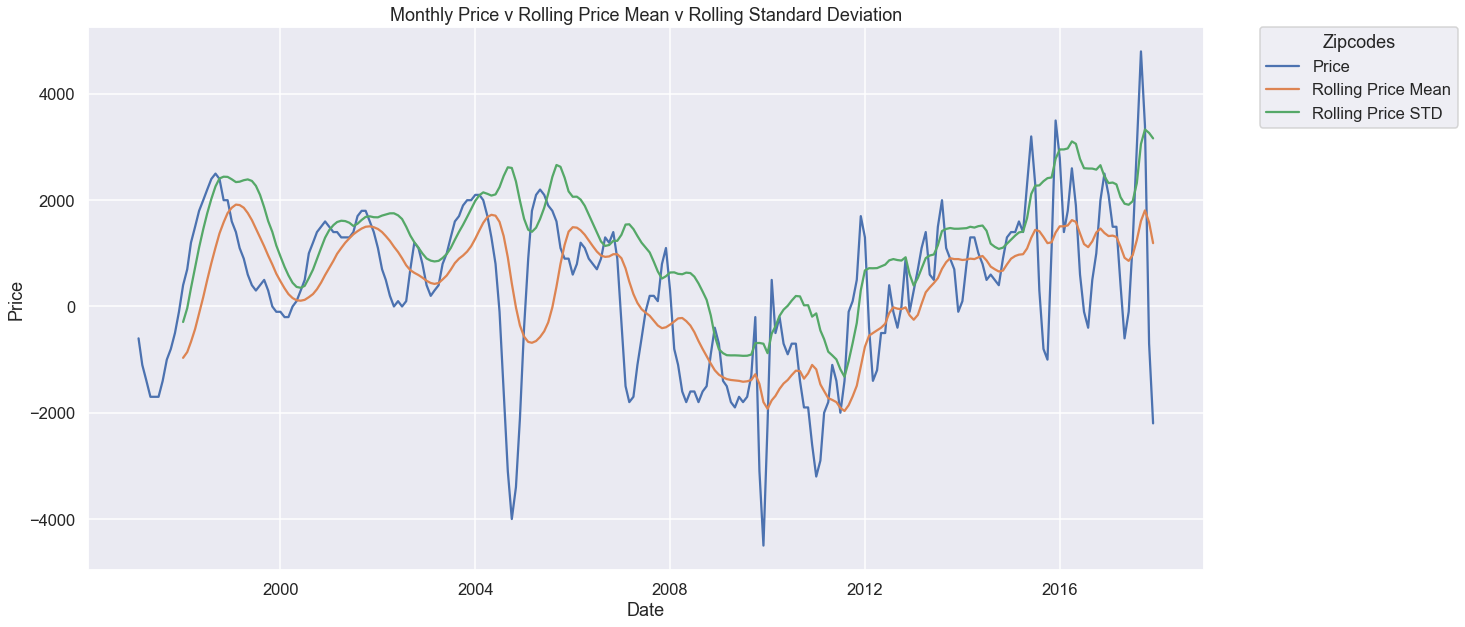

In [53]:
adf(z53158)

plot_rolling(z53158)

<a id = 'stationarity_53405'></a>
## 53405

In [54]:
should_diff(z53405)

n_diffs(z53405)

n_seasonal_diffs(z60047)

Should Difference: True
Number of Differences: 1
Number of Seasonal Differences: 0


In [55]:
z53405['Price'] = z53405['Price'].diff(periods = 1)

should_diff(z53405)

Should Difference: False


0
Test Statistic           -2.488558
P-value                   0.118283
Lags Used                12.000000
Number of Observations  238.000000
Critical Value (1%)      -3.458128
Critical Value (5%)      -2.873762
Critical Value (10%)     -2.573283

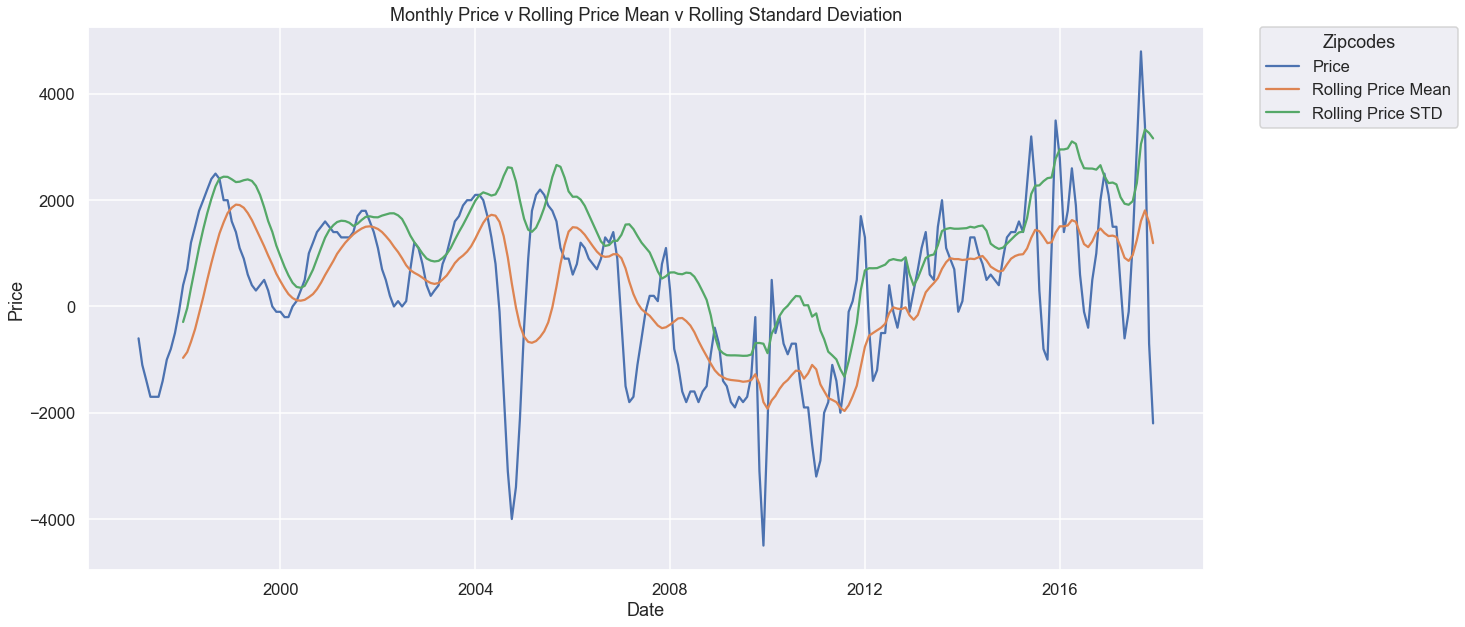

In [56]:
adf(z53158)

plot_rolling(z53158)

<a id = 'stationarity_53185'></a>
## 53185

In [57]:
should_diff(z53185)

n_diffs(z53185)

n_seasonal_diffs(z60047)

Should Difference: True
Number of Differences: 1
Number of Seasonal Differences: 0


In [58]:
z53185['Price'] = z53185['Price'].diff(periods = 1)

should_diff(z53185)

Should Difference: False


0
Test Statistic           -2.488558
P-value                   0.118283
Lags Used                12.000000
Number of Observations  238.000000
Critical Value (1%)      -3.458128
Critical Value (5%)      -2.873762
Critical Value (10%)     -2.573283

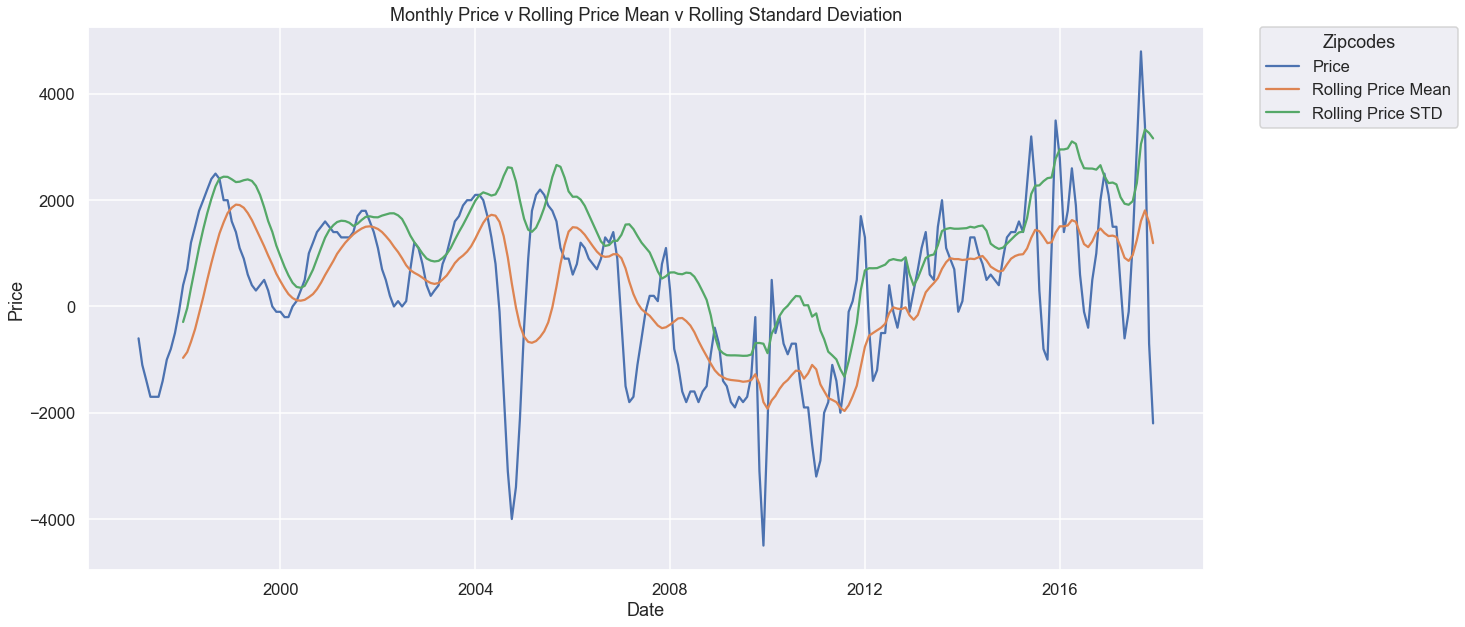

In [59]:
adf(z53158)

plot_rolling(z53158)

In [60]:
z60047 = chi_mke.loc[chi_mke.Zipcode == 60047]
z53142 = chi_mke.loc[chi_mke.Zipcode == 53142]
z53144 = chi_mke.loc[chi_mke.Zipcode == 53144]
z53158 = chi_mke.loc[chi_mke.Zipcode == 53158]
z53181 = chi_mke.loc[chi_mke.Zipcode == 53181]
z53108 = chi_mke.loc[chi_mke.Zipcode == 53108]
z53139 = chi_mke.loc[chi_mke.Zipcode == 53139]
z53404 = chi_mke.loc[chi_mke.Zipcode == 53404]
z53405 = chi_mke.loc[chi_mke.Zipcode == 53405]
z53185 = chi_mke.loc[chi_mke.Zipcode == 53185]

<a id = 'modeling'></a>
# Modeling

Seasonal Auto Regressive Integrated Moving Average with Exogenous Factors

Time Series Model where each data point is associated with a time and the model predicts the next data based on statistical assessment of previous data.

<a id = 'evaluation Metrics'></a>
## Evaluation Metrics

**Akaike Information Criterion** (AIC)
* Evaluation of the fit of the model’s predictions compared to the training data, measured by error
* Adds a penalty for complexity, higher complexity can increase the likelihood of overfitting
* Provides a standardized score which can be compared relative to other models

**Root Mean Square Error** (RMSE)
* The standard deviation of the residuals of the model
* A measure of how concentrated the actual data is around the model’s prediction
* Used the assess the quality of fit of the final SARIMAX model

<a id = 'functions'></a>
### Functions

In [61]:
def acf_pacf(z):
    f,(ax1, ax2) = plt.subplots(2, 1, 
                                figsize = (20, 10))
    
    price = z.loc[:,'Price'].dropna()
    
    # Visualize Autocorrelation Function
    plot_acf(price, 
             lags = [12,24,36,48,60,72],
             ax = ax1)
    
    # Visualize Partial Autocorrelation Function
    plot_pacf(price,
              lags = [12,24,36,48,60,72],
              ax = ax2)
    
    plt.show();

In [62]:
def seasonal_acf_pacf(z):
    f,(ax1, ax2) = plt.subplots(2, 1, 
                                figsize = (20, 10))
    
    price = z.loc[:,'Price'].dropna()
    
    #Differencing the rolling mean
    rolling = price - (price.rolling(window = 13, 
                                     center = False)
                       .mean())
    
    # Visualize Autocorrelation Function
    plot_acf(rolling.dropna(),
             lags = [12,24,36,48,60,72],
             ax = ax1)
    
    # Visualize Partial Autocorrelation Function
    plot_pacf(rolling.dropna(),
              lags = [12, 24, 36, 48, 60, 72],
              ax = ax2)
    
    plt.show();

In [63]:
def train_test(z):
    
    # Set Train/Test split
    
    price = z.loc[:,'Price'].dropna()
    
    train = price[: 216]
    test = price[-45 :]
    
    return train, test

In [64]:
def params(z):
    
    train, test = train_test(z)
    
    # Utilize Auto-Arima to find the best non-seasonal and seasonal parameters
    
    pmdarima.auto_arima(train,
                        information_criterion = 'aic',
                        m = 12,
                        d = 0,
                        start_p = 1,
                        start_q = 1,
                        max_p = 3,
                        max_q = 3,
                        stepwise = True,
                        trace = True)

In [65]:
def model_fit(z, order, seasonal_order):
    
    train, test = train_test(z)
    
    # Fit SARIMAX model
    
    model = SARIMAX(train,
                    order = order,
                    seasonal_order = seasonal_order,
                    enforce_stationarity = False,
                    enforce_invertibility = False)
    
    results = model.fit()
    
    results.summary
    
    print(results.summary())
    
    results.plot_diagnostics(figsize = (15, 15))
    plt.show();

In [187]:
def train_rmse(z, order, seasonal_order):
    
    train, test = train_test(z)
    
    model = SARIMAX(train,
                    order = order,
                    seasonal_order = seasonal_order,
                    enforce_stationarity = False,
                    enforce_invertibility = False)
    
    results = model.fit()
    
    prediction = results.predict().dropna()
    
    # Calculate Root Mean Squared Error for Train Data
    
    rmse = math.sqrt(mean_squared_error(train,
                                        prediction))
    
    print('Train RMSE:', rmse)
    
    df = pd.DataFrame({'Train' : train,
                       'Prediction' : prediction,
                      'Date' : z['Date'][: 216]})
    
    # Visualize Train Data v Prediction
    
    f, ax = plt.subplots(figsize = (20, 10))
    
    ax = sns.lineplot(data = df,
                      label = 'Train Data',
                      x = 'Date',
                      y = 'Train')
    
    ax = sns.lineplot(data = df,
                      label = 'Prediction',
                      x = 'Date',
                      y = 'Prediction')
    
    ax.legend(title = 'Zipcodes',
              bbox_to_anchor = (1.05, 1),
              loc = 2,
              borderaxespad = 0)
    ax.set_title('Train Data v Prediction');
    
    plt.show();

def test_rmse(z, order, seasonal_order):
    
    train, test = train_test(z)
    
    model = SARIMAX(test,
                    order = order,
                    seasonal_order = seasonal_order,
                    enforce_stationarity = False,
                    enforce_invertibility = False)
    
    results = model.fit()
    
    prediction = results.predict().dropna()
    
    # Calculate Root Mean Squared Error for Test Data
    
    rmse = math.sqrt(mean_squared_error(test,
                                        prediction))
    
    print('Test RMSE:', rmse)
    
    df = pd.DataFrame({'Test' : test,
                       'Prediction' : prediction,
                      'Date' : z['Date'][-45 :]})
    
    # Visualize Test Data v Prediction
    
    f, ax = plt.subplots(figsize = (20, 10))
    
    ax = sns.lineplot(data = df,
                      label = 'Test Data',
                      x = 'Date',
                      y = 'Test')
    
    ax = sns.lineplot(data = df,
                      label = 'Prediction',
                      x = 'Date',
                      y = 'Prediction')
    
    ax.legend(title = 'Zipcodes',
              bbox_to_anchor = (1.05, 1),
              loc = 2,
              borderaxespad = 0)
    ax.set_title('Test Data v Prediction');
    
    plt.show();

In [191]:
def forecast(z, order, seasonal_order):
    
    price = z.loc[:,'Price'].dropna()
    
    model = SARIMAX(price,
                    order = order,
                    seasonal_order = seasonal_order)
    
    results = model.fit()
    
    # Forecast Price
    
    output = results.get_forecast(steps = 120)
    
    df = pd.DataFrame({'Price': output.predicted_mean.dropna(),
                        'Date': pd.to_datetime(pd.date_range(start = '2018-01-01',
                                                             freq = 'M',
                                                             periods = 120),
                                               120)},
                       columns = ['Price', 'Date'])
    
    forecast_ci = output.conf_int()
    
    fig, ax = plt.subplots(figsize = (20, 10))
    
    ax.plot(df['Price'], label = 'Price')
    
    ax.fill_between(df['Price'].index,
                    forecast_ci.iloc[:, 0],
                    forecast_ci.iloc[:, 1],
                    alpha = 0.05)
    
    plt.title('Forecast of Monthly Change in Price')
    plt.xlabel('Time')
    plt.legend(bbox_to_anchor = (1.05, 1),
               loc = 2,
               borderaxespad = 0)
    plt.show()
    
    Start = z['Price'].iloc[1].item()
    
    year_1 = ((output.predicted_mean[:12].iloc[-1]) - Start)
    year_2 = ((output.predicted_mean[:24].iloc[-1]) - Start)
    year_3 = ((output.predicted_mean[:36].iloc[-1]) - Start)
    year_4 = ((output.predicted_mean[:48].iloc[-1]) - Start)
    year_5 = ((output.predicted_mean[:60].iloc[-1]) - Start)
    
    print(f'Starting Price: ${Start}')
    print(f'Expected Return - One-Year: ${year_1.round(2)}')
    print(f'Expected Return - Two-Year: ${year_2.round(2)}')
    print(f'Expected Return - Three-Years: ${year_3.round(2)}')
    print(f'Expected Return - Four-Year: ${year_4.round(2)}')
    print(f'Expected Return - Five-Years: ${year_5.round(2)}')

<a id = 'model_60047'></a>
## 60047

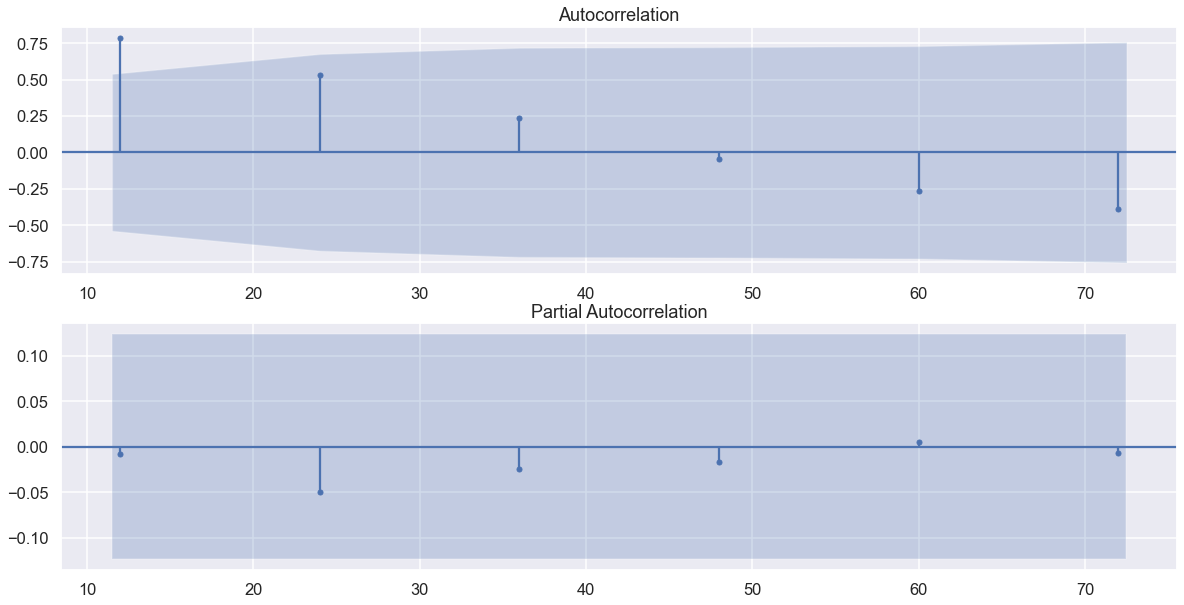

In [68]:
acf_pacf(z60047)

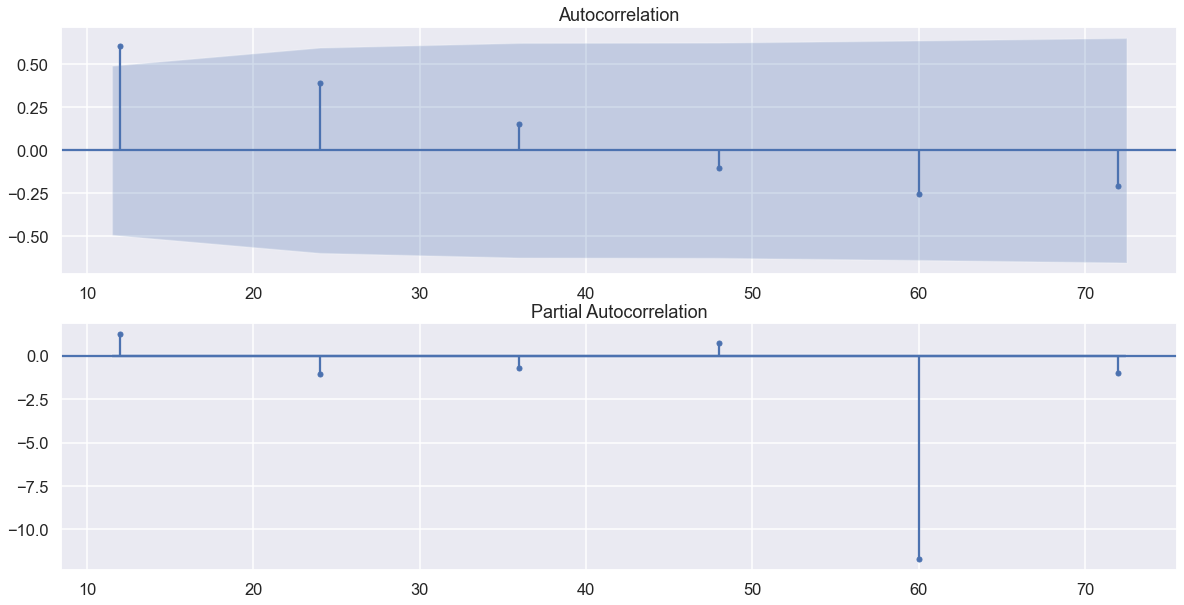

In [69]:
seasonal_acf_pacf(z60047)

In [70]:
params(z60047)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=3741.535, Time=3.61 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5395.043, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=4007.797, Time=2.48 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=6180.905, Time=0.02 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=11.45 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=5.46 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=3782.524, Time=0.63 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=inf, Time=2.46 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=6120.464, Time=4.51 sec
 ARIMA(1,0,1)(2,0,2)[12] intercept   : AIC=3802.417, Time=9.20 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=5199.730, Time=0.63 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=3999.

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                   Price   No. Observations:                  216
Model:             SARIMAX(3, 0, 3)x(0, 0, [1, 2], 12)   Log Likelihood               -2048.065
Date:                                 Thu, 20 May 2021   AIC                           4114.129
Time:                                         08:25:37   BIC                           4143.257
Sample:                                              0   HQIC                          4125.931
                                                 - 216                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3769      0.497      2.772      0.006       0.403       2

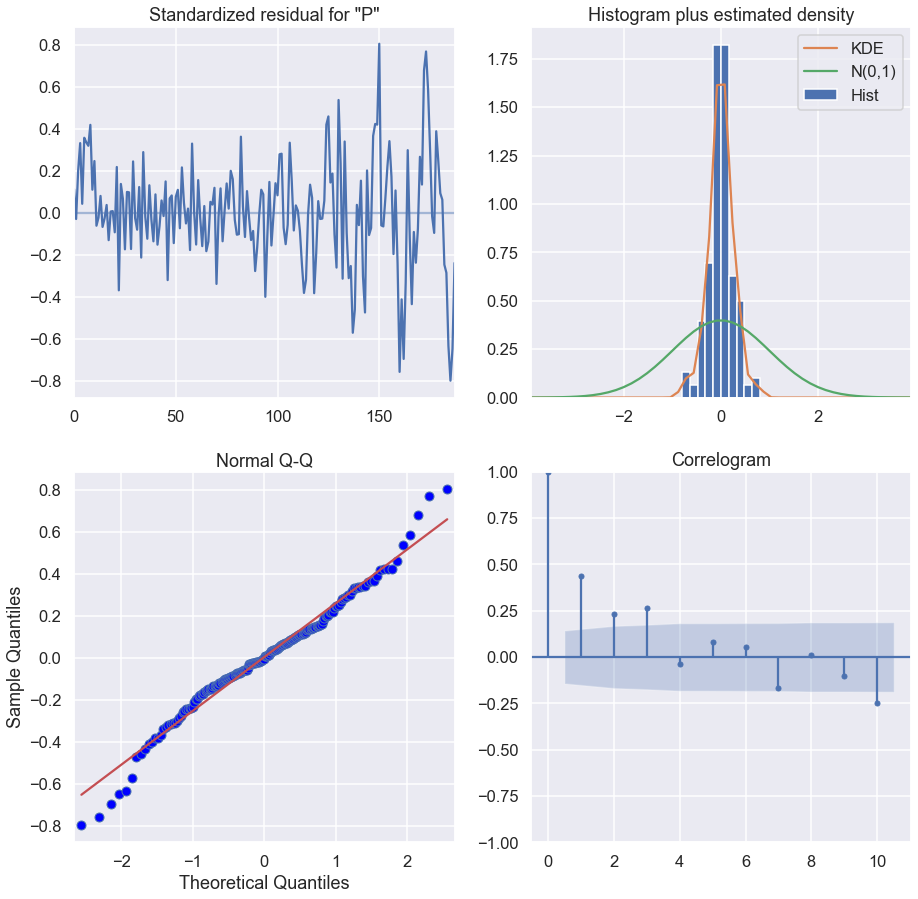

In [144]:
model_fit(z60047, (3, 0, 3), (0, 0, 2, 12))

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Train RMSE: 55112.78713231076


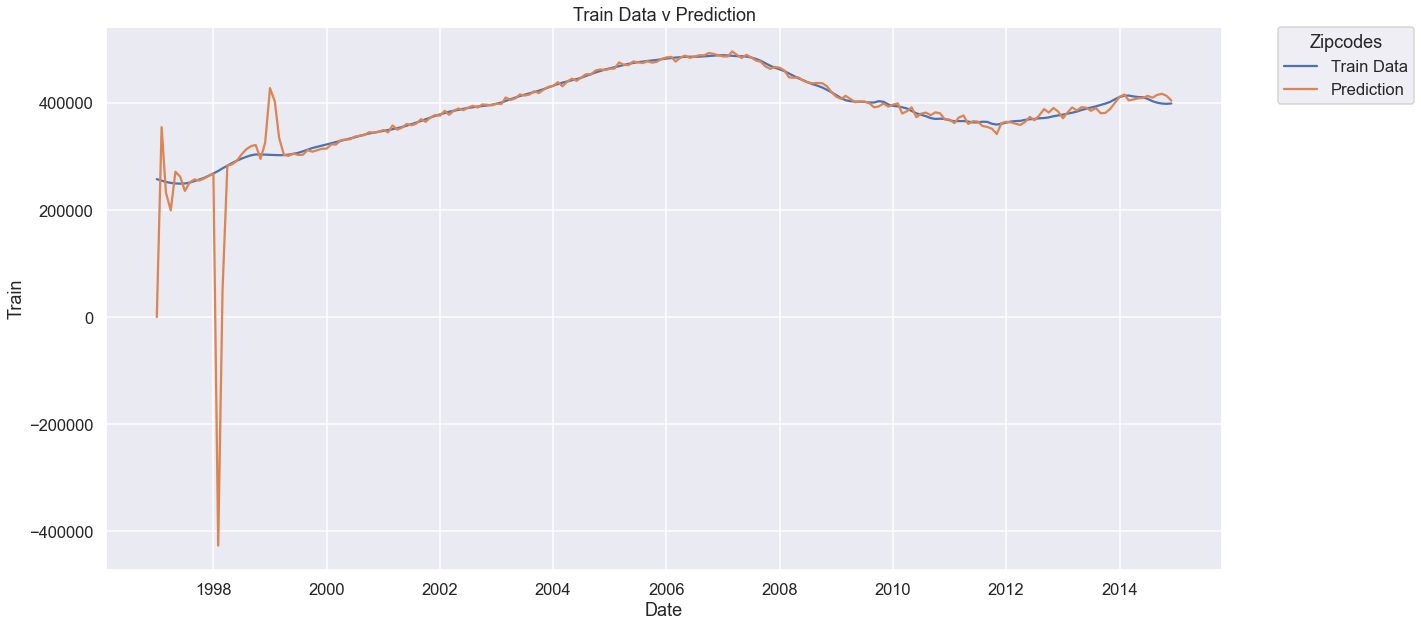

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 121391.78416158872


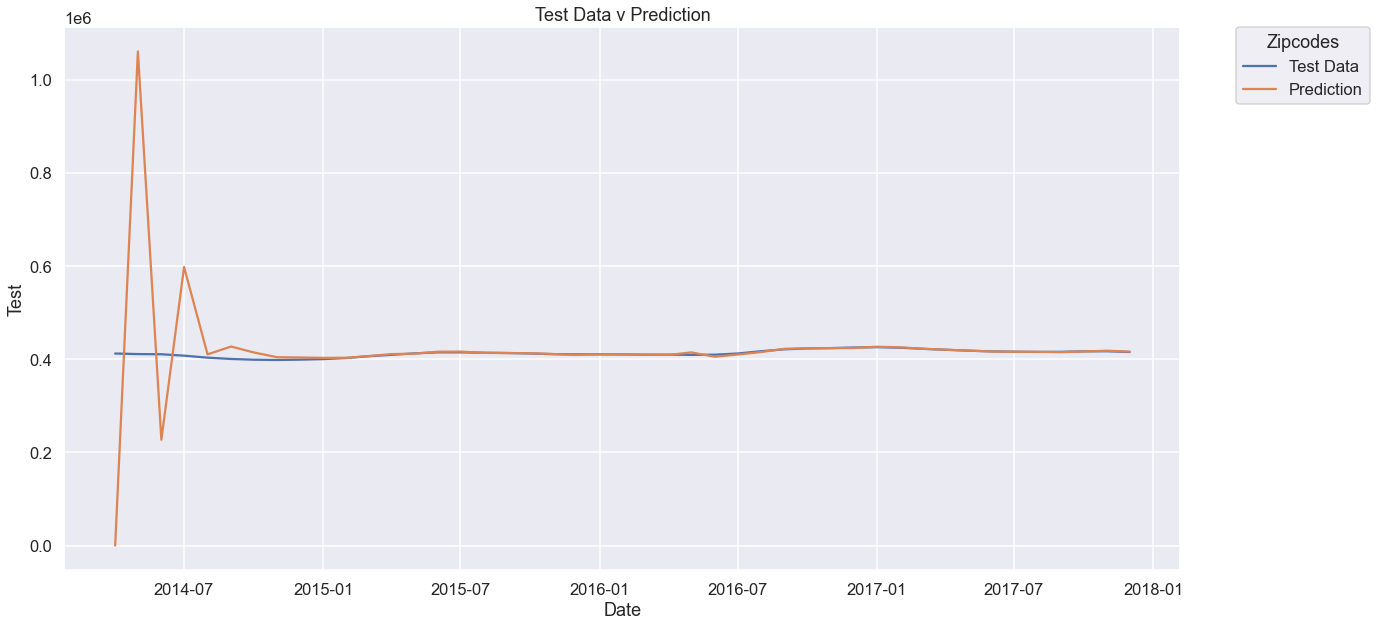

In [189]:
train_rmse(z60047, (3, 0, 3), (0, 0, 2, 12))

test_rmse(z60047, (3, 0, 3), (0, 0, 2, 12))

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index

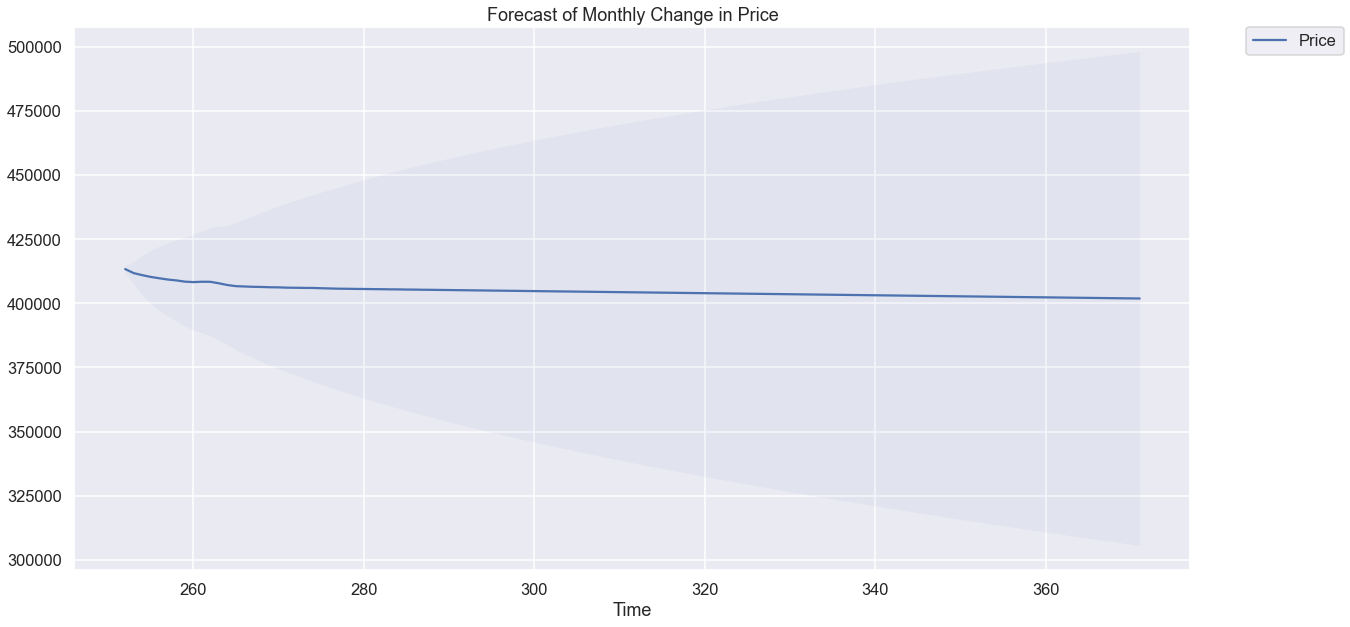

Starting Price: $254900.0
Expected Return - One-Year: $152869.26
Expected Return - Two-Year: $150948.29
Expected Return - Three-Years: $150363.09
Expected Return - Four-Year: $149876.1
Expected Return - Five-Years: $149388.39


In [192]:
forecast(z60047, (3, 0, 3), (0, 0, 2, 12))

In [172]:
zipcode = ['60047']
year5 = ['149388.39']

<a id = 'model_53142'></a>
## 53142

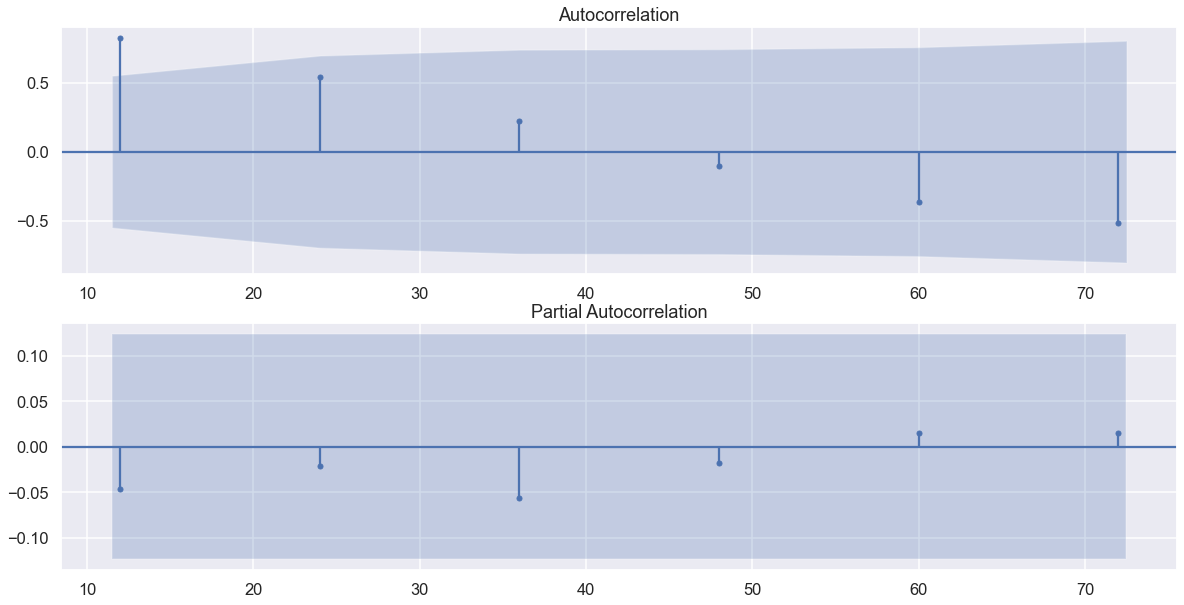

In [75]:
acf_pacf(z53142)

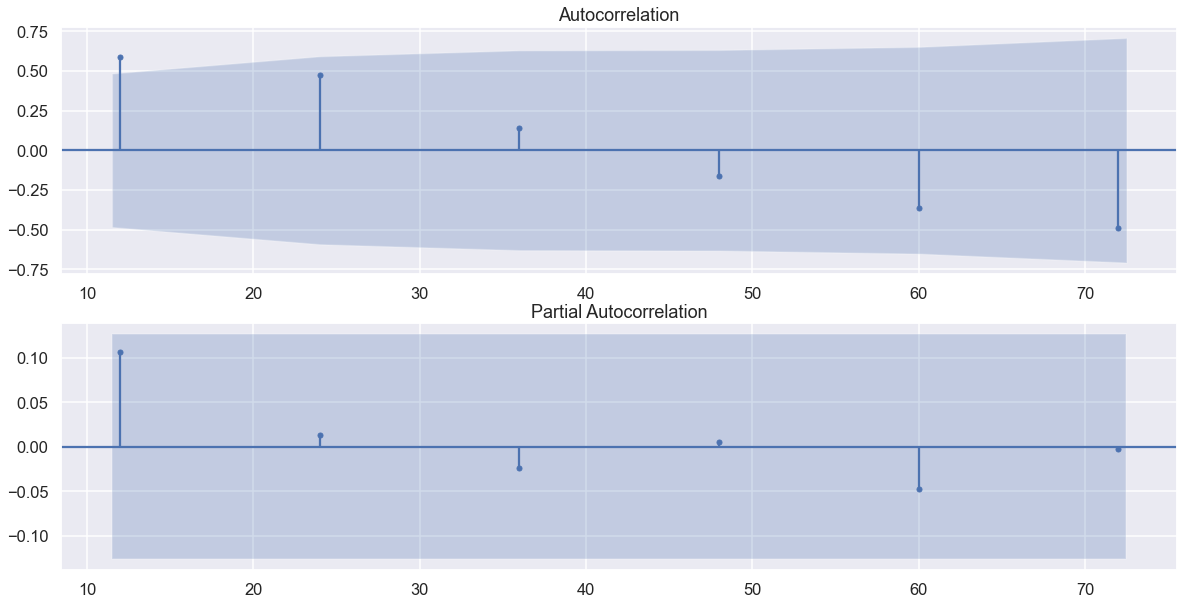

In [76]:
seasonal_acf_pacf(z53142)

In [77]:
params(z53142)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=3300.826, Time=2.29 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4943.020, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=8.46 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5773.868, Time=0.02 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=3308.195, Time=1.02 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=3299.385, Time=1.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=3327.346, Time=0.31 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=3296.351, Time=3.46 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=9.28 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=4781.965, Time=1.83 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=25.84 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=3035.935, Time=5.36 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=3039.418, Time=1.95 sec
 ARIMA(2,0,1)(2,0,1)[12] intercept   :

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                                      SARIMAX Results                                      
Dep. Variable:                               Price   No. Observations:                  216
Model:             SARIMAX(2, 0, 3)x(2, 0, [], 12)   Log Likelihood               -1338.198
Date:                             Thu, 20 May 2021   AIC                           2692.395
Time:                                     08:26:12   BIC                           2718.371
Sample:                                          0   HQIC                          2702.918
                                             - 216                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6425      0.105     15.682      0.000       1.437       1.848
ar.L2         -0.6423      

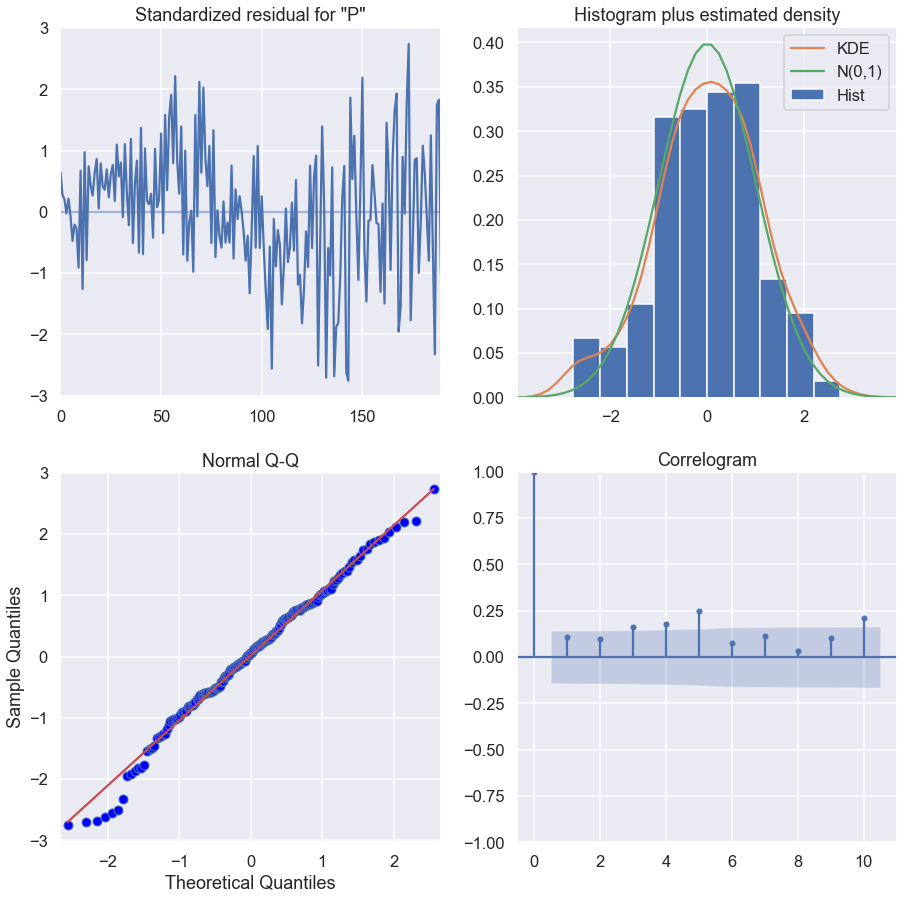

In [147]:
model_fit(z53142, (2, 0, 3), (2, 0, 0, 12))

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Train RMSE: 10331.73595465559


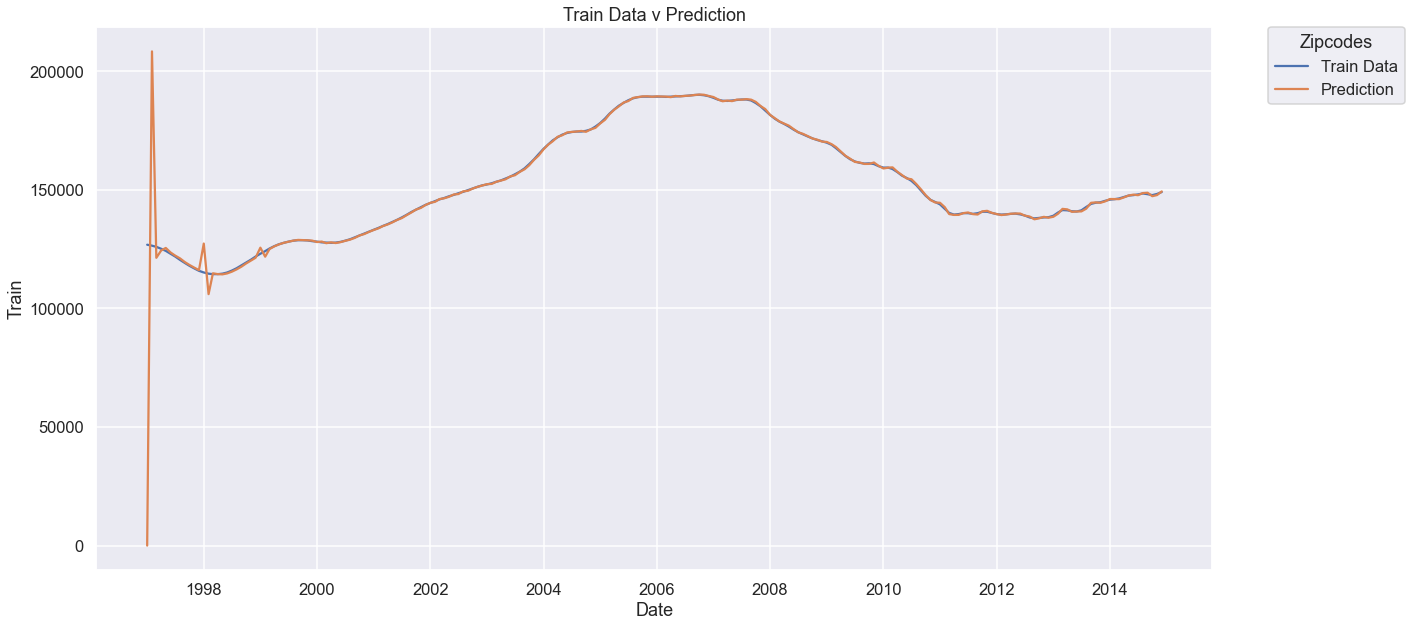

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Test RMSE: 28628.751604024816


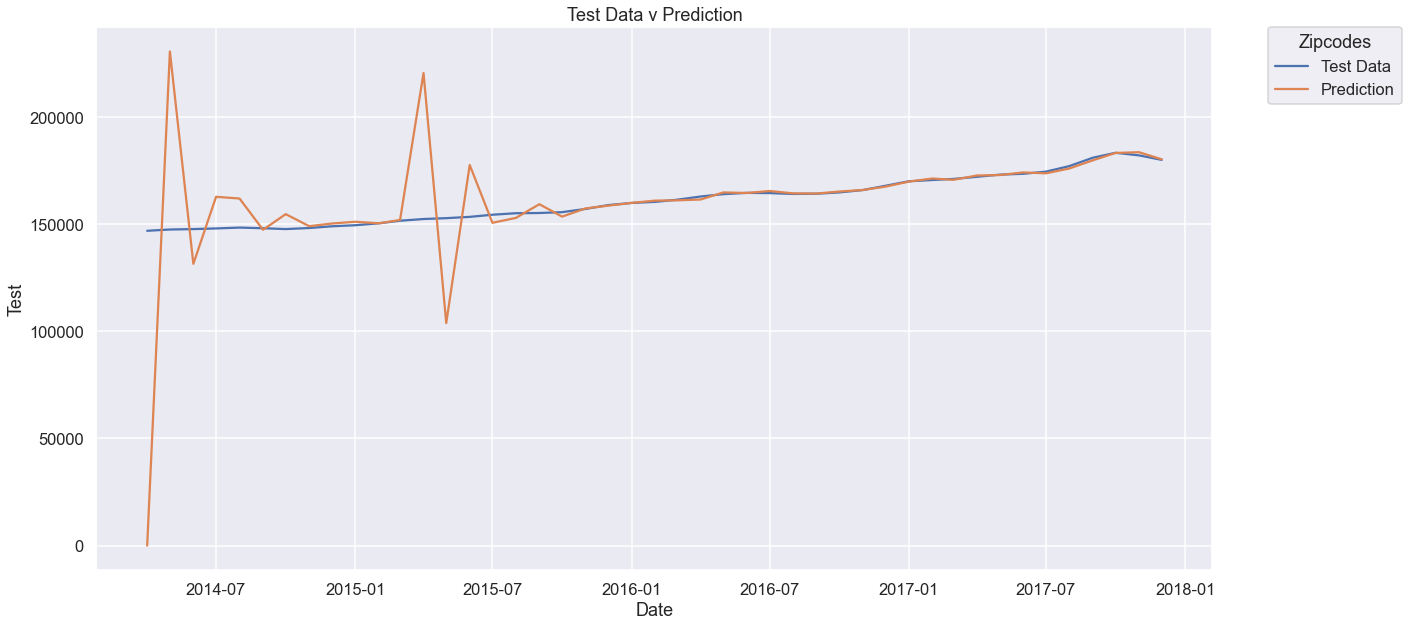

In [148]:
train_rmse(z53142, (2, 0, 3), (2, 0, 0, 12))

test_rmse(z53142, (2, 0, 3), (2, 0, 0, 12))

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index

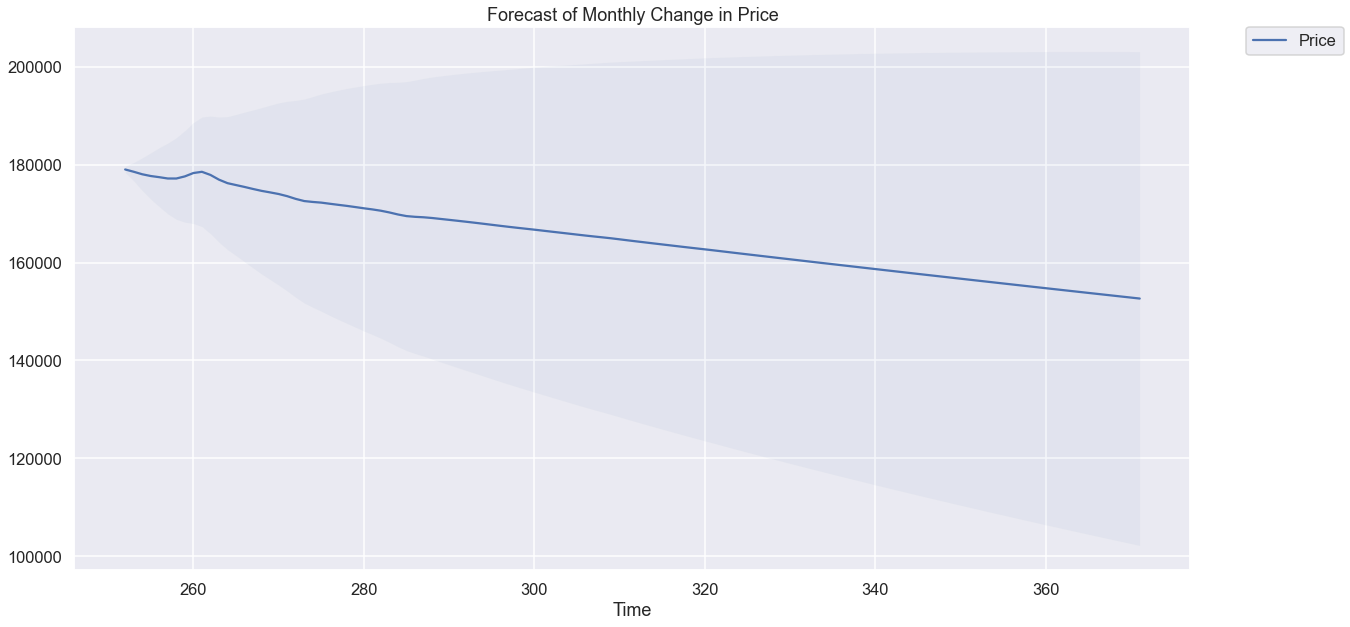

Starting Price: $126400.0
Expected Return - One-Year: $50531.03
Expected Return - Two-Year: $45839.32
Expected Return - Three-Years: $42846.89
Expected Return - Four-Year: $40507.35
Expected Return - Five-Years: $38127.55


In [149]:
forecast(z53142, (2, 0, 3), (2, 0, 0, 12))

In [173]:
zipcode.append('53142')
year5.append('38127.55')

<a id = 'model_53144'></a>
## 53144

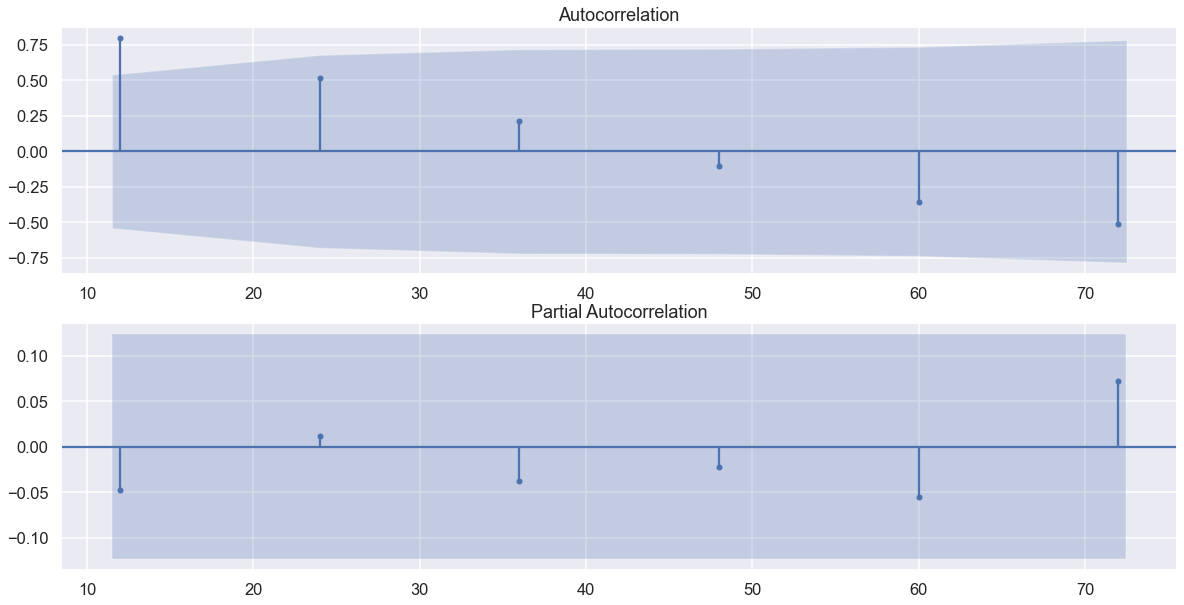

In [82]:
acf_pacf(z53144)

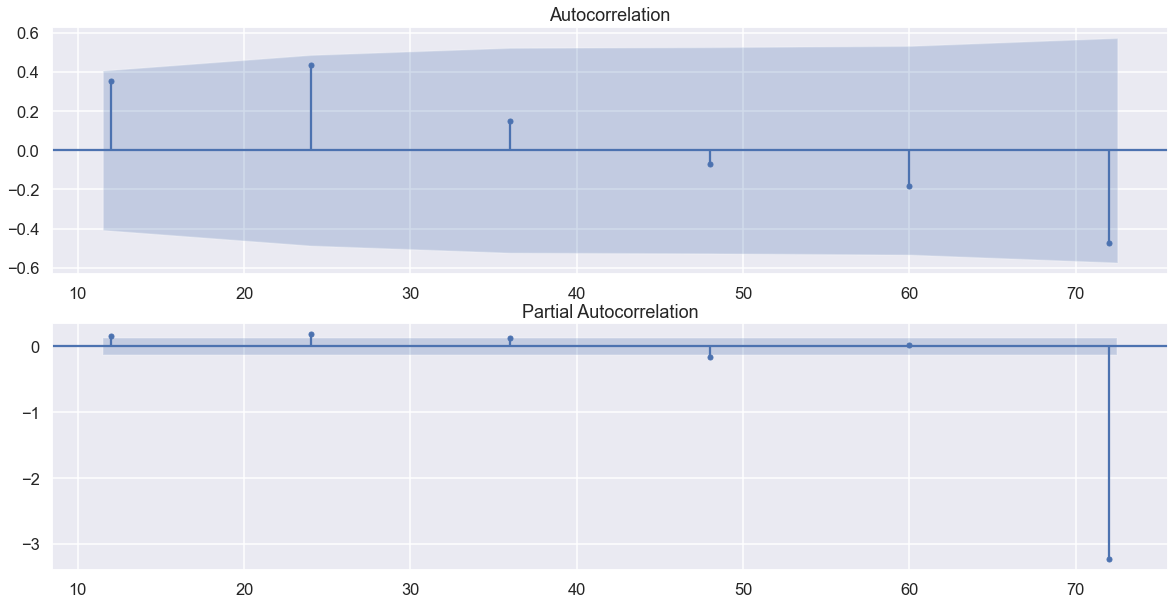

In [83]:
seasonal_acf_pacf(z53144)

In [84]:
params(z53144)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=3328.526, Time=1.72 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4877.741, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5761.907, Time=0.02 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=3330.515, Time=0.99 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=3329.490, Time=1.12 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=4085.284, Time=8.35 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=3362.484, Time=6.36 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=3330.989, Time=0.30 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=3322.606, Time=2.39 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=inf, Time=3.50 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=3544.543, Time=1.60 sec
 ARIMA(2,0,1)(0,0,2)[12] intercept   : AIC=3105.604, Time=2.25 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                Price   No. Observations:                  216
Model:             SARIMAX(3, 0, 2)x(1, 0, [1], 12)   Log Likelihood               -1528.414
Date:                              Thu, 20 May 2021   AIC                           3072.829
Time:                                      08:26:30   BIC                           3099.255
Sample:                                           0   HQIC                          3083.522
                                              - 216                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4054      0.052     26.829      0.000       1.303       1.508
ar.L2         -0.14

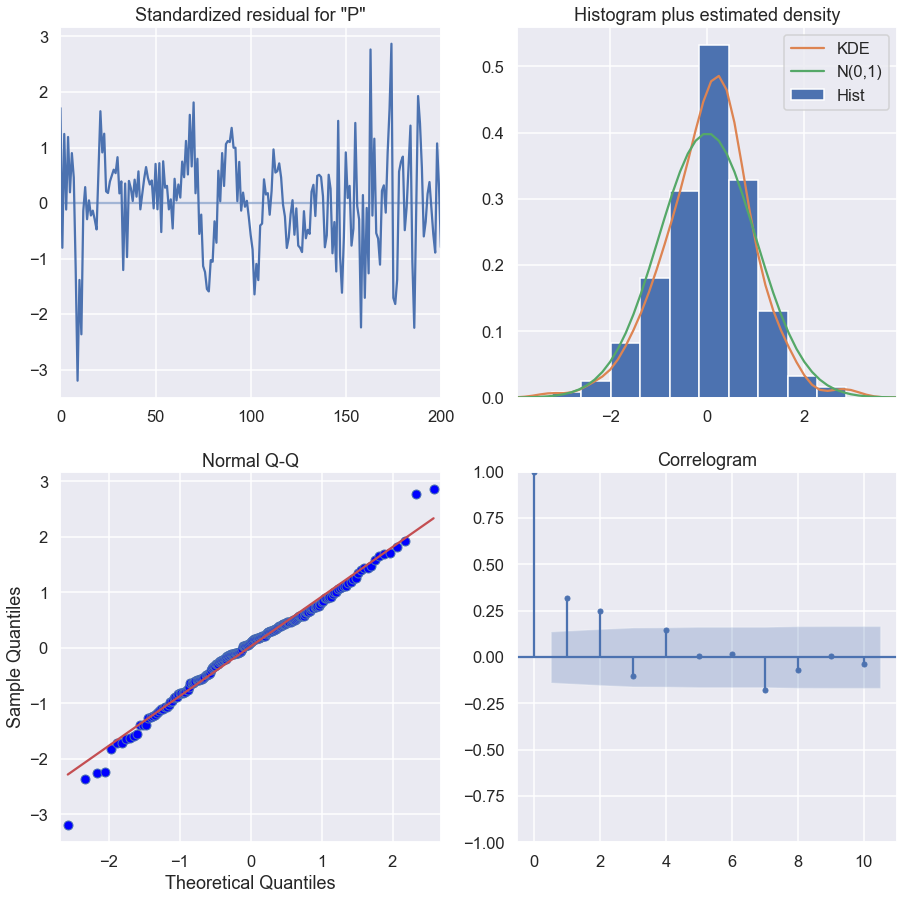

In [150]:
model_fit(z53144, (3, 0, 2), (1, 0, 1, 12))

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Train RMSE: 9442.47175603376


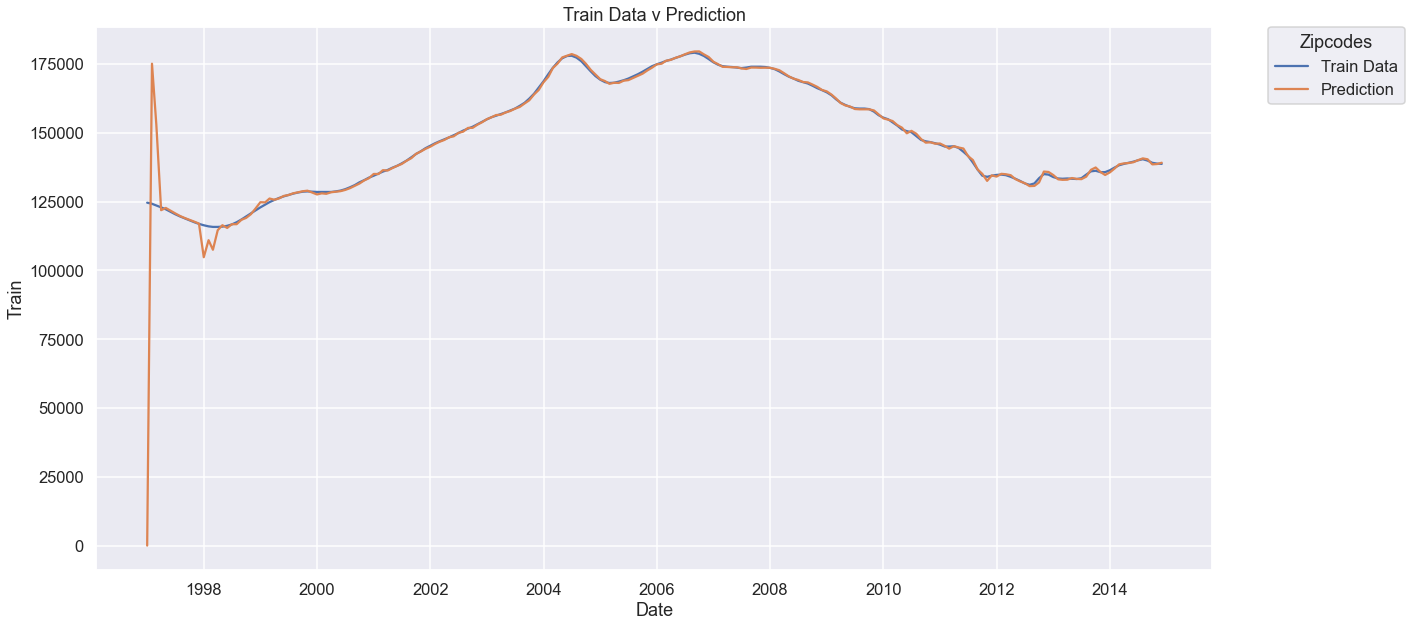

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Test RMSE: 2.153103073335666e+16


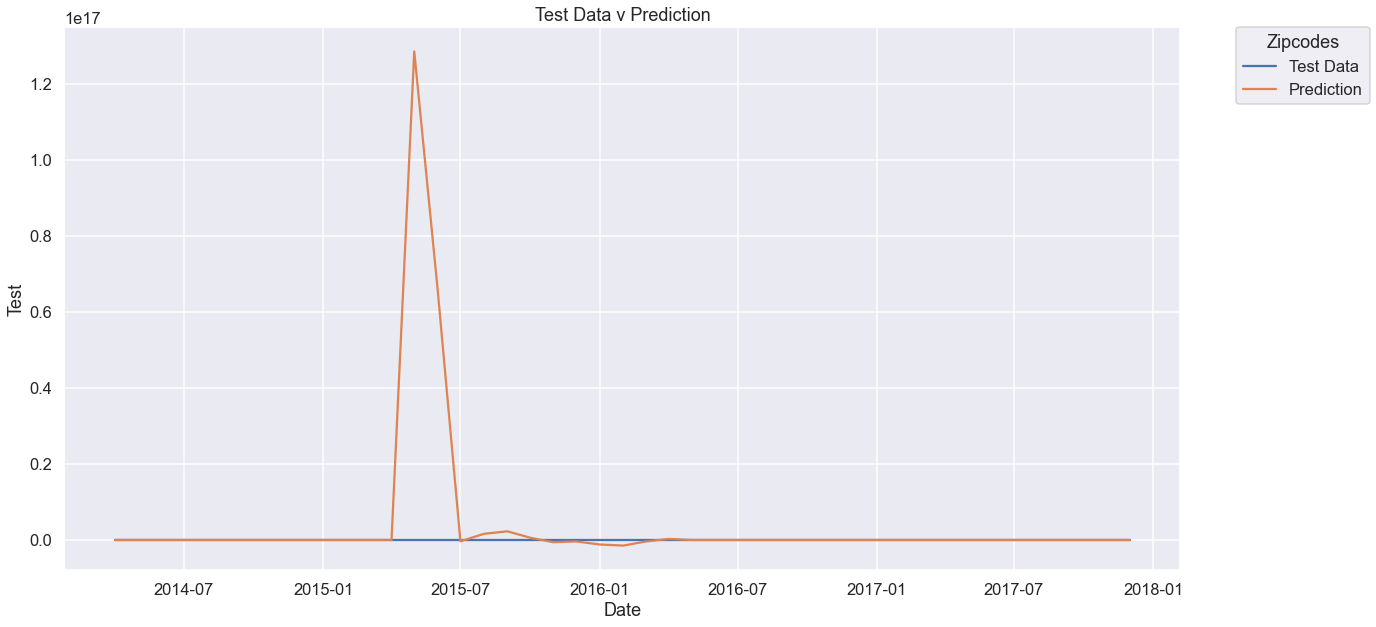

In [151]:
train_rmse(z53144, (3, 0, 2), (1, 0, 1, 12))

test_rmse(z53144, (3, 0, 2), (1, 0, 1, 12))

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index

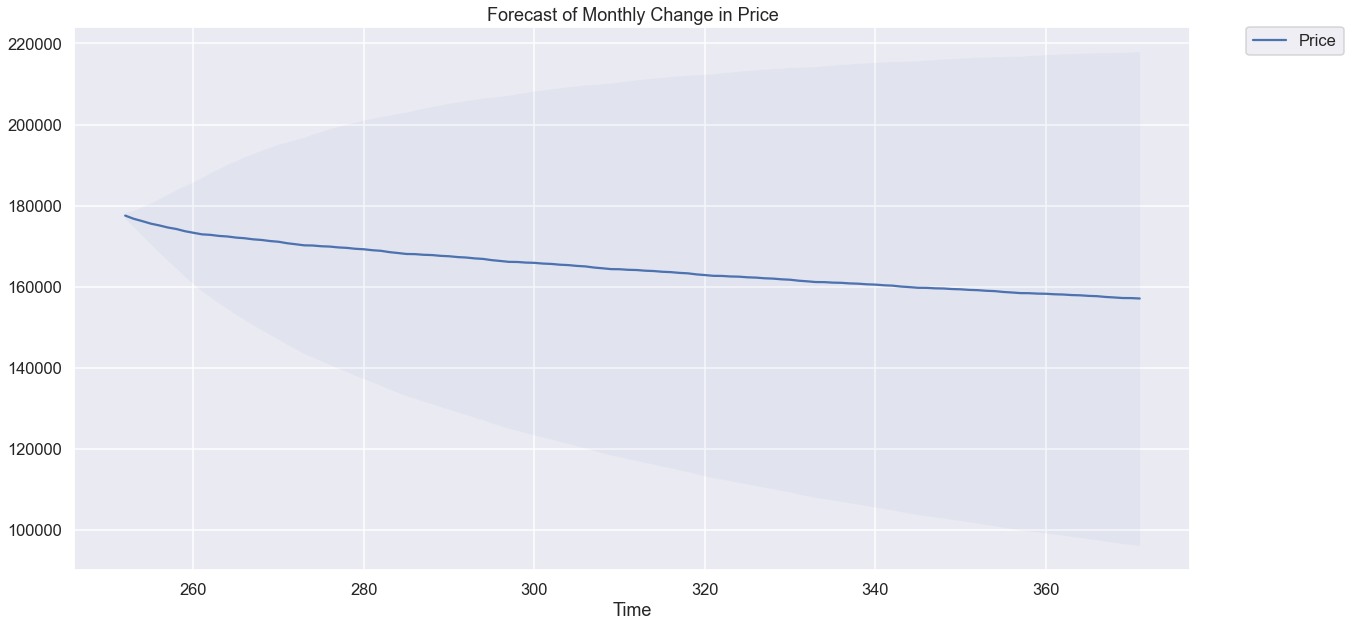

Starting Price: $124200.0
Expected Return - One-Year: $48326.56
Expected Return - Two-Year: $45779.39
Expected Return - Three-Years: $43672.4
Expected Return - Four-Year: $41746.87
Expected Return - Five-Years: $39968.79


In [152]:
forecast(z53144, (3, 0, 2), (1, 0, 1, 12))

In [174]:
zipcode.append('53144')
year5.append('39968.79')

<a id = 'model_53158'></a>
## 53158

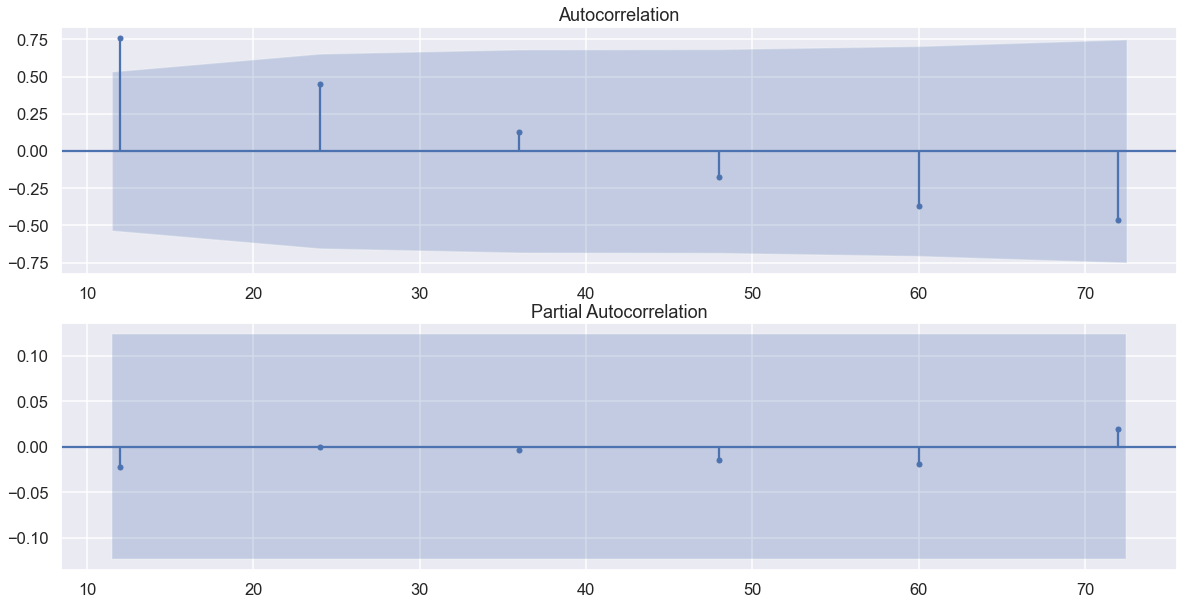

In [89]:
acf_pacf(z53158)

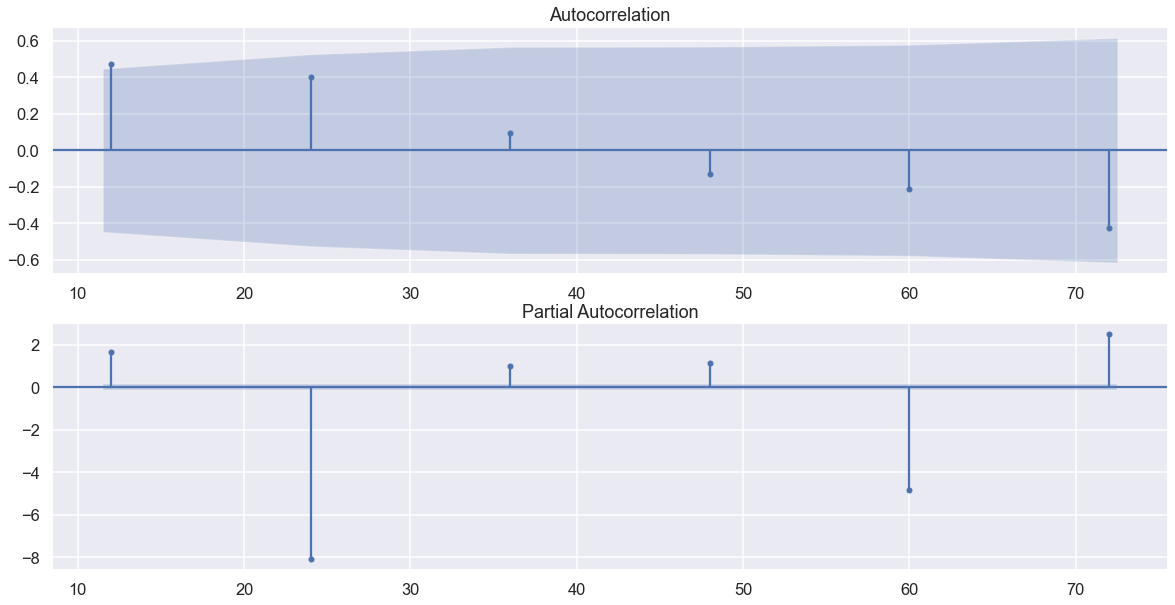

In [90]:
seasonal_acf_pacf(z53158)

In [91]:
params(z53158)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=3530.839, Time=2.16 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5023.796, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5867.451, Time=0.02 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=3527.976, Time=1.11 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=3531.343, Time=0.35 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=3529.696, Time=2.79 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=3528.223, Time=1.13 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=3549.165, Time=6.05 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=3746.712, Time=0.32 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=3323.854, Time=0.97 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=3326.708, Time=0.40 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.32 sec
 ARIMA(2,0,1)(0,0,2)[12] intercept

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                  216
Model:             SARIMAX(3, 0, 2)x(0, 0, 2, 12)   Log Likelihood               -1529.704
Date:                            Thu, 20 May 2021   AIC                           3075.409
Time:                                    08:26:51   BIC                           3101.343
Sample:                                         0   HQIC                          3085.915
                                            - 216                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0314      0.057     18.129      0.000       0.920       1.143
ar.L2         -0.0394      0.082   

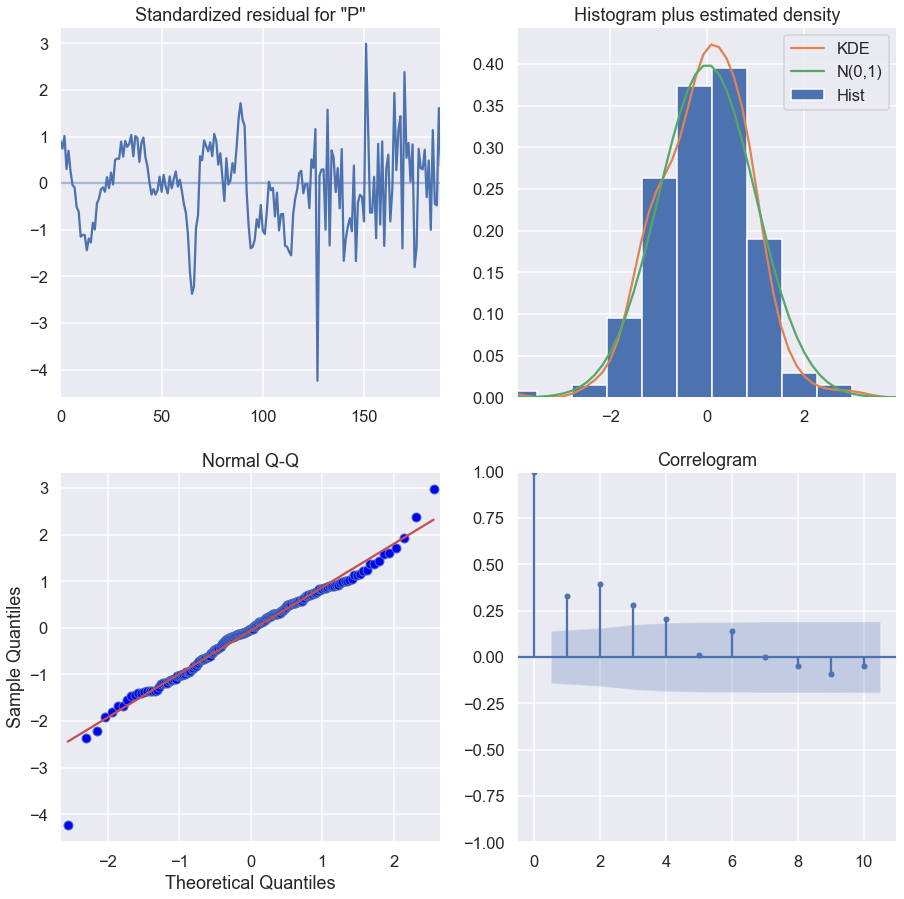

In [153]:
model_fit(z53158, (3, 0, 2), (0, 0, 2, 12))

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Train RMSE: 10200.689298677464


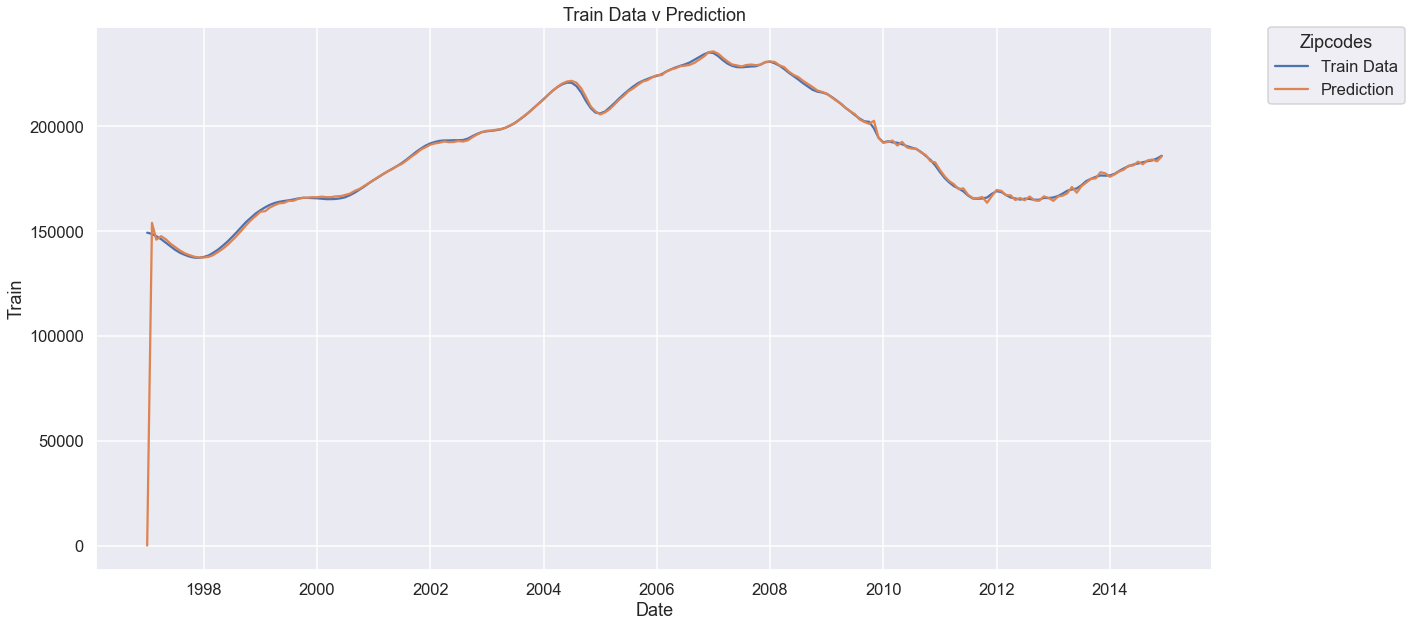

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Test RMSE: 46564.78354239607


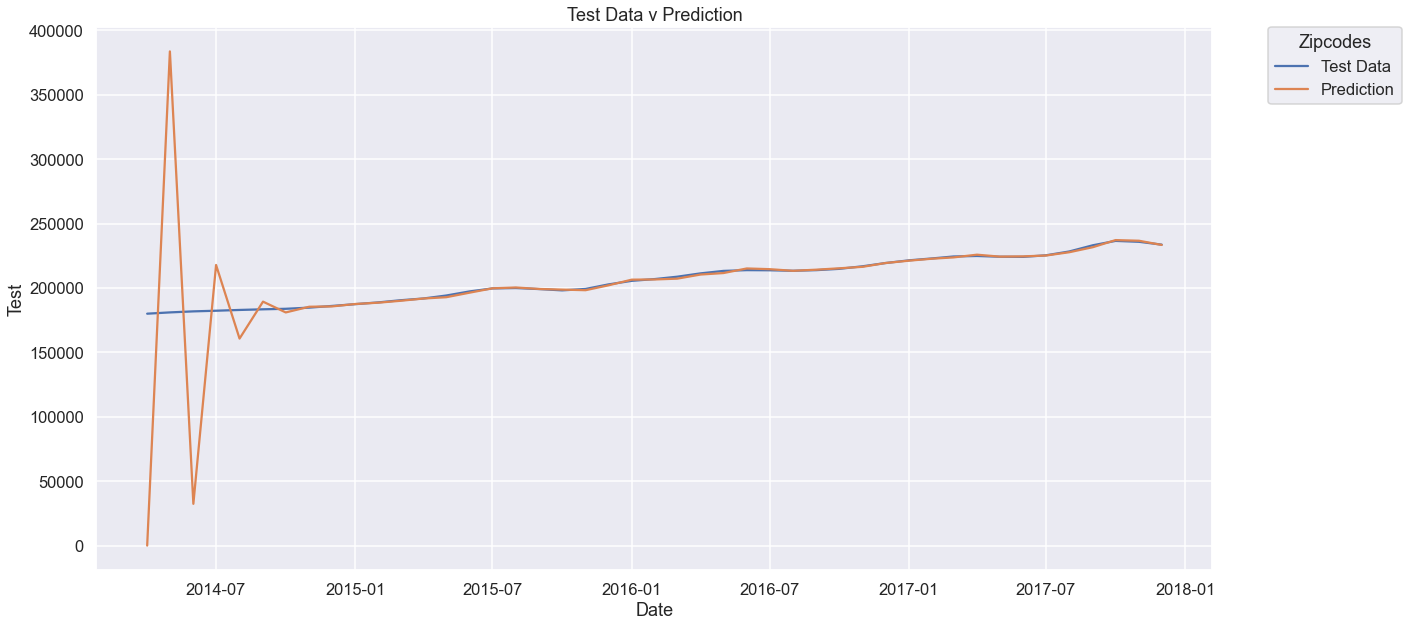

In [155]:
train_rmse(z53158, (3, 0, 2), (0, 0, 2, 12))

test_rmse(z53158, (3, 0, 2), (0, 0, 2, 12))

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index

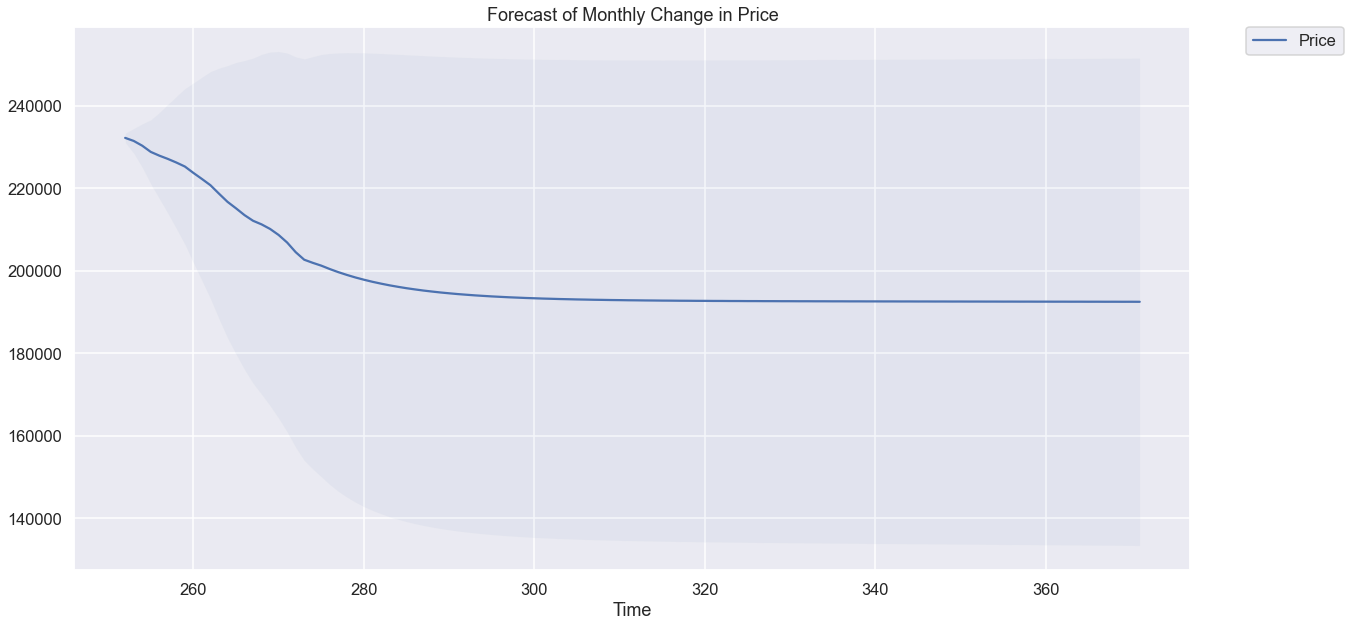

Starting Price: $148700.0
Expected Return - One-Year: $69983.17
Expected Return - Two-Year: $52524.59
Expected Return - Three-Years: $46484.02
Expected Return - Four-Year: $44684.86
Expected Return - Five-Years: $44133.74


In [156]:
forecast(z53158, (3, 0, 2), (0, 0, 2, 12))

In [175]:
zipcode.append('53158')
year5.append('44133.74')

<a id = 'model_53181'></a>
## 53181

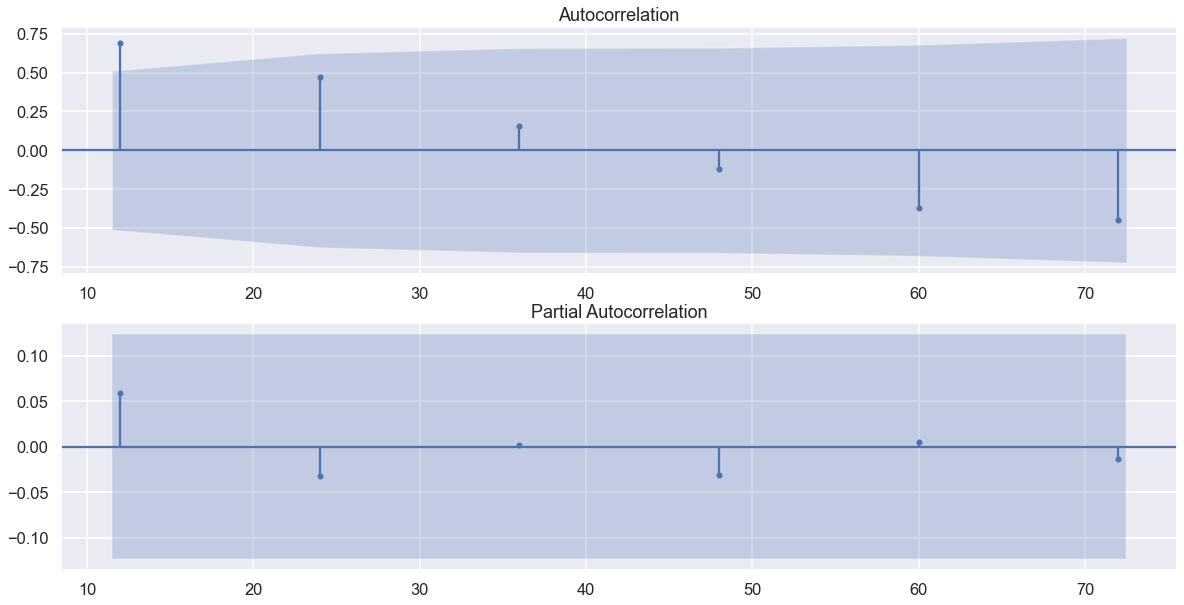

In [96]:
acf_pacf(z53181)

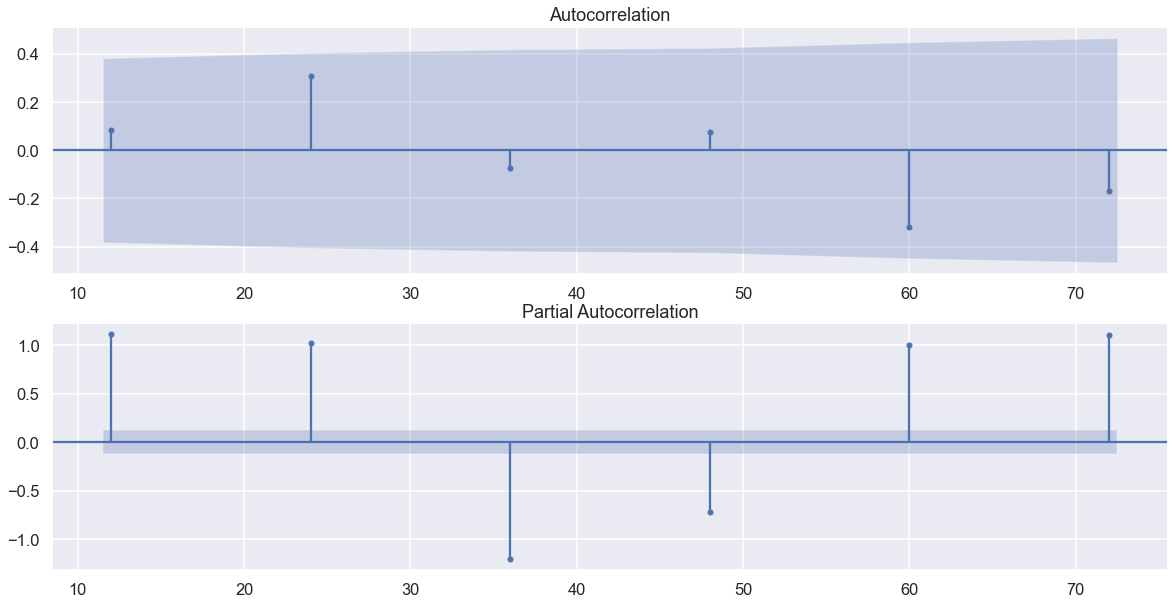

In [97]:
seasonal_acf_pacf(z53181)

In [98]:
params(z53181)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=3422.392, Time=1.56 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4879.729, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=2.45 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5794.293, Time=0.02 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=3428.135, Time=1.49 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=3428.082, Time=1.60 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=3417.697, Time=4.75 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=3423.013, Time=3.34 sec
 ARIMA(1,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=7.57 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=6.71 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=3.88 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=3648.447, Time=1.89 sec
 ARIMA(2,0,1)(2,0,1)[12] intercept   : AIC=3156.594, Time=5.32 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=3

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                  216
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -1494.713
Date:                            Thu, 20 May 2021   AIC                           3001.425
Time:                                    08:27:24   BIC                           3021.275
Sample:                                         0   HQIC                          3009.457
                                            - 216                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6779      0.035     47.298      0.000       1.608       1.747
ar.L2         -0.6777      0.035   

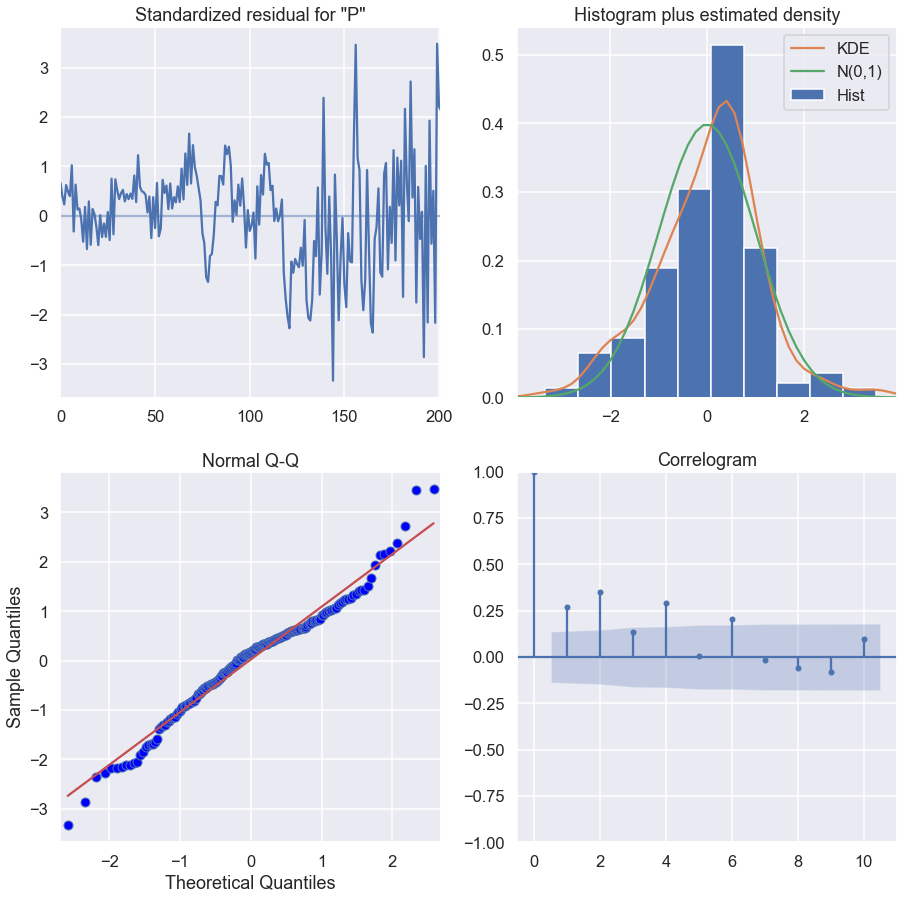

In [157]:
model_fit(z53181, (2, 0, 1), (1, 0, 1, 12))

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Train RMSE: 10853.769594309464


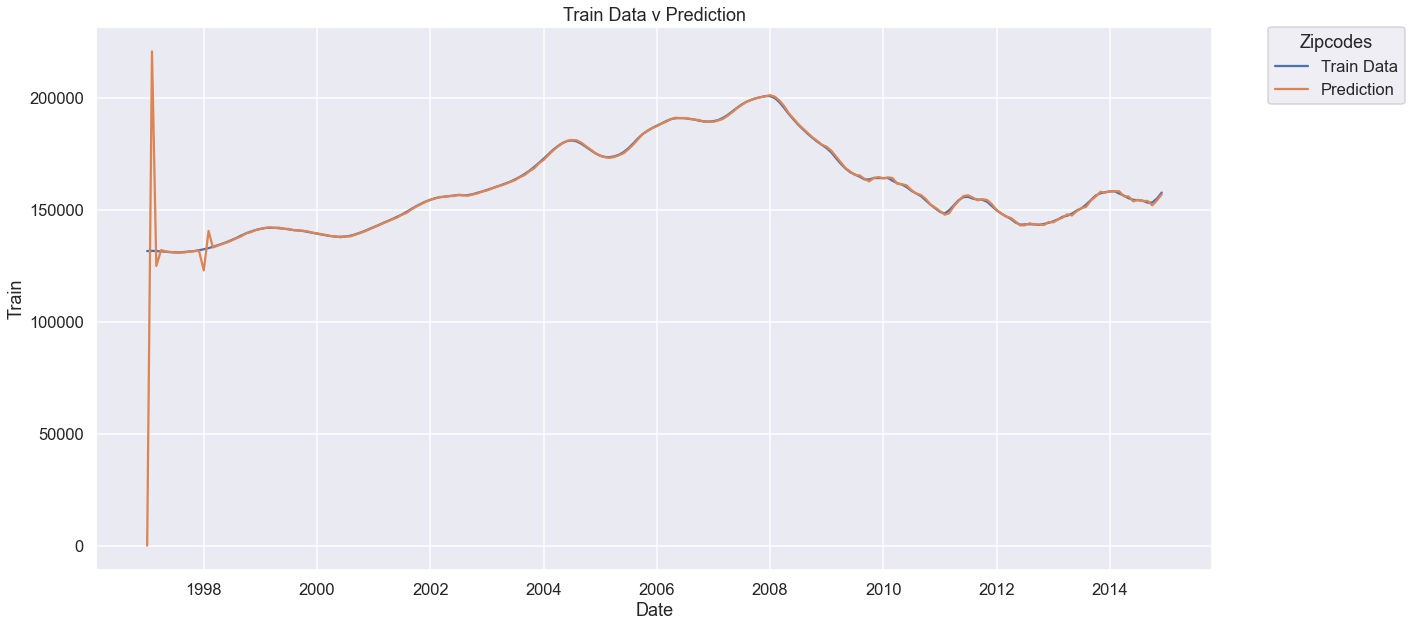

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 7381369923704052.0


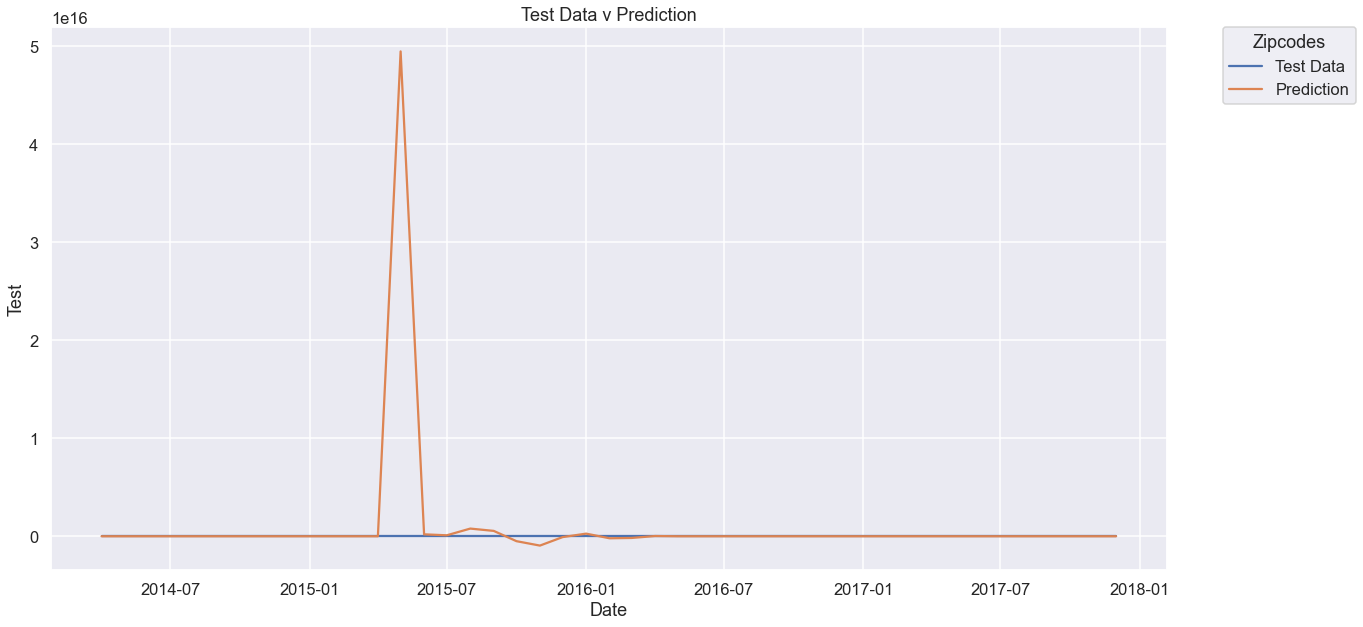

In [158]:
train_rmse(z53181, (2, 0, 1), (1, 0, 1, 12))

test_rmse(z53181, (2, 0, 1), (1, 0, 1, 12))

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index

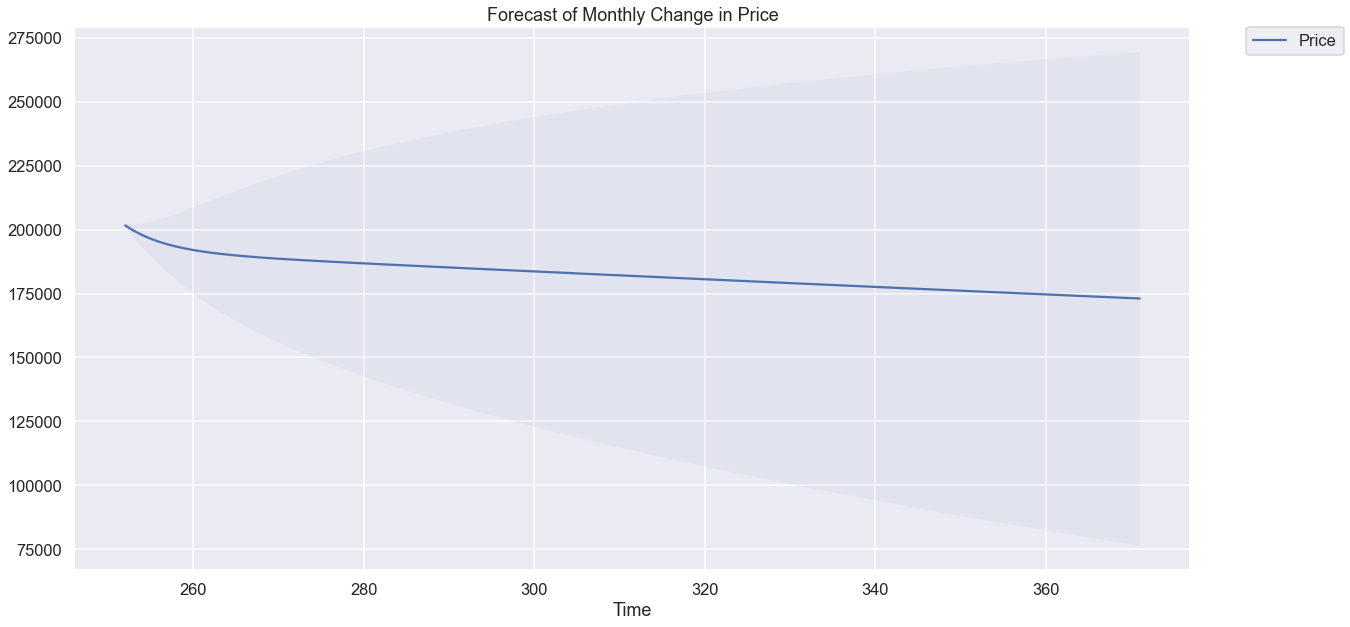

Starting Price: $131600.0
Expected Return - One-Year: $58978.99
Expected Return - Two-Year: $56043.12
Expected Return - Three-Years: $54066.02
Expected Return - Four-Year: $52193.82
Expected Return - Five-Years: $50350.55


In [159]:
forecast(z53181, (2, 0, 1), (1, 0, 1, 12))

In [102]:
zipcode.append('53181')
year5.append('50350.55')

<a id = 'model_53108'></a>
## 53108

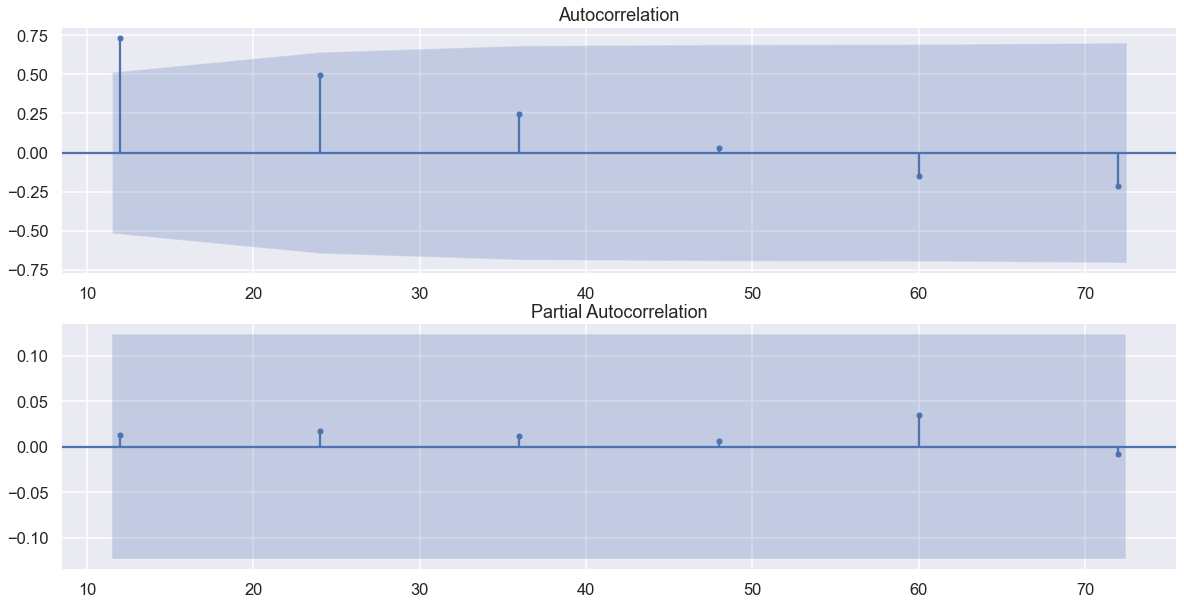

In [103]:
acf_pacf(z53108)

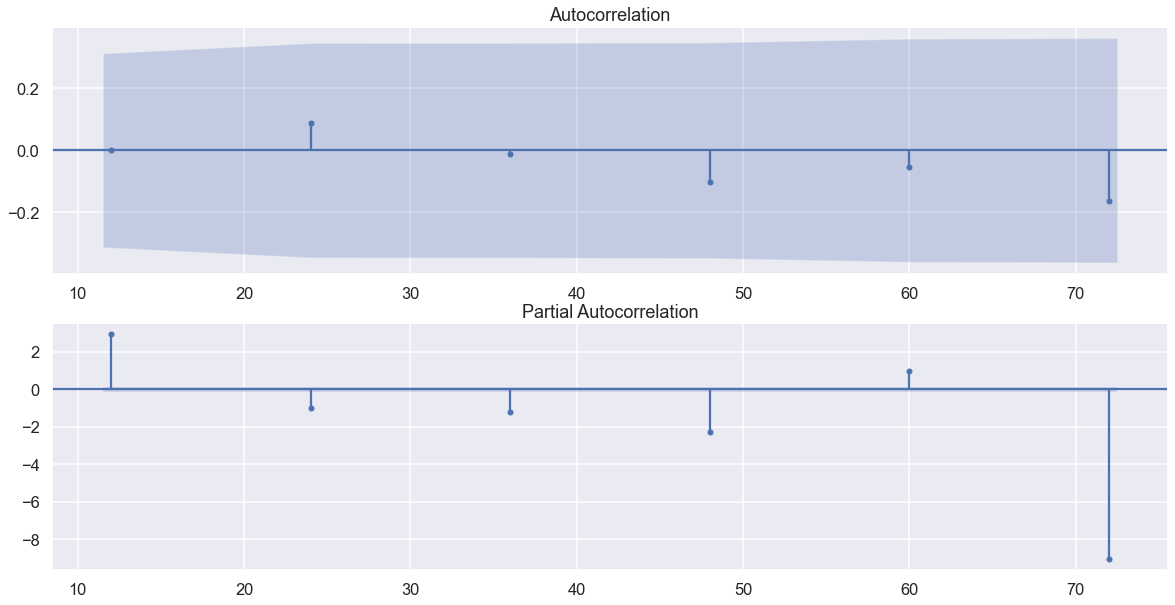

In [104]:
seasonal_acf_pacf(z53108)

In [105]:
params(z53108)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=3687.125, Time=2.17 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4999.002, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3942.649, Time=1.36 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5815.125, Time=0.02 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=3685.642, Time=0.96 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=3684.238, Time=0.30 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=3685.762, Time=1.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=3941.479, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=3486.640, Time=0.40 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=3486.426, Time=1.30 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=3477.672, Time=3.20 sec
 ARIMA(2,0,1)(2,0,1)[12] intercept   : AIC=3468.384, Time=5.49 sec
 ARIMA(2,0,1)(1,0,1)[12] inte

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                  216
Model:             SARIMAX(2, 0, 1)x(2, 0, 1, 12)   Log Likelihood               -1538.997
Date:                            Thu, 20 May 2021   AIC                           3091.994
Time:                                    08:13:41   BIC                           3114.723
Sample:                                         0   HQIC                          3101.201
                                            - 216                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7205      0.036     47.445      0.000       1.649       1.792
ar.L2         -0.7205      0.036   

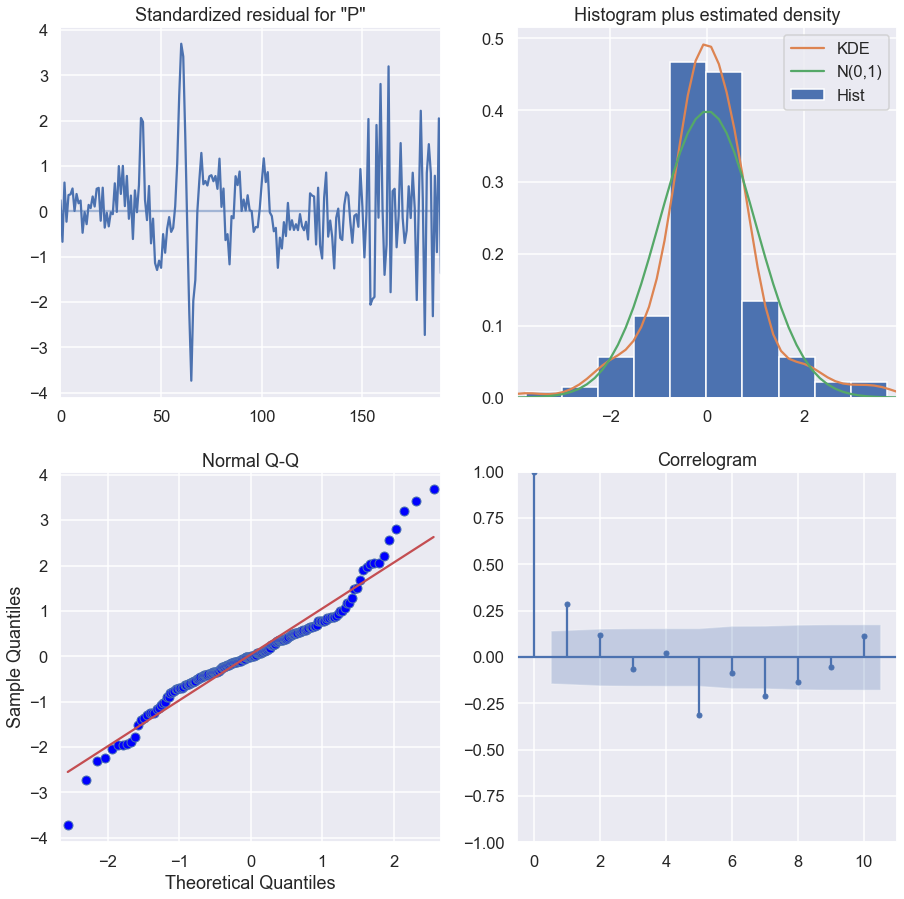

In [106]:
model_fit(z53108, (2, 0, 1), (2, 0, 1, 12))

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Train RMSE: 10726.24418064514


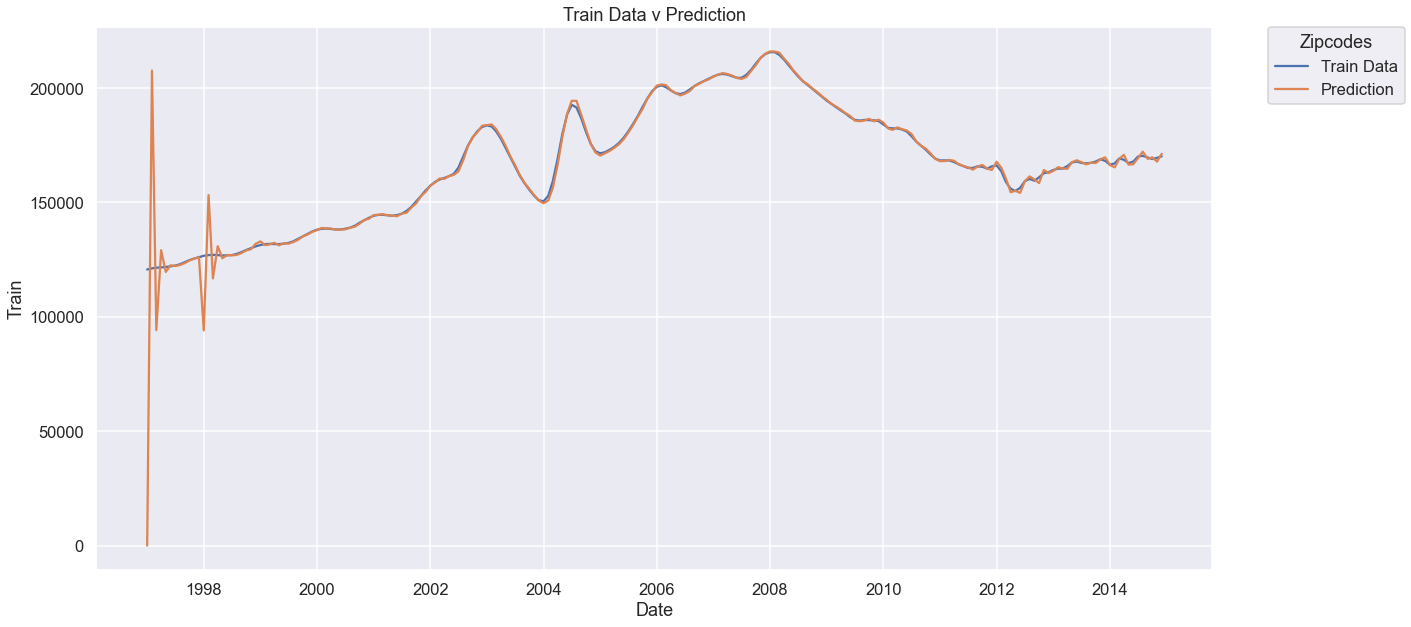

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 359051.6393830737


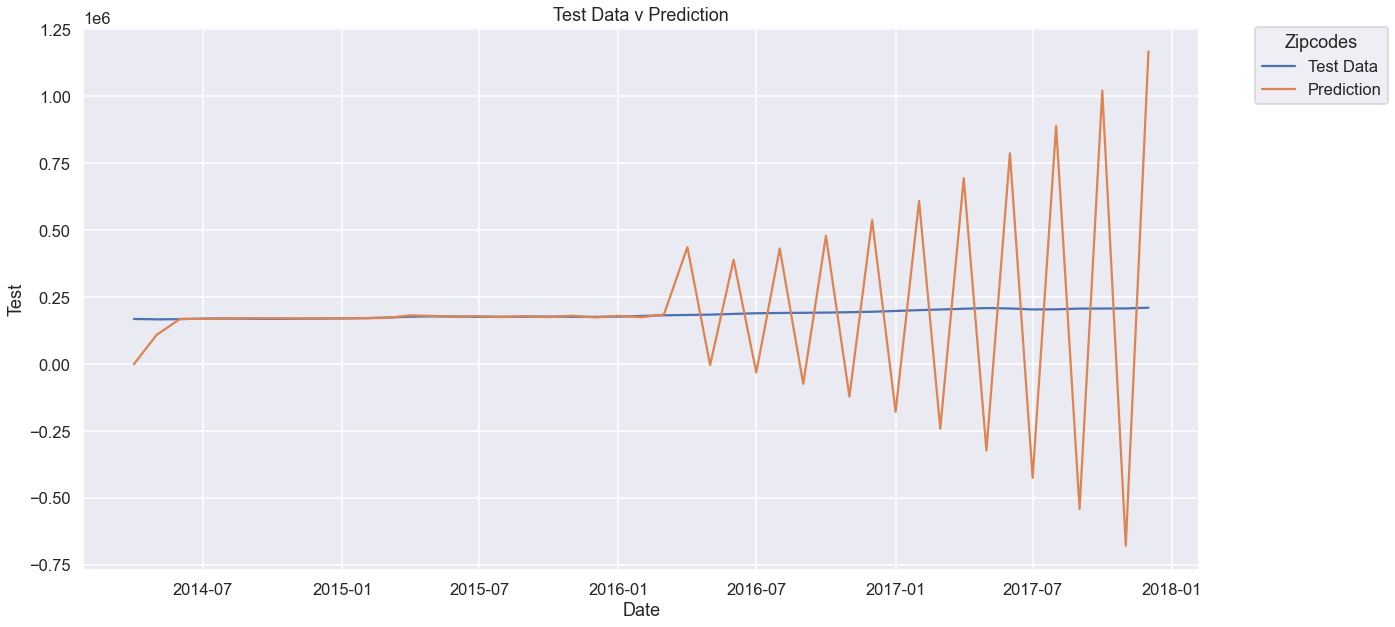

In [107]:
train_rmse(z53108, (2, 0, 1), (2, 0, 1, 12))

test_rmse(z53108, (2, 0, 1), (2, 0, 1, 12))

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


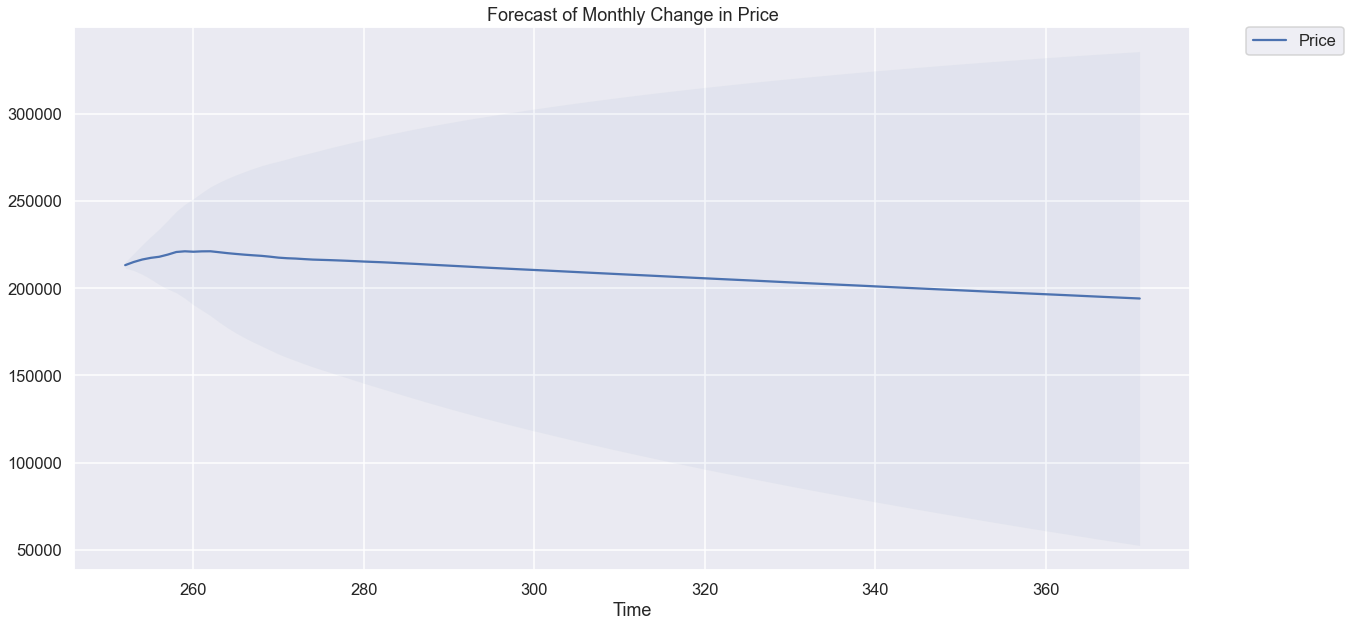

Starting Price: $121200.0
Expected Return - One-Year: $99407.83
Expected Return - Two-Year: $95016.71
Expected Return - Three-Years: $92455.96
Expected Return - Four-Year: $89440.3
Expected Return - Five-Years: $86574.04


In [108]:
forecast(z53108, (2, 0, 1), (2, 0, 1, 12))

In [176]:
zipcode.append('53108')
year5.append('86574.04')

<a id = 'model_53139'></a>
## 53139

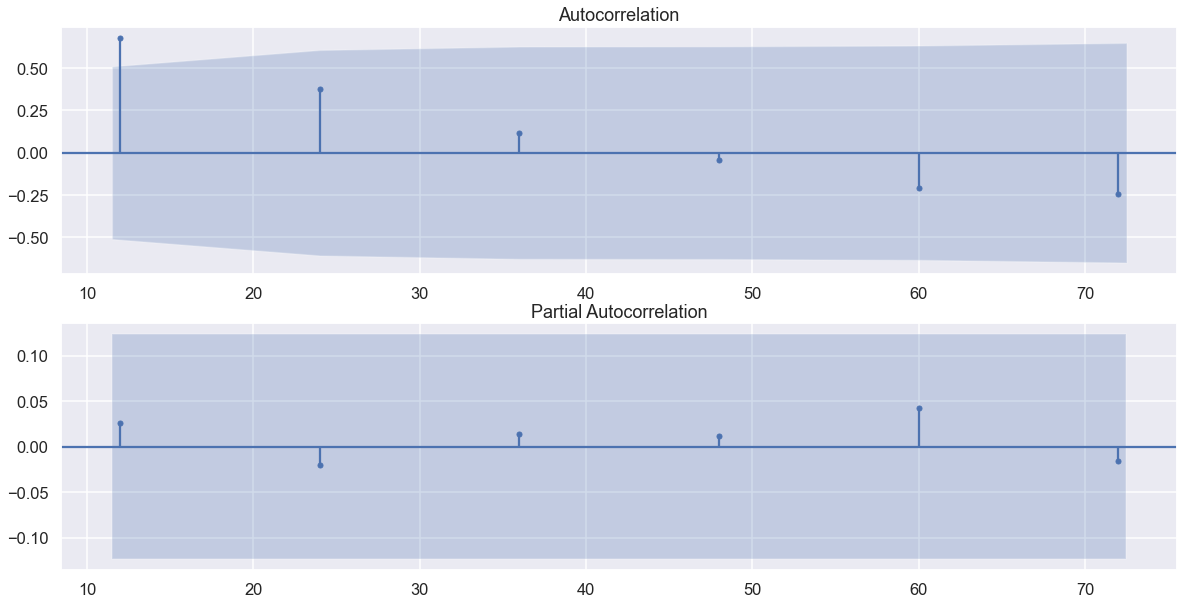

In [110]:
acf_pacf(z53139)

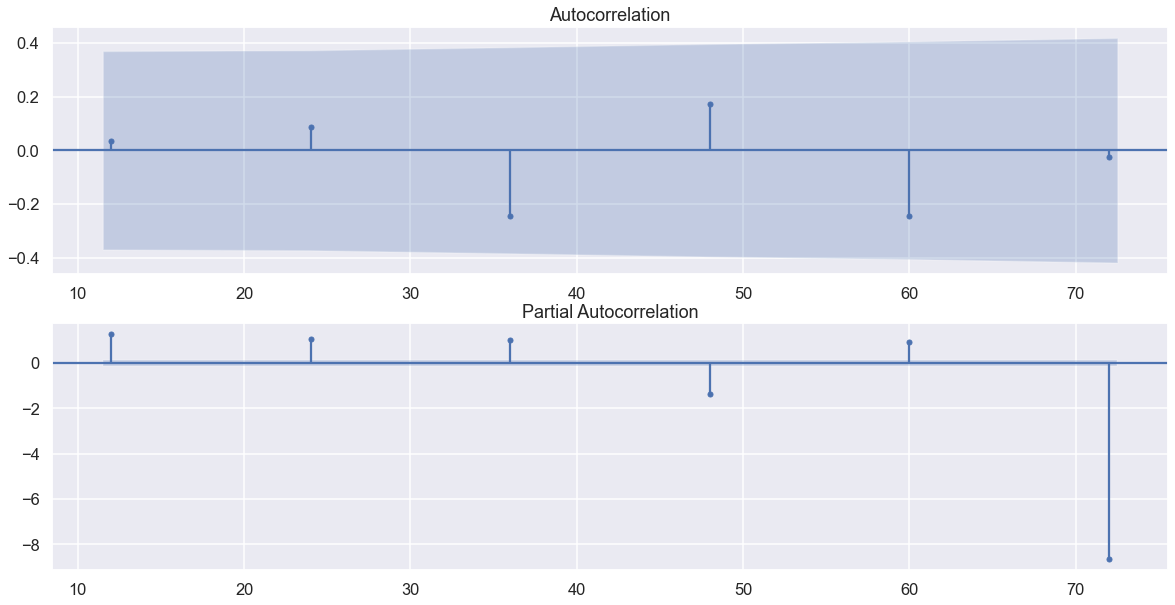

In [111]:
seasonal_acf_pacf(z53139)

In [112]:
params(z53139)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4997.209, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3920.679, Time=0.86 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5832.189, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=3922.309, Time=0.07 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=3922.638, Time=8.53 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=3922.338, Time=0.25 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=4.36 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=4996.873, Time=0.54 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=3591.662, Time=2.64 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=3595.221, Time=0.14 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=3589.157, Time=11.47 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   :

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                  216
Model:             SARIMAX(3, 0, 2)x(0, 0, 2, 12)   Log Likelihood               -1607.097
Date:                            Thu, 20 May 2021   AIC                           3230.193
Time:                                    08:27:45   BIC                           3256.127
Sample:                                         0   HQIC                          3240.700
                                            - 216                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0557      0.062     16.917      0.000       0.933       1.178
ar.L2         -0.0562      0.095   

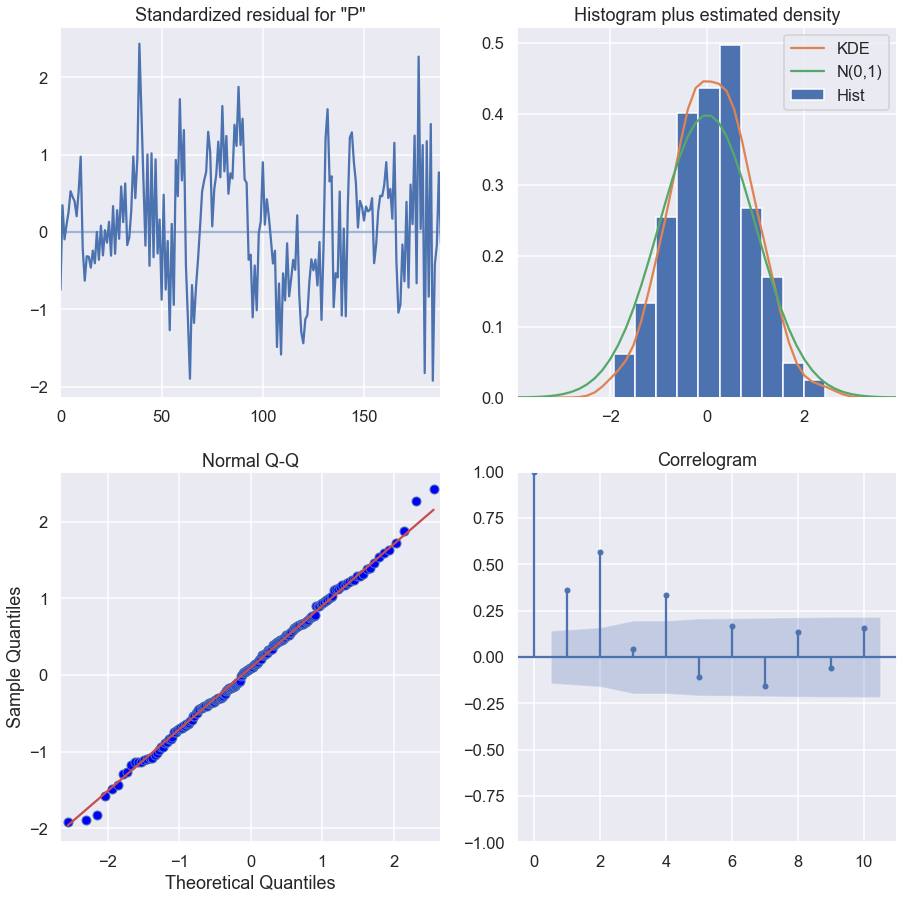

In [160]:
model_fit(z53139, (3, 0, 2), (0, 0, 2, 12))

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Train RMSE: 8804.024837027058


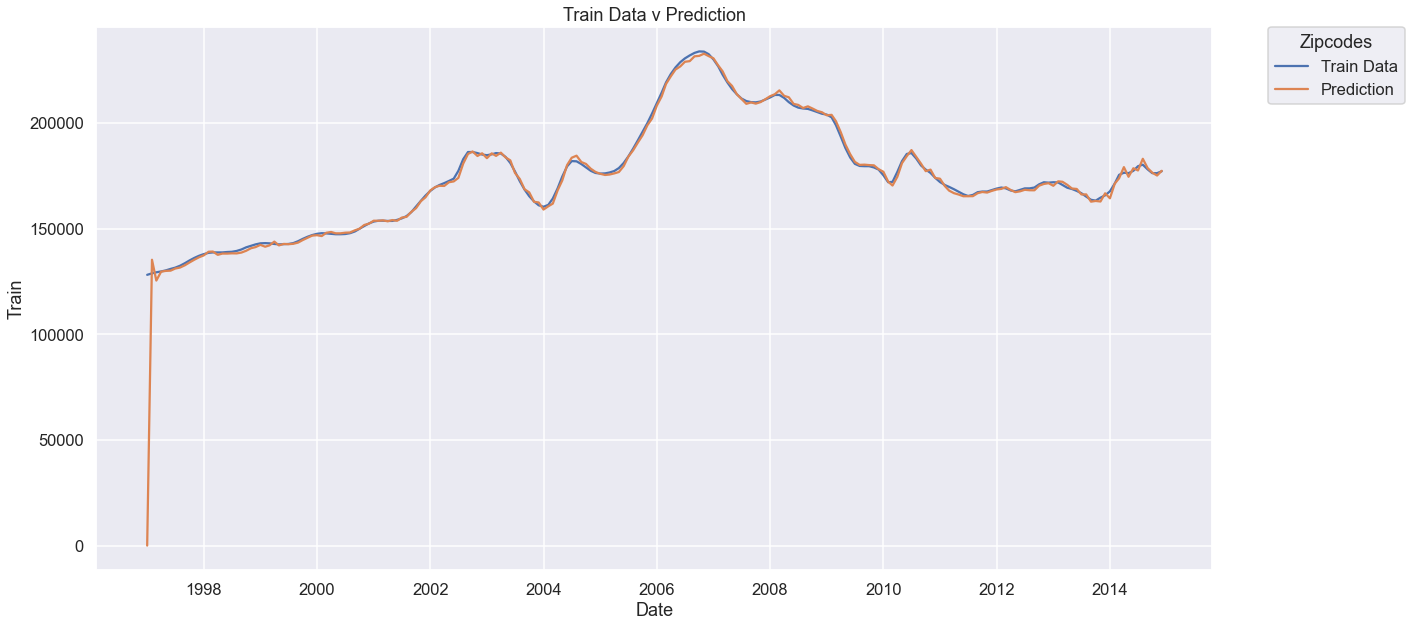

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Test RMSE: 37095.10213732872


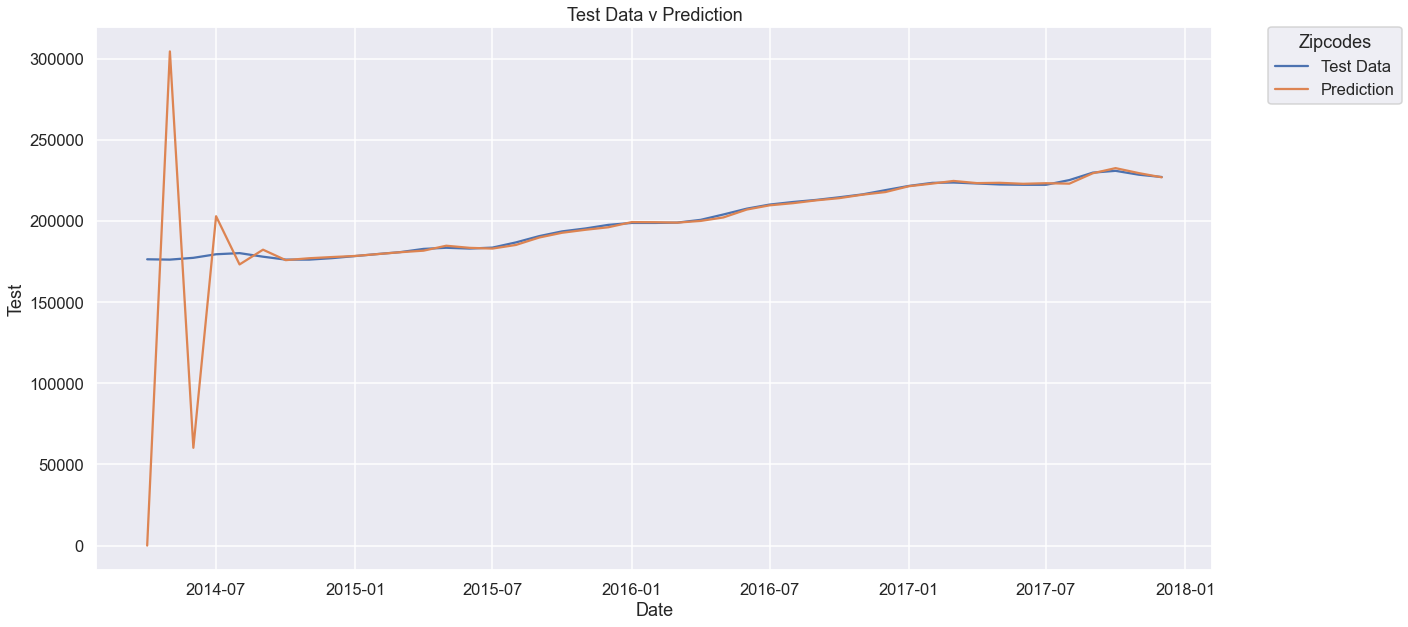

In [161]:
train_rmse(z53139, (3, 0, 2), (0, 0, 2, 12))

test_rmse(z53139, (3, 0, 2), (0, 0, 2, 12))

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index

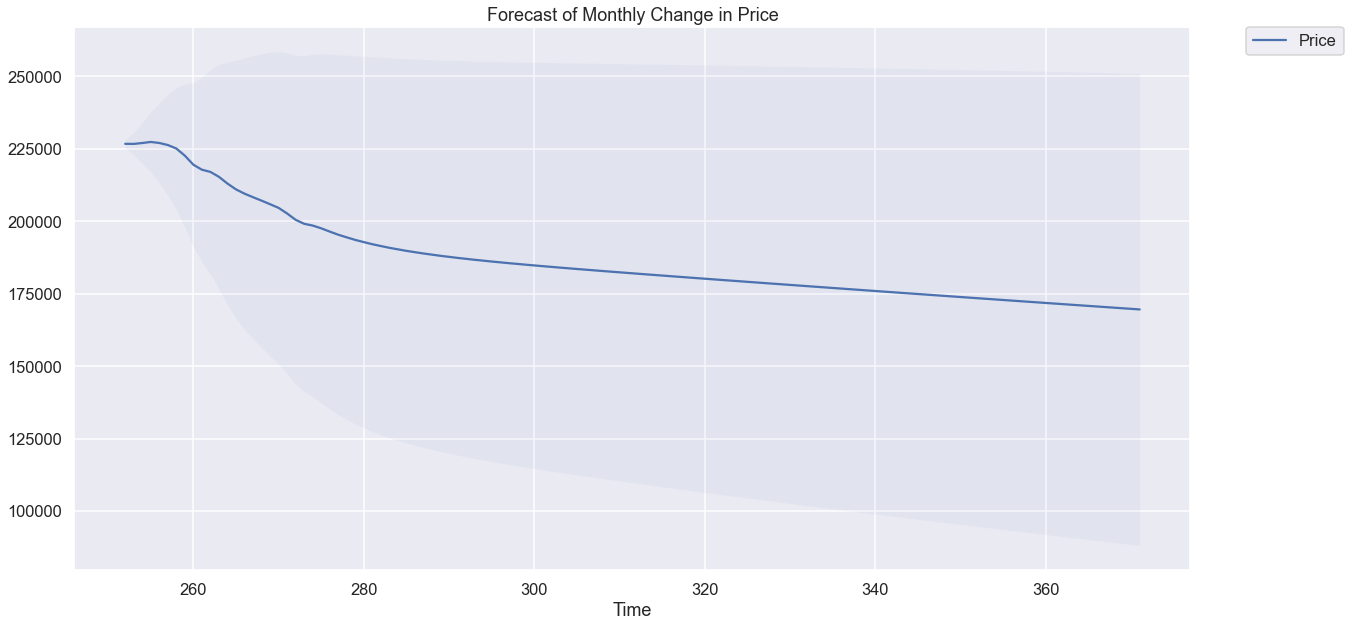

Starting Price: $128800.0
Expected Return - One-Year: $86473.42
Expected Return - Two-Year: $68711.39
Expected Return - Three-Years: $60023.01
Expected Return - Four-Year: $56159.83
Expected Return - Five-Years: $53303.75


In [162]:
forecast(z53139, (3, 0, 2), (0, 0, 2, 12))

In [177]:
zipcode.append('53139')
year5.append('53303.75')

<a id = 'model_53404'></a>
## 53404

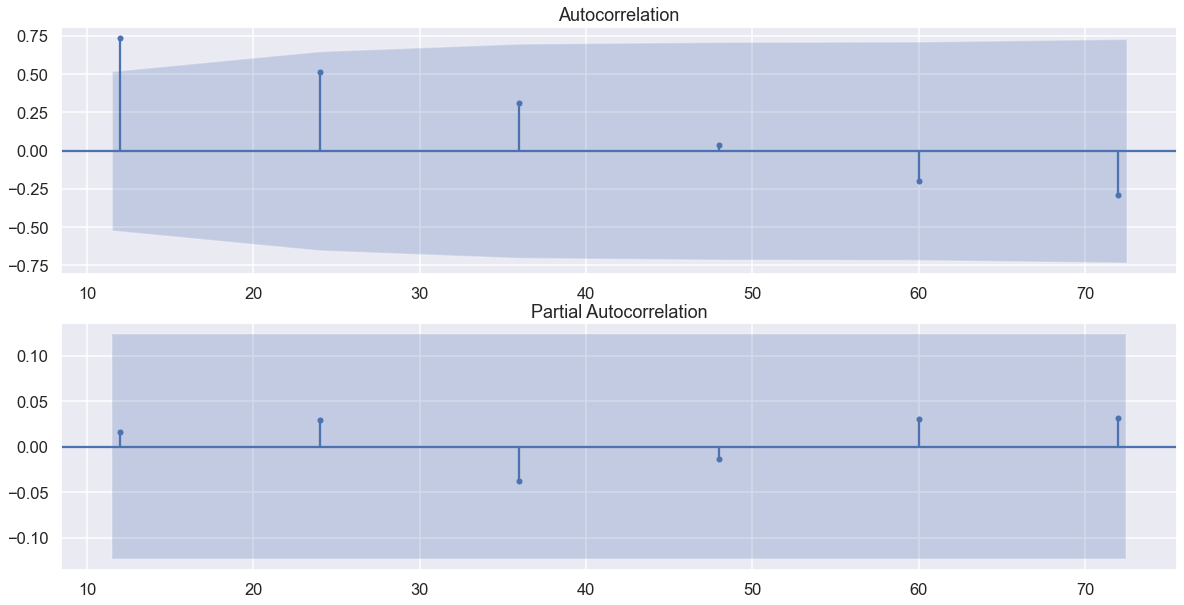

In [117]:
acf_pacf(z53404)

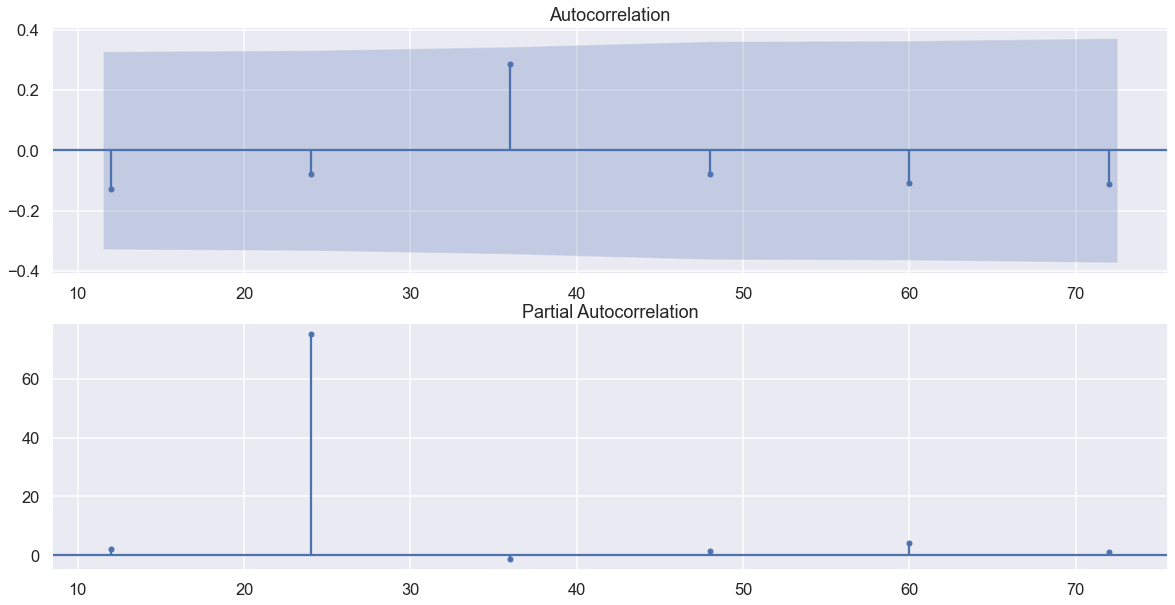

In [118]:
seasonal_acf_pacf(z53404)

In [119]:
params(z53404)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.30 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4949.739, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3873.320, Time=1.10 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5777.285, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=3875.977, Time=0.05 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=3865.380, Time=8.00 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=3856.993, Time=1.74 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=3875.214, Time=0.47 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=7.27 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=3859.956, Time=2.94 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=2.89 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=3471.648, Time=2.66 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=3483.294, Time=0.84 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : 

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                                      SARIMAX Results                                      
Dep. Variable:                               Price   No. Observations:                  216
Model:             SARIMAX(3, 0, 1)x(2, 0, [], 12)   Log Likelihood               -1464.915
Date:                             Thu, 20 May 2021   AIC                           2943.831
Time:                                     08:33:53   BIC                           2966.523
Sample:                                          0   HQIC                          2953.024
                                             - 216                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8015      0.052     34.607      0.000       1.700       1.904
ar.L2         -0.7813      

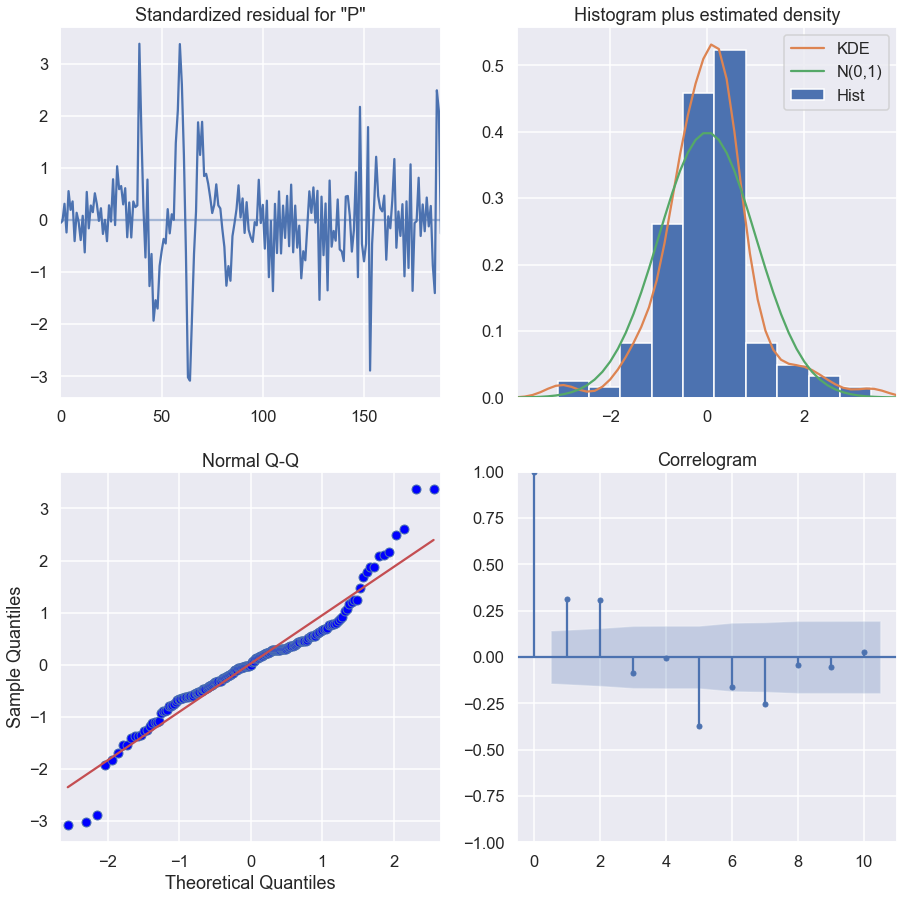

In [163]:
model_fit(z53404, (3, 0, 1), (2, 0, 0, 12))

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Train RMSE: 9698.898423227765


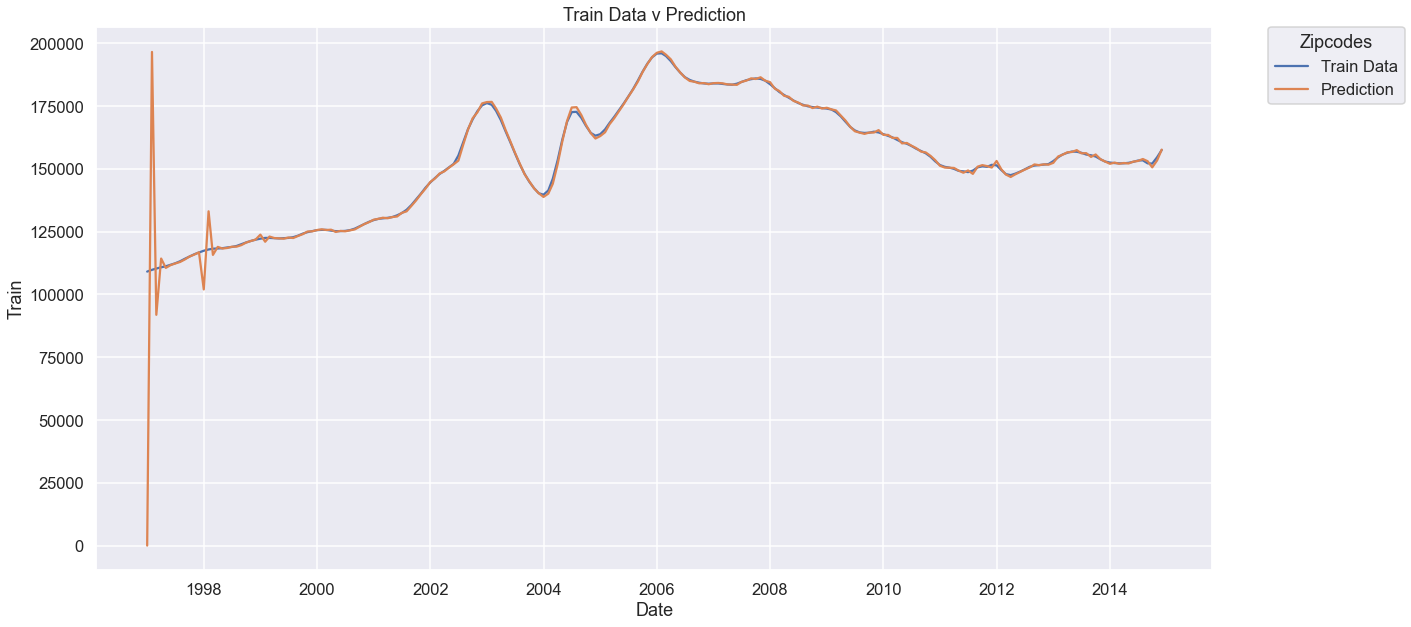

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 32622.554676920907


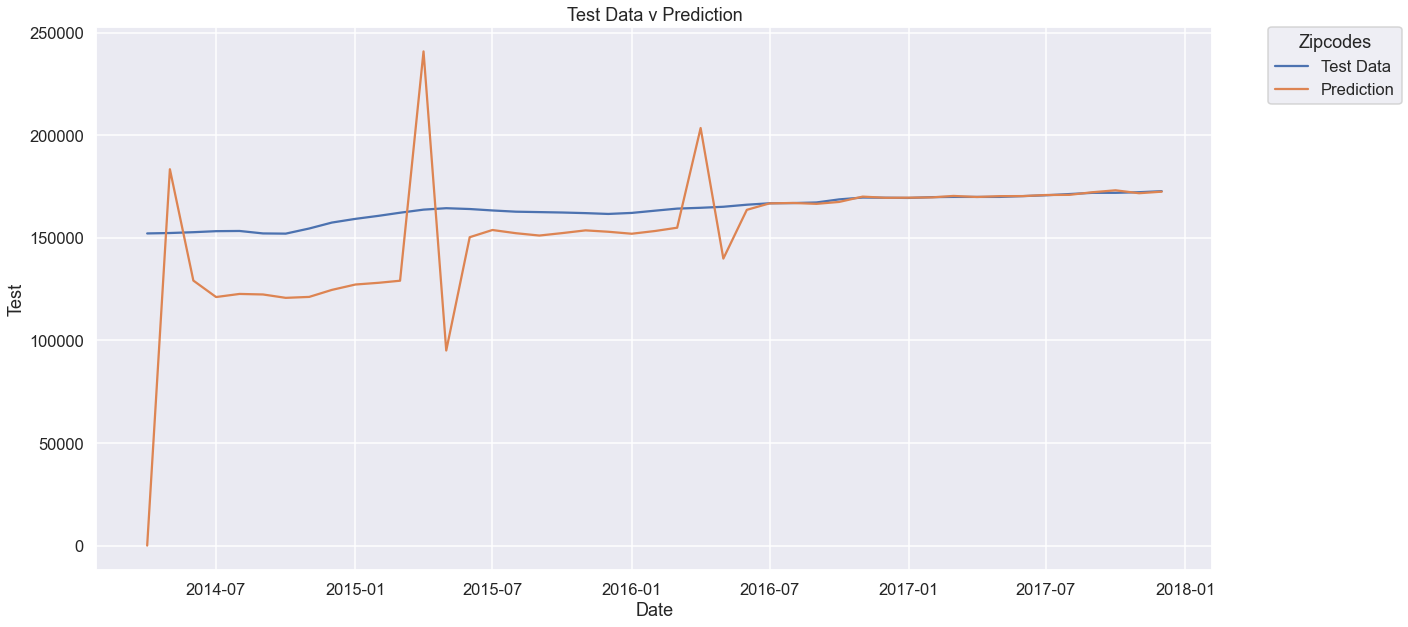

In [164]:
train_rmse(z53404, (3, 0, 1), (2, 0, 0, 12))

test_rmse(z53404, (3, 0, 1), (2, 0, 0, 12))

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index

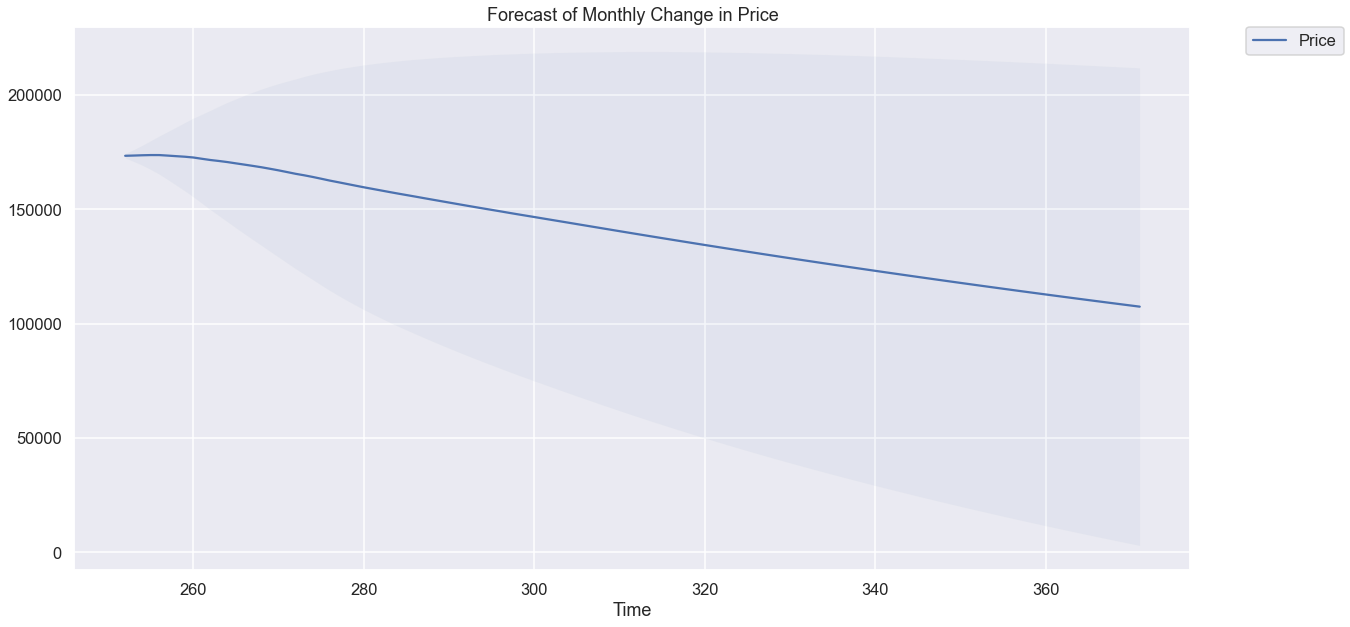

Starting Price: $109800.0
Expected Return - One-Year: $61298.84
Expected Return - Two-Year: $53529.35
Expected Return - Three-Years: $45071.05
Expected Return - Four-Year: $37389.8
Expected Return - Five-Years: $29970.68


In [165]:
forecast(z53404, (3, 0, 1), (2, 0, 0, 12))

In [178]:
zipcode.append('53404')
year5.append('29970.68')

<a id = 'model_53405'></a>
## 53405

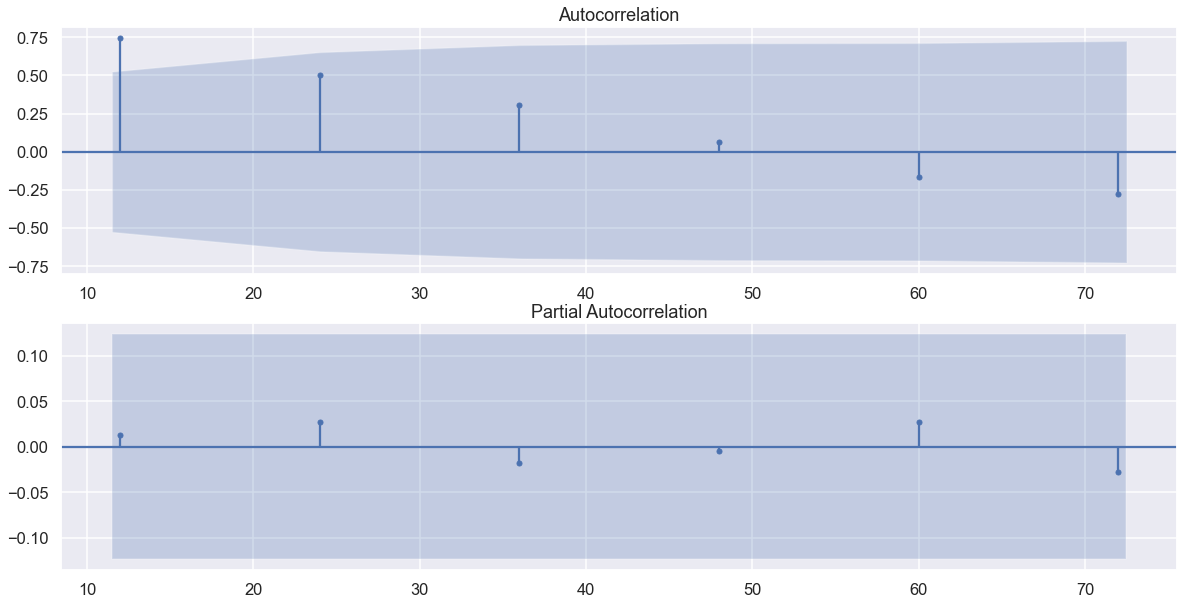

In [124]:
acf_pacf(z53405)

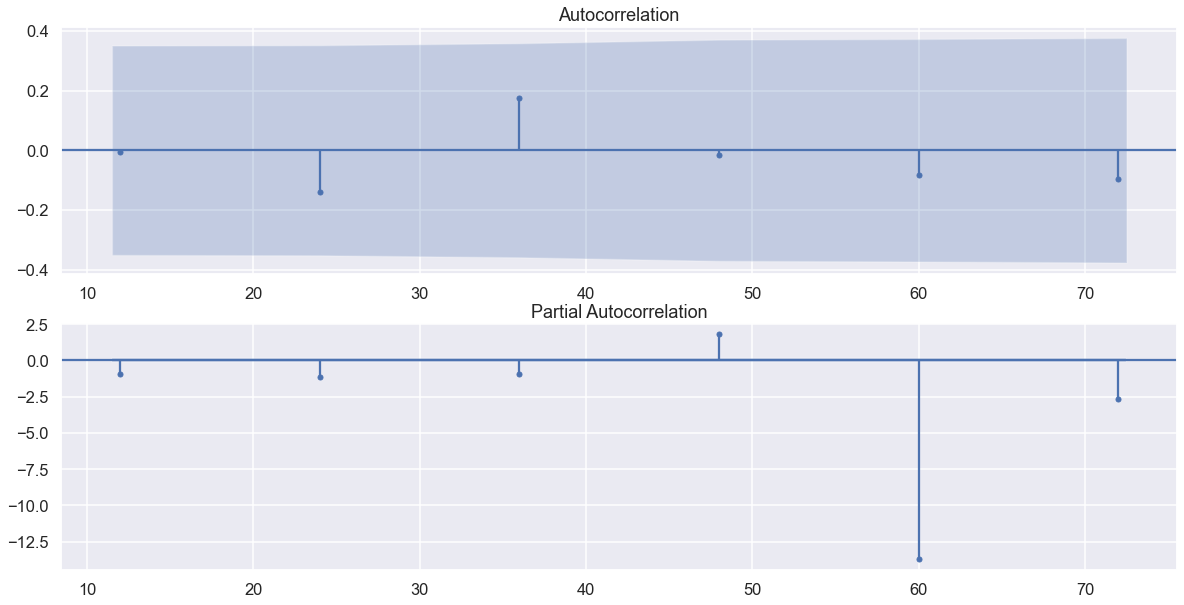

In [125]:
seasonal_acf_pacf(z53405)

In [126]:
params(z53405)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4973.635, Time=0.22 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3862.641, Time=1.82 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5795.597, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=14.17 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=3863.844, Time=0.23 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=3847.564, Time=1.65 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=7.87 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=3848.537, Time=3.09 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=3.25 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=3481.962, Time=4.56 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=3496.577, 

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                  216
Model:             SARIMAX(3, 0, 2)x(0, 0, 2, 12)   Log Likelihood               -1676.348
Date:                            Thu, 20 May 2021   AIC                           3368.697
Time:                                    08:34:42   BIC                           3394.631
Sample:                                         0   HQIC                          3379.203
                                            - 216                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9387      0.098      9.586      0.000       0.747       1.131
ar.L2          0.2155      0.110   

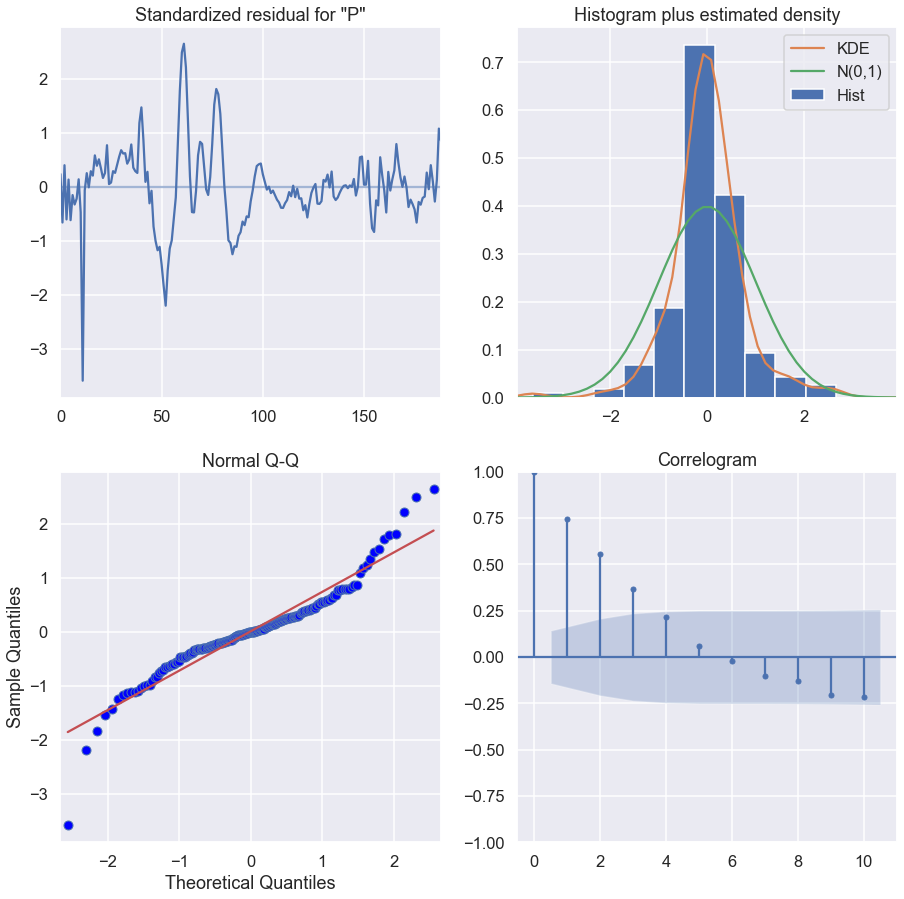

In [166]:
model_fit(z53405, (3, 0, 2), (0, 0, 2, 12))

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Train RMSE: 8124.255559465486


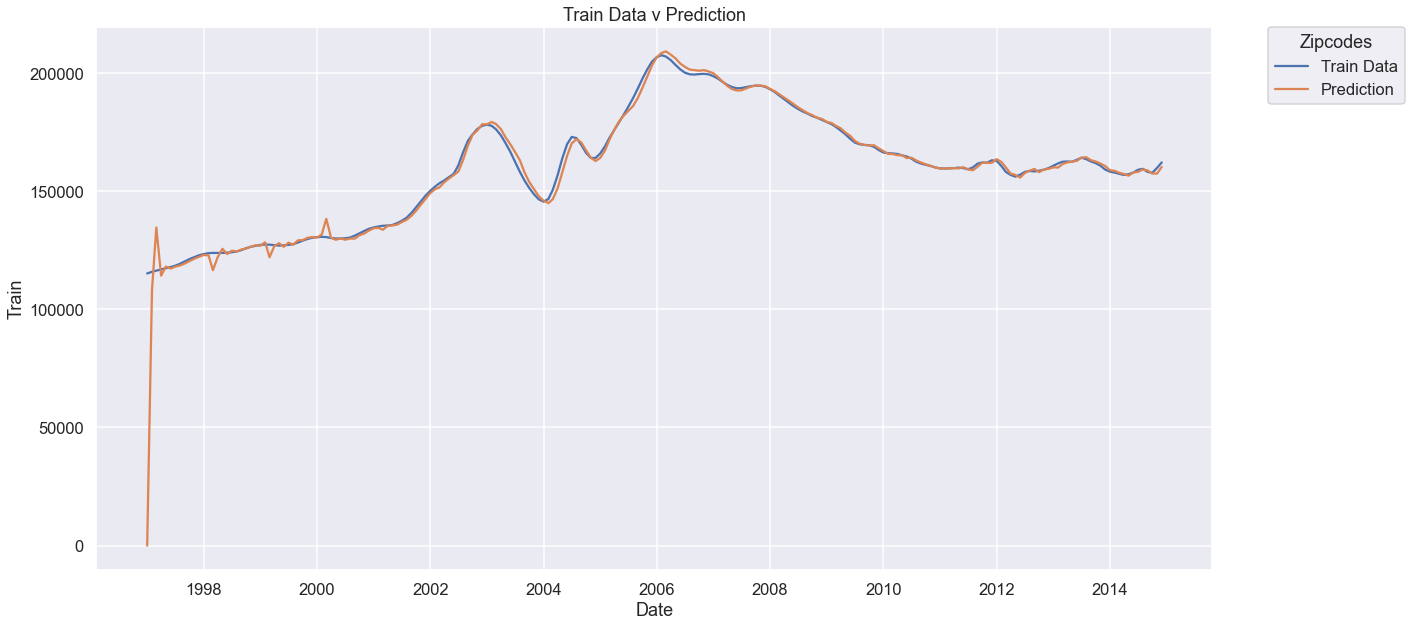

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Test RMSE: 27581.183846604


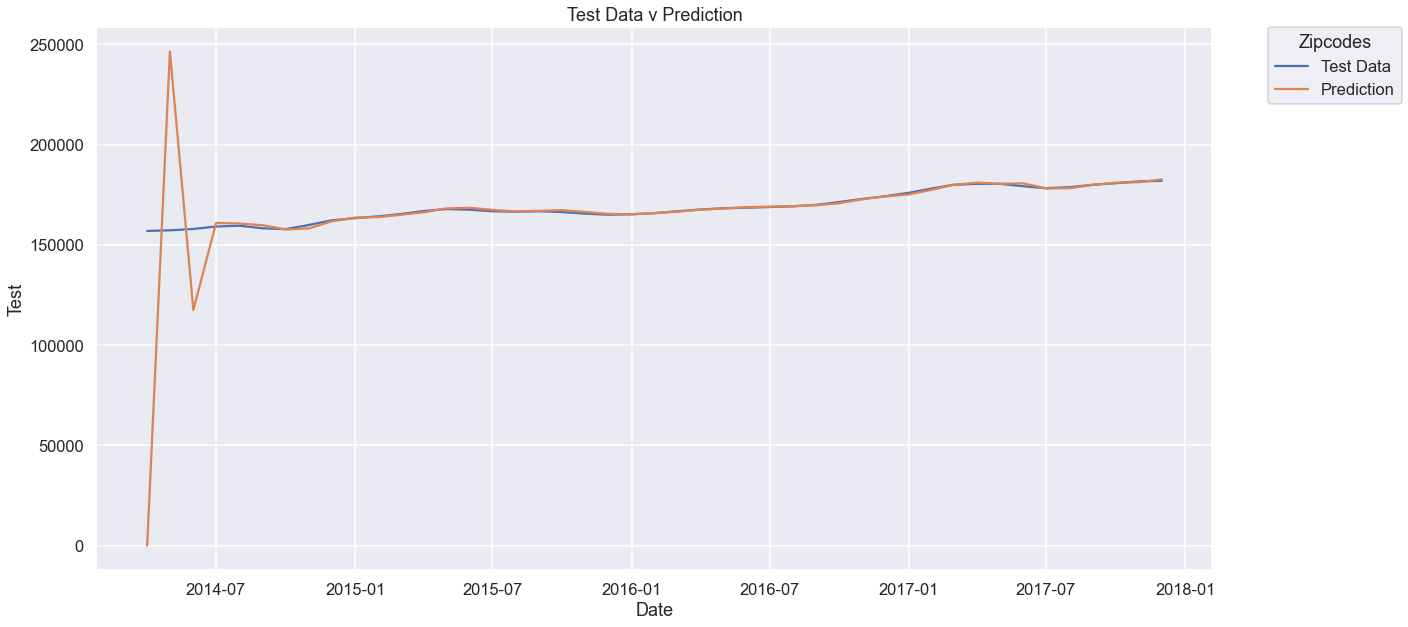

In [167]:
train_rmse(z53405, (3, 0, 2), (0, 0, 2, 12))

test_rmse(z53405, (3, 0, 2), (0, 0, 2, 12))

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index

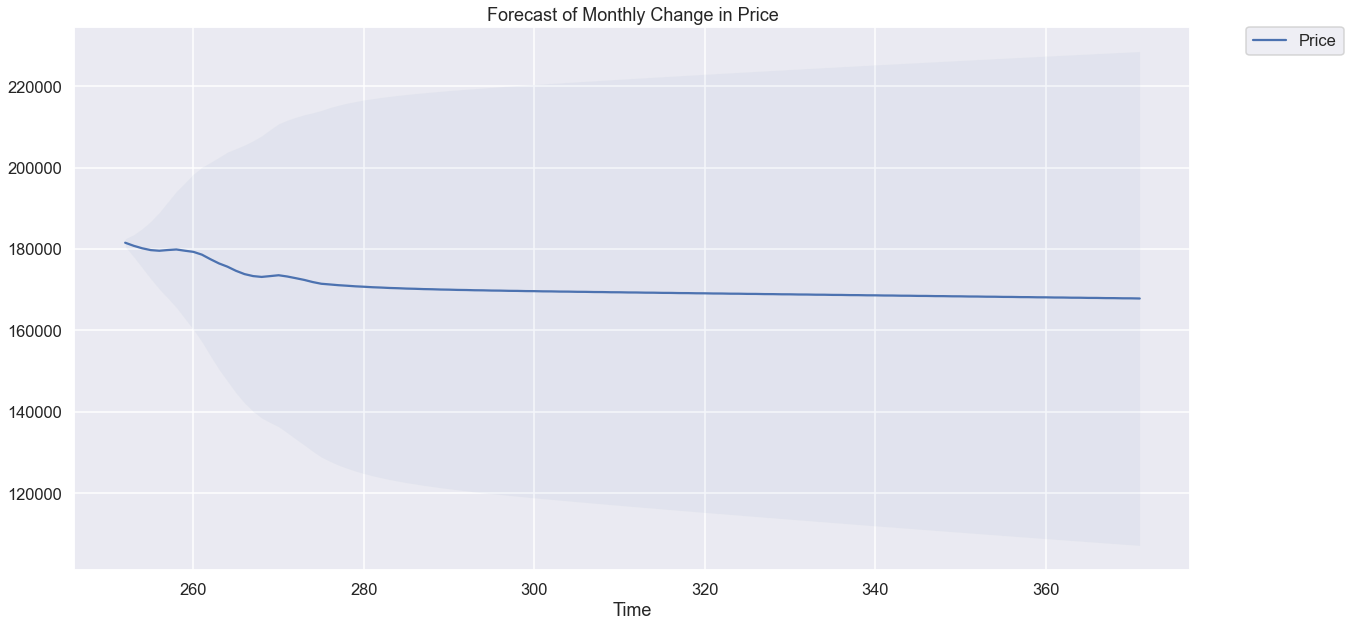

Starting Price: $115900.0
Expected Return - One-Year: $60543.06
Expected Return - Two-Year: $55547.6
Expected Return - Three-Years: $54235.61
Expected Return - Four-Year: $53744.24
Expected Return - Five-Years: $53410.31


In [168]:
forecast(z53405, (3, 0, 2), (0, 0, 2, 12))

In [179]:
zipcode.append('53405')
year5.append('53410.31')

<a id = '53185'></a>
## 53185

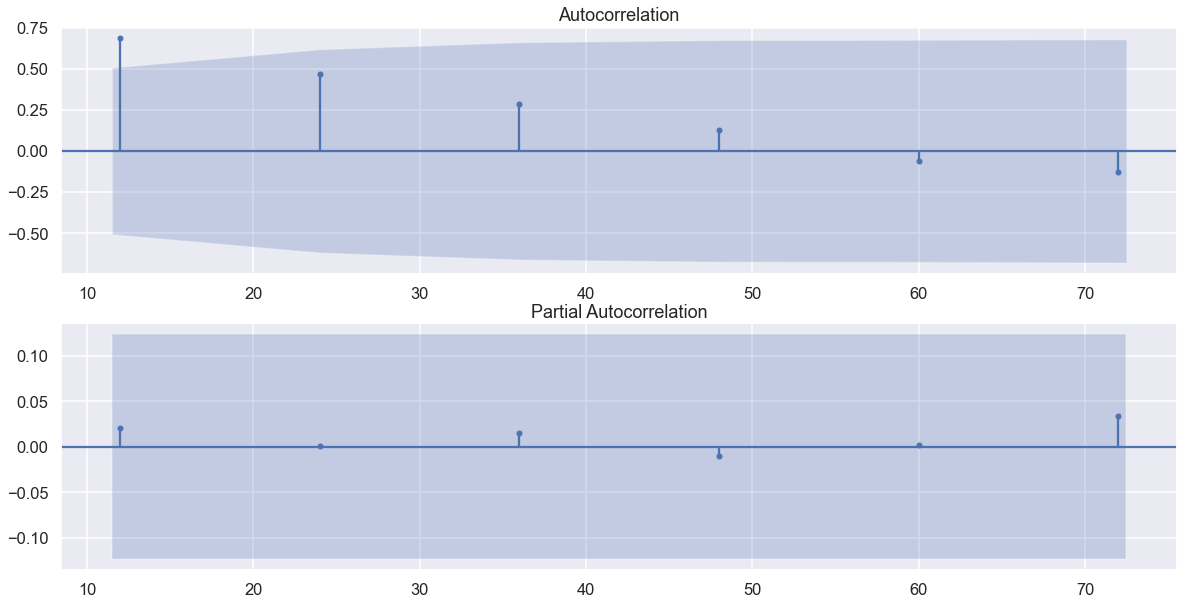

In [131]:
acf_pacf(z53185)

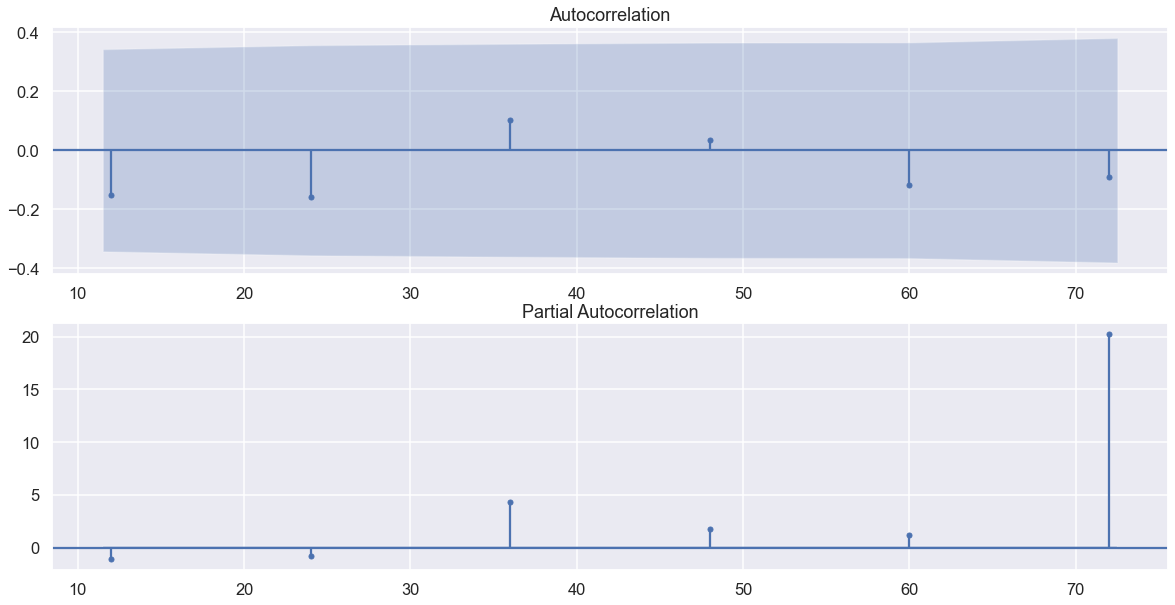

In [132]:
seasonal_acf_pacf(z53185)

In [133]:
params(z53185)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5063.001, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=4003.968, Time=1.40 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=5907.976, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=4005.386, Time=0.06 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=3997.531, Time=12.14 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=3996.882, Time=1.56 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=5.01 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=3998.152, Time=1.43 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=4.10 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=3594.040, Time=2.66 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=3604.052, Time=1.02 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                        
Dep. Variable:                                   Price   No. Observations:                  216
Model:             SARIMAX(3, 0, 3)x(0, 0, [1, 2], 12)   Log Likelihood               -1747.042
Date:                                 Thu, 20 May 2021   AIC                           3512.084
Time:                                         08:35:47   BIC                           3541.212
Sample:                                              0   HQIC                          3523.886
                                                 - 216                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1390      0.036     31.678      0.000       1.069       1

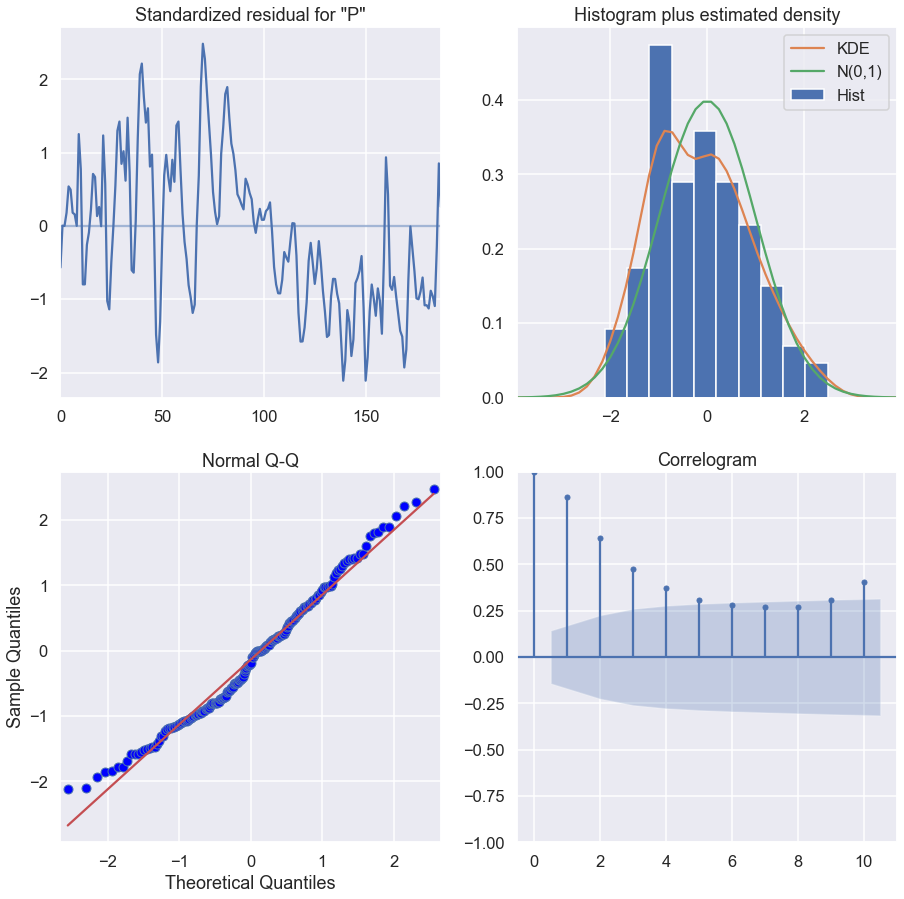

In [169]:
model_fit(z53185, (3, 0, 3), (0, 0, 2, 12))

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Train RMSE: 10702.267384141802


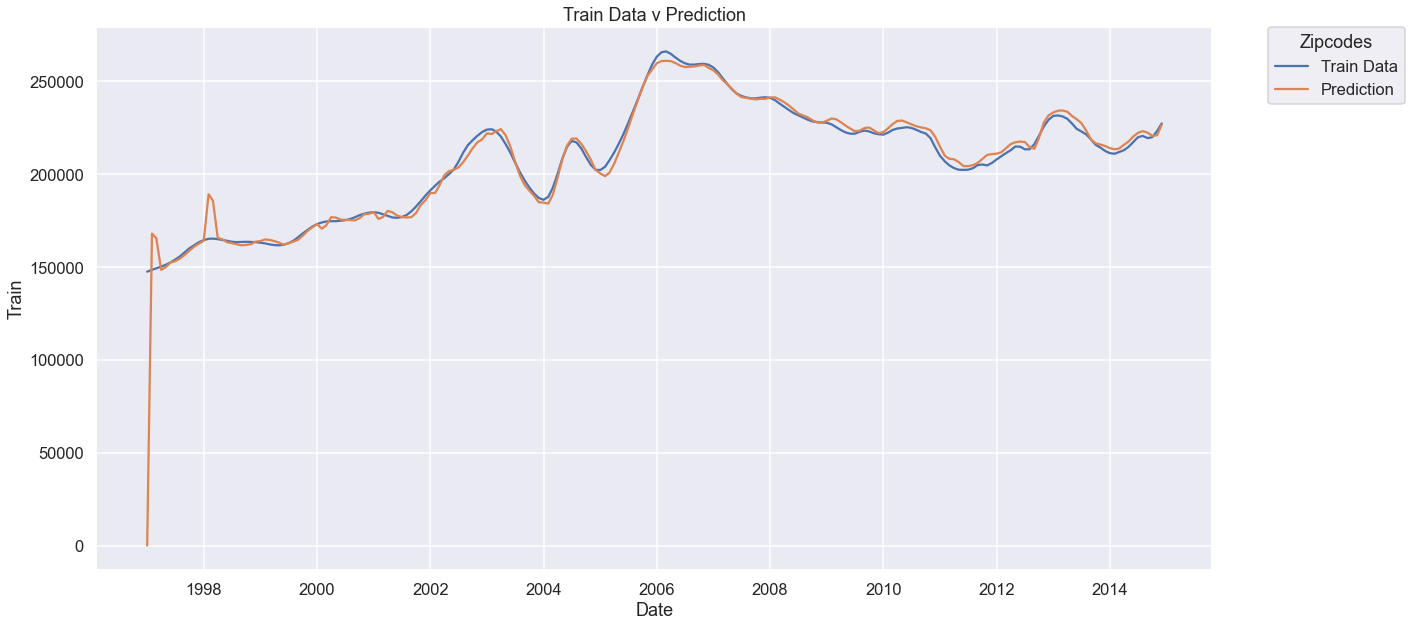

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Test RMSE: 35778.506508328115


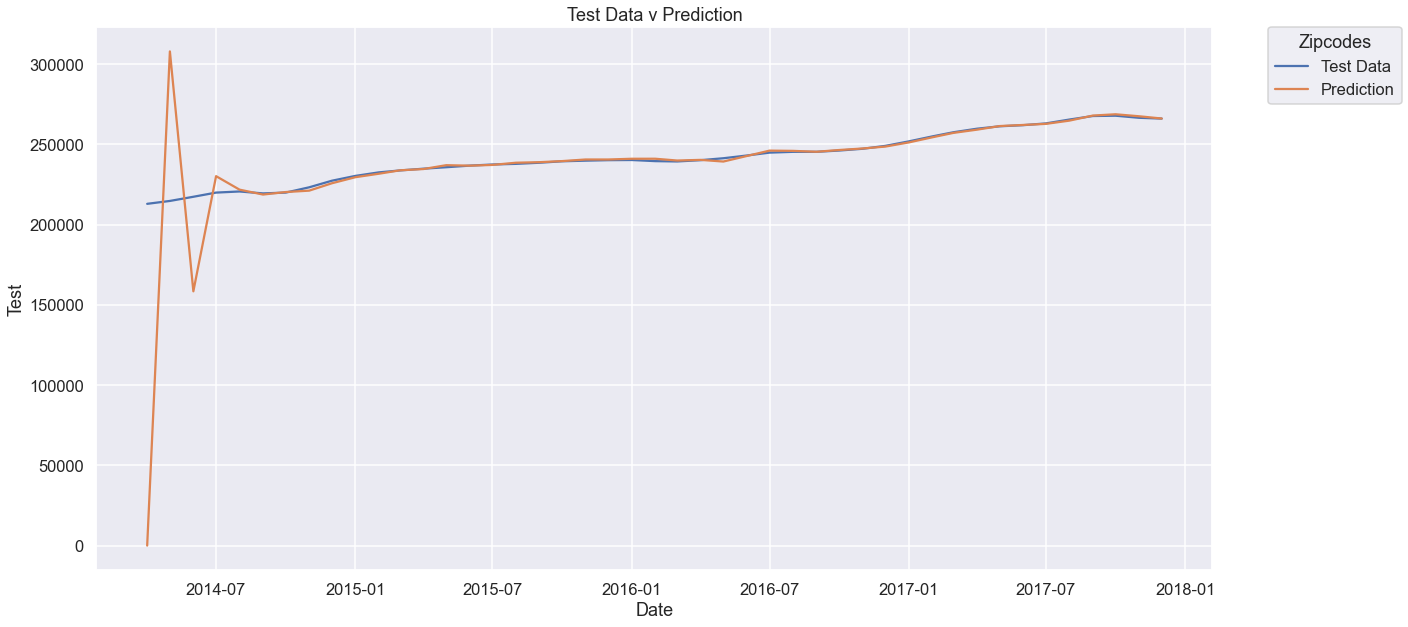

In [170]:
train_rmse(z53185, (3, 0, 3), (0, 0, 2, 12))

test_rmse(z53185, (3, 0, 3), (0, 0, 2, 12))

C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\westi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index

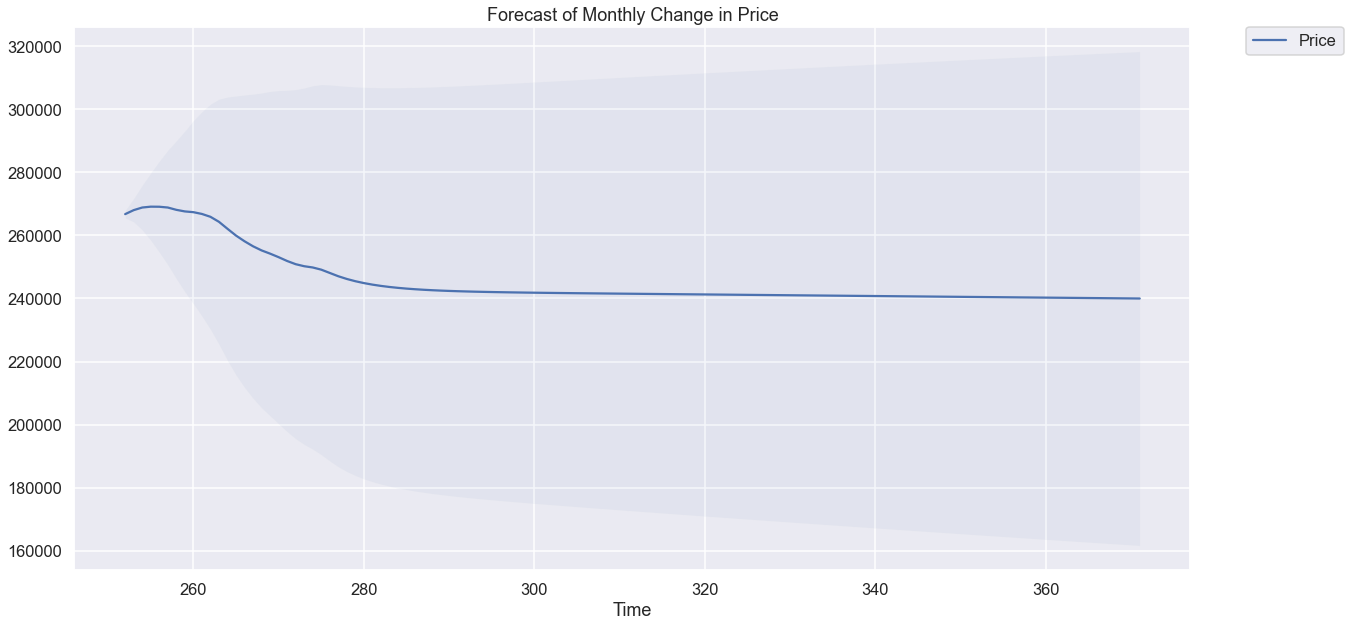

Starting Price: $148500.0
Expected Return - One-Year: $115783.12
Expected Return - Two-Year: $100619.83
Expected Return - Three-Years: $94248.84
Expected Return - Four-Year: $93352.48
Expected Return - Five-Years: $92993.81


In [171]:
forecast(z53185, (3, 0, 3), (0, 0, 2, 12))

In [180]:
zipcode.append('53185')
year5.append('92993.81')

### Complile Results

In [181]:
forecast_data = {'Zipcode' : zipcode,
                 'Year-Five Expected Return' : year5}

forecast_df = pd.DataFrame(forecast_data)

forecast_df = forecast_df[0:5]

In [182]:
final_state = pd.Series(['WI', 'WI', 'WI', 'WI', 'WI'])
final_county = pd.Series(['Racine', 'Kenosha', 'Kenosha', 'Kenosha', 'Racine'])
final_city = pd.Series(['Waterford', 'Twin Lakes', 'Kenosha', 'Kenosha', 'Eagle Lake'])

In [183]:
forecast_df['State'] = final_state.values
forecast_df['County'] = final_county.values
forecast_df['City'] = final_city.values

forecast_df = forecast_df[['State',
                          'County',
                          'City',
                          'Zipcode',
                         'Year-Five Expected Return']]

In [184]:
final_zipcodes = chi_mke.loc[chi_mke['Zipcode'].isin(['53185', '53181', '53144', '53142', '53139'])]
final_zipcodes = final_zipcodes[final_zipcodes['Date'] == pd.to_datetime('1997-04-01 00:00:00')]
final_zipcodes.drop(['Date', 'Price'],
                    axis = 1,
                    inplace = True)

In [185]:
forecast_df['Year-Five Expected Return'] = forecast_df['Year-Five Expected Return'].astype(float)


forecast_df.sort_values(by = 'Year-Five Expected Return',
                        ascending = False, inplace = True)

<a id = 'conclusions'></a>
# Conclusions

<a id = 'parameters_evaluation_metrics'></a>
### Parameters and Evaluation Metric - Review

**Risk**

The Chiwaukee Group would like to manage their risk profile, with risk evaulated as the Coefficient of Variance, the ratio of the standard deviation to the mean, with  an upper-limit  set at 50%

**Historical Return on Investment**

The Chiwaukee Group would like to invest in in proven areas with a high historical Return on Investment, filtering to include the top 25%

**Expected Future Return**

Final recommendations will be provided based on future return forecasts produced through Time Series modeling

<a id = 'top_5_zipcodes'></a>
## Top-Five Zicodes

In [186]:
forecast_df

State   County        City Zipcode  Year-Five Expected Return
0    WI   Racine   Waterford   60047                  149388.39
4    WI   Racine  Eagle Lake   53108                   86574.04
3    WI  Kenosha     Kenosha   53158                   44133.74
2    WI  Kenosha     Kenosha   53144                   39968.79
1    WI  Kenosha  Twin Lakes   53142                   38127.55

<a id = 'recommendations'></a>
## Recommendations

* **Invest in in the area 15-25miles West of I94, North of the IL-border**


* **Invest in the area within 5miles I94 in Kenosha County**


* **Discard interest in Illinois**

<a id = 'detailed_observations'></a>
## Detailed Observations

### Invest in in the area 15-25miles West of I94, North of the IL-border

Three of the top-five zipcodes, including the top-two,are located sequentially, fifteen-to-twenty-five-miles West of Interstate-94, from the north-most border of Racine County south to the Illinois border

Based on projections that Chicago and Milwaukee will continue to merge into a singular megaregion, it was anticipated that the area directly between, East of Interstate-94 to Lake Michigan, containing cities Kenosha, Racine, and Oak Creek would have been one of the areas on the rise

**Follow-Up Questions**

* Is the attraction to this area potentially associated with higher rated school system further separated from the cities? (Racine and Milwaukee cities have historically ranked among the worst school systems in the US)
* Are the higher forecasted returns potentially being driven by specific, smaller geographic areas, weighting the average for the zipcode? (Nearby Lake Geneva has historically one of wealthiest areas in the Midwest)
* Is the growth of the area even connected with commuting access to Milwaukee and/or Chicago?  Are people looking for an area separated from the cities but still within commuting distance or is the growth of this area being driven be completed disassociated factors?

### Invest in the area within 5miles I94 in Kenosha County

The final two of the top-five-zipcodes were more predictably the area directly surrounding the major business developments along Interstate-94 in Kenosha. 

This area would also have the most direct access to Interstate-94 and the Hiawatha Train service stop for commuter access (both Milwaukee and Chicago are approximately forty-five-minutes drive)(the Hiawatha train stop in Sturtevant, Wisconsin is two-miles from Interstate-94 in Racine County, approximately ten-totwenty-minutes drive from this area)


**Follow-Up Questions**

* What is type of competition exists for the development residential projects in this area?
* What types of residences are in-demand in this area? What type of socioeconomic profile is being drawn to the area by the business development?
* Are people moving to this area for distribution center and manufacturing jobs or for commuter access to Milwaukee and/or Chicago?

### Discard interest in Illinois

All five of the top-five zipcodes are all located in Wisconsin, not Lake County in Illinois

**Follow-Up Questions**
* How big a factor is the significant discrepancy between state tax-rates in Wisconsin compared to Illinois?

<a id = 'next_steps'></a>
# Next Steps

* Additional research can be performed regarding factors such as:
    - Tax Rates
    - Interest Rates
    - School District Ratings
    - Crime Rates
    - Median Household Incomes
* Additional modeling types can be utilized in the analysis of further data types
* Polling can be performed with current residents, with specific emphasis on people who moved to the area recently, to gather further data regarding personal driving factors potentially not captured by available statistics
* Further research can be performed narrowing the geographic range within the top zipcodes to attempt to discover more specifically which areas The Chiwaukee Group should look to invest in